In [3]:
# Importamos las librerias necesarias
from Busquedas import *
import datetime
import pymongo
from pymongo import MongoClient
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabrielarcangelbol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Descarga de Datos

## 1.1 Conexion y descarga de datos desde Instancia de BBDD NoSQL MongoDB

In [4]:
# Autentificacion
def auth_mongo(username, password, database):
    
    # Conexion con BD NoSQL MongoDB - Creacion de BD y Colección

    username_url = urllib.parse.quote_plus(username)
    password_url = urllib.parse.quote_plus(password)

    # Fuera de GCP - Direccion Ip Externa
    # XXXX # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    # Dentro de GCP - Direccion Ip Interna
    # XXXX # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    url = 'mongodb://%s:%s@XXXX:XXXX/'+database # XXXX - # Por motivos de seguridad se eliminaron estas direcciones / claves / puertos
    try: 
        client = MongoClient(url % (username_url, password_url))
        print("Conectado satisfactoriamente!!!") 
    except:   
        print("No se logro conectar a MongoDB")
    return client

# Extraer datos de mongo
def extract_mongo(client, database, collection_name):
    
    try:
        db = client[database]
        collection = db[collection_name]
        info = collection.find()
        df = pd.DataFrame(list(info))
        df.drop_duplicates('id_post', inplace=True)
        df['reactions_count'] = df['reactions_count'].astype(int)
        df['date'] = df['date'].astype('datetime64[ns]')
        print("Los datos de la coleccion %s de la base de datos %s fueron extraidos satisfactoriamente!" %(collection_name, database))
    
    except:
        print("Los datos de la coleccion %s de la base de datos %s NO fueron extraidos" %(collection_name, database))
    
    return df

# Insertar un dataframe en mongo
def insert_mongo (client, database, collection_name, df):
    
    try:
        db = client[database]
        collection = db[collection_name]
        data_dict = df.to_dict("records")
        collection.insert_many(data_dict)
        print("Los datos fueron insertados correctamente en la coleccion %s, de la base de datos %s." %(collection_name, database))
    
    except:
        print("Los datos NO fueron insertados en la coleccion %s, de la base de datos %s." %(collection_name, database))
    

In [5]:
# Definicion de parametros de descarga
database = 'GNN'
client = auth_mongo('XXXX', 'XXXX', database)    
clave = 'fvf'

Conectado satisfactoriamente!!!


In [6]:
# Convertir datos almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
df = extract_mongo(client, database, 't_fvf_progephi_merge')
df.shape

Los datos de la coleccion t_fvf_progephi_merge de la base de datos GNN fueron extraidos satisfactoriamente!


(11948, 85)

In [57]:
df.columns

Index(['_id', 'created_at', 'id_post', 'id_str', 'message', 'source',
       'truncated', 'in_reply_to_screen_name', 'user', 'coordinates', 'place',
       'is_quote_status', 'quote_count', 'comments_count', 'retweet_count',
       'likes_count', 'entities', 'favorited', 'retweeted', 'editable',
       'filter_level', 'lang', 'Fecha_completa', 'date', 'hour',
       'reactions_count', 'id_user', 'id_str_user', 'name', 'username',
       'description', 'translator_type', 'protected', 'verified',
       'verified_type', 'followers', 'followings', 'listed_count',
       'favourites_count', 'statuses_count', 'created_atuser', 'geo_enabled',
       'contributors_enabled', 'is_translator', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'profile_

# 2. Preparacion de los datos - dftotal

In [7]:
df.head()

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_screen_name,user,coordinates,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,0,"{'id': 77606751, 'id_str': '77606751', 'name': 'Foro Todofutbol', 'screen_name': 'foro_todofutbol', 'location': 'Venezuela', 'url': 'http://todofutbolnet.mforos.com', 'description': 'Somos la comunidad más grande del País. 18 años de pasión por el Fútbol Profesional venezolano en todas sus categorías. Fundado el 27-04-2004.', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 17771, 'friends_count': 4132, 'listed_count': 214, 'favourites_count': 494, 'statuses_count': 16772, 'created_at': 'Sat Sep 26 23:50:30 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '131516', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '820000', 'profile_sidebar_border_color': '660000', 'profile_sidebar_fill_color': 'F7F7F7', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/77606751/1675097627', 'default_profile': False, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None, 'withheld_in_countries': []}",None,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,0,"{'id': 300553676, 'id_str': '300553676', 'name': 'MIGUEL ANGEL', 'screen_name': 'miguel28gangel', 'location': 'Maturin, Monagas', 'url': None, 'description': 'Vendedor de repuestos de carros al mayor.\nContador público.\nHala Madrid!!!', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 1430, 'friends_count': 1773, 'listed_count': 10, 'favourites_count': 8738, 'statuses_count': 140642, 'created_at': 'Tue May 17 23:37:50 +0000 2011', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/300553676/1393965440', 'default_profile': True, 'default_profile_image': False, 'follo

In [7]:
# Verificar que columnas son de tipo diccionario
is_dict = df.applymap(lambda x: isinstance(x, dict))
print(is_dict)

         _id  created_at  id_post  id_str  message  source  truncated  \
0      False       False    False   False    False   False      False   
1      False       False    False   False    False   False      False   
2      False       False    False   False    False   False      False   
3      False       False    False   False    False   False      False   
4      False       False    False   False    False   False      False   
...      ...         ...      ...     ...      ...     ...        ...   
11943  False       False    False   False    False   False      False   
11944  False       False    False   False    False   False      False   
11945  False       False    False   False    False   False      False   
11946  False       False    False   False    False   False      False   
11947  False       False    False   False    False   False      False   

       in_reply_to_screen_name   user  coordinates  ...  betweenesscentrality  \
0                        False  False     

In [8]:
# Validar cual de ellas contiene datos de este tipo para filtrarlas
is_dict.sum().sort_values(ascending=False)[:10]

_id                                  0
profile_image_url_https              0
link_user                            0
link_user_in_reply_to_screen_name    0
link_comments                        0
link                                 0
quote_screen_name                    0
retweet_screen_name                  0
default_profile_image                0
default_profile                      0
dtype: int64

In [9]:
col_dict = ['edit_controls', 'edit_history', 'retweeted_status', 'extended_tweet', 'quoted_status', 'quoted_status_permalink', 'extended_entities', 'bounding_box', 'attributes']

In [10]:
df_ = df.loc[:, ~df.columns.isin(col_dict)]
df_.shape

(11948, 85)

In [11]:
# Verificar que columnas son de tipo lista
is_list = df_.applymap(lambda x: isinstance(x, list))
print(is_list)

         _id  created_at  id_post  id_str  message  source  truncated  \
0      False       False    False   False    False   False      False   
1      False       False    False   False    False   False      False   
2      False       False    False   False    False   False      False   
3      False       False    False   False    False   False      False   
4      False       False    False   False    False   False      False   
...      ...         ...      ...     ...      ...     ...        ...   
11943  False       False    False   False    False   False      False   
11944  False       False    False   False    False   False      False   
11945  False       False    False   False    False   False      False   
11946  False       False    False   False    False   False      False   
11947  False       False    False   False    False   False      False   

       in_reply_to_screen_name   user  coordinates  ...  betweenesscentrality  \
0                        False  False     

In [12]:
# Validar cual de ellas contiene datos de este tipo para filtrarlas
is_list.sum().sort_values(ascending=False)[:10]

_id                                  0
profile_image_url_https              0
link_user                            0
link_user_in_reply_to_screen_name    0
link_comments                        0
link                                 0
quote_screen_name                    0
retweet_screen_name                  0
default_profile_image                0
default_profile                      0
dtype: int64

In [13]:
col_dict = ['edit_controls', 'edit_history', 'retweeted_status', 'extended_tweet', 'quoted_status', 'quoted_status_permalink', 
            'extended_entities', 'bounding_box', 'attributes', 'urls', 'withheld_in_countries', 'matching_rules', 'user_mentions', 
            'symbols', 'hashtags', 'display_text_range', 'media']

In [14]:
df_ = df.loc[:, ~df.columns.isin(col_dict)]
df_.shape

(11948, 85)

## 2.1 Valores Duplicados

In [13]:
df_[df_.duplicated()]

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_screen_name,user,coordinates,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color


## 2.2 Valores Faltantes 

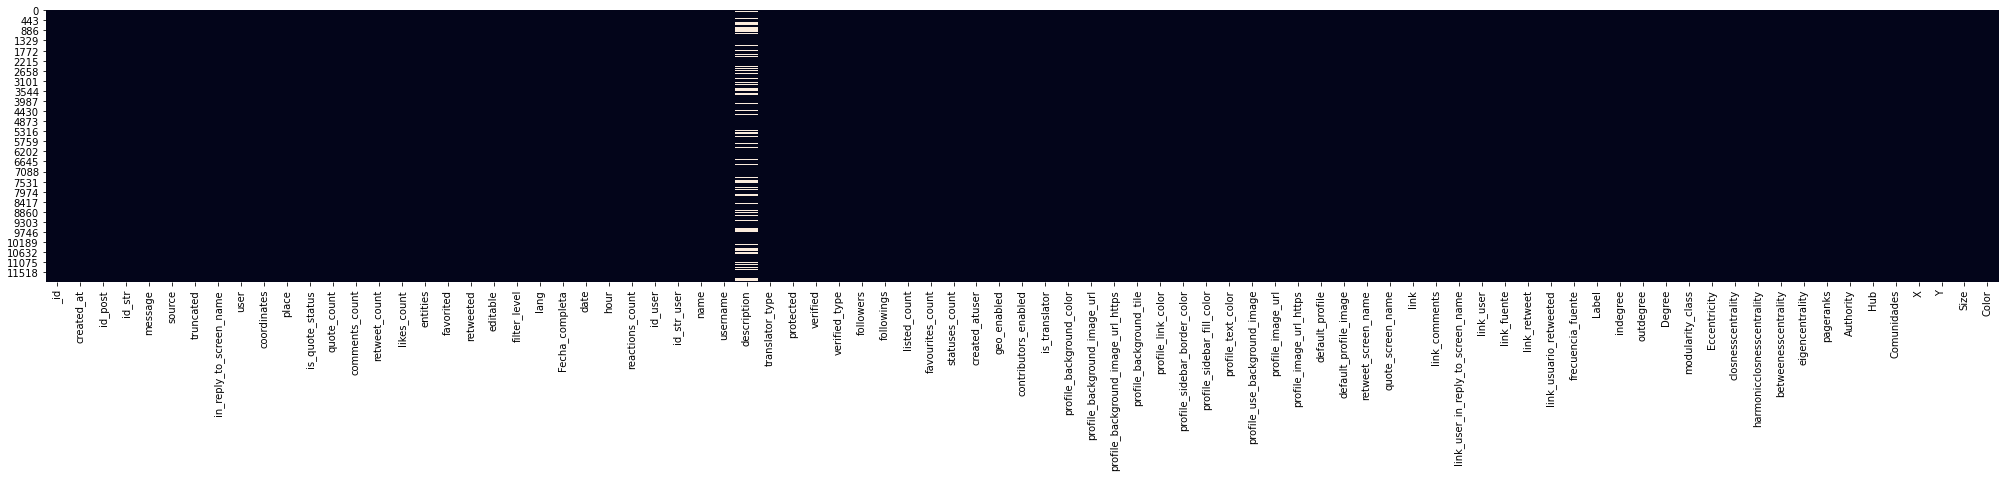

In [21]:
plt.figure(figsize=(35,5))
sns.heatmap(df_.isnull(), cbar=False)
plt.show()

In [15]:
df_.shape

(11948, 85)

In [16]:
# Numero de valores faltantes por variable
df_.isna().sum().sort_values(ascending=False)[:40]

description                           2955
Color                                   12
betweenesscentrality                    12
Label                                   12
indegree                                12
outdegree                               12
modularity_class                        12
Eccentricity                            12
closnesscentrality                      12
harmonicclosnesscentrality              12
Degree                                  12
eigencentrality                         12
Authority                               12
Hub                                     12
Comunidades                             12
X                                       12
Y                                       12
Size                                    12
pageranks                               12
profile_sidebar_fill_color               0
profile_image_url_https                  0
profile_image_url                        0
profile_use_background_image             0
profile_tex

In [17]:
df_['pageranks'].describe()

count    11936.000000
mean         0.000527
std          0.003000
min          0.000044
25%          0.000044
50%          0.000044
75%          0.000044
max          0.033240
Name: pageranks, dtype: float64

In [18]:
df_[df_.pageranks.isna()][['username', 'retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name','indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']]

,username,retweet_screen_name,quote_screen_name,in_reply_to_screen_name,indegree,outdegree,Degree,modularity_class,Eccentricity,closnesscentrality,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
307,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2610,FVFeSports,FVF_Oficial,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5020,FemeninoFVF,FVF_Oficial,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5175,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7404,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8617,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10359,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10496,FVF_Oficial,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_[df_.pageranks.isna()][['username', 'retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name','indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']].index

Int64Index([307, 312, 2402, 2610, 5020, 5175, 7404, 8617, 10359, 10496, 10759,
            10888],
           dtype='int64')

In [20]:
df_[df_[['pageranks']].isna()][['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']]

,indegree,outdegree,Degree,modularity_class,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Nota: en gephi se eliminaron los usuarios o las cuentas pertenecientes a la FVF**
   1. @FVF_Oficial (*, **, ***, ****)
   2. @SeleVinotinto
   3. @FemeninoFVF (*, ***)
   4. @juvenilesfvf (***, ****)
   5. @FutsalFVF
   6. @vinotintoplaya
   7. @FVFeSports (*)

+ (*) -> Presente en los datos recolectados (username)
+ (**) -> Presente en los datos recolectados (retweet_screen_name)
+ (***) -> Presente en los datos recolectados (in_reply_to_screen_name)
+  (****) -> Presente en los datos recolectados (quote_screen_name)

In [19]:
df_.loc[df_['username'].str.contains('fvf', case=False)][['username']]

,username
307,FVF_Oficial
312,FVF_Oficial
2188,fvfbff
2402,FVF_Oficial
2467,fvfbff
2610,FVFeSports
3024,andaluciafvf
3029,fsanchoFVF
5020,FemeninoFVF
5175,FVF_Oficial


In [20]:
df_[['username','retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name']]

,username,retweet_screen_name,quote_screen_name,in_reply_to_screen_name
0,foro_todofutbol,0,0,0
1,miguel28gangel,klon_perez,0,0
2,FutbolAnz,0,0,FutbolAnz
3,edgardo0512,CaracasFC1967,0,0
4,666rjrv,luistorres167,0,0
...,...,...,...,...
11943,xavierdorta,0,0,0
11944,johnny_ledezma,Karlapgil,0,0
11945,Gustavo_BHR,Karlapgil,0,0
11946,Lord11_BHR,0,0,jorgearmandogs


In [21]:
df_[['username','retweet_screen_name', 'quote_screen_name', 'in_reply_to_screen_name']].isna().sum()

username                   0
retweet_screen_name        0
quote_screen_name          0
in_reply_to_screen_name    0
dtype: int64

In [22]:
df_[['username']].value_counts()

username       
pulidojorge        103
foro_todofutbol     64
DvoRayoZuliano      58
nuevodiaenlinea     56
raykar57            54
                  ... 
Neo_CFC              1
NelsysmarC           1
Nelsonq06354621      1
NelsonRiera          1
zuricht94CM          1
Length: 6627, dtype: int64

In [23]:
df_[['retweet_screen_name']].value_counts()

retweet_screen_name
0                      3993
klon_perez              997
MariaGArocha            556
VTVcanal8               538
zuricht94               489
                       ... 
CesartRam                 1
frankhurtado_45           1
freddyzur                 1
SoccerDataVEN             1
SVargasOK                 1
Length: 414, dtype: int64

In [24]:
df_[['in_reply_to_screen_name']].value_counts()

in_reply_to_screen_name
0                          9467
pulidojorge                 254
FVF_Oficial                 169
klon_perez                  164
Naranjazos10                 86
                           ... 
RakerTru                      1
RangelJavi80                  1
RaulZambrano7                 1
Rebootdelloco                 1
zuricht94                     1
Length: 767, dtype: int64

In [25]:
df_[['quote_screen_name']].value_counts()

quote_screen_name
0                    11399
klon_perez              53
daviladalgi             36
Naranjazos10            29
martringut              25
                     ...  
OswaldoVivenes           1
MundoTachira             1
MarioSanchezVe           1
Mariellangsaez           1
zuricht94                1
Length: 157, dtype: int64

In [26]:
df_.loc[df_['username'].str.contains('fvf', case=False, na=False)][['username']].value_counts()

username    
FVF_Oficial     9
fvfbff          9
FemeninoFVF     2
FVF_Madrid      1
FVFeSports      1
andaluciafvf    1
fsanchoFVF      1
dtype: int64

In [27]:
df_.loc[df_['retweet_screen_name'].str.contains('fvf', case=False, na=False)][['retweet_screen_name']].value_counts()

retweet_screen_name
FVF_Oficial            430
EFF_FVF                 19
FVF_Madrid               9
fvfbff                   2
irma_fvf                 1
dtype: int64

In [28]:
df_.loc[df_['in_reply_to_screen_name'].str.contains('fvf', case=False, na=False)][['in_reply_to_screen_name']].value_counts()

in_reply_to_screen_name
FVF_Oficial                169
juvenilesfvf                11
EFF_FVF                      9
FVF_Arts                     7
irma_fvf                     4
fvf                          2
FVF_Madrid                   1
FemeninoFVF                  1
dr_fvf                       1
luis_fvf                     1
dtype: int64

In [29]:
df_.loc[df_['quote_screen_name'].str.contains('fvf', case=False, na=False)][['quote_screen_name']].value_counts()

quote_screen_name
FVF_Oficial          18
juvenilesfvf         11
EFF_FVF               4
FVFgame               4
dtype: int64

**Nota: en gephi se eliminaron los usuarios o las cuentas pertenecientes a la FVF. Por esta razon procedemos a eliminar las filas correspondientes en las que se tienen valores NaN en las siguientes columnas:**
- 'indegree'
- 'outdegree'
- 'Degree'
- 'modularity_class'
- 'Eccentricity'
- 'closnesscentrality'
- 'harmonicclosnesscentrality'
- 'betweenesscentrality'
- 'eigencentrality'
- 'pageranks'
- 'Authority'
- 'Hub' 
- 'Comunidades'
- 'X'
- 'Y'
- 'Size',
- 'Color'

**Particularmente las columnas generadas o exportadas de Gephi**

In [21]:
df_.shape

(11948, 85)

In [22]:
# 
df_.dropna(subset=['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']).reset_index(drop=True)

,_id,created_at,id_post,id_str,message,source,truncated,in_reply_to_screen_name,user,coordinates,...,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,Comunidades,X,Y,Size,Color
0,6442ae573c00c6c014a47988,2023-04-20 23:58:40,1649200946419826688,1649200946419826688,Declaraciones de Ricardo Valiño luego de la clasificación de Venezuela al mundial Sub17.\n\nPueden disfrutarla completa en nuestro canal de Youtube.\n\nVideo cortesía de @FVF_Oficial\n\nhttps://t.co/hY1QJjNlQW,Twitter for Android,True,0,"{'id': 77606751, 'id_str': '77606751', 'name': 'Foro Todofutbol', 'screen_name': 'foro_todofutbol', 'location': 'Venezuela', 'url': 'http://todofutbolnet.mforos.com', 'description': 'Somos la comunidad más grande del País. 18 años de pasión por el Fútbol Profesional venezolano en todas sus categorías. Fundado el 27-04-2004.', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 17771, 'friends_count': 4132, 'listed_count': 214, 'favourites_count': 494, 'statuses_count': 16772, 'created_at': 'Sat Sep 26 23:50:30 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': '131516', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '820000', 'profile_sidebar_border_color': '660000', 'profile_sidebar_fill_color': 'F7F7F7', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1481048213914324996/enmmCw7h_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/77606751/1675097627', 'default_profile': False, 'default_profile_image': False, 'following': None, 'follow_request_sent': None, 'notifications': None, 'withheld_in_countries': []}",None,...,60835.171301,0.139298,0.005057,0.032597,0.001246,152,0.245088,0.400068,0.108221,#c0c0c0
1,6442ae573c00c6c014a47989,2023-04-20 23:57:49,1649200732233424896,1649200732233424896,"rt En Venezuela hay DEMASIADO TALENTO...\n\nLa mejor prueba son estos chamos de la Sub17... sin apoyo, sin nada sacaron esto adelante... \n\n¿Imagínense que tuviésemos una FVF seria? \n\nIríamos a todos los mundiales juveniles... y eso sería un gran comienzo....",Twitter for Android,False,0,"{'id': 300553676, 'id_str': '300553676', 'name': 'MIGUEL ANGEL', 'screen_name': 'miguel28gangel', 'location': 'Maturin, Monagas', 'url': None, 'description': 'Vendedor de repuestos de carros al mayor.\nContador público.\nHala Madrid!!!', 'translator_type': 'none', 'protected': False, 'verified': False, 'verified_type': 'none', 'followers_count': 1430, 'friends_count': 1773, 'listed_count': 10, 'favourites_count': 8738, 'statuses_count': 140642, 'created_at': 'Tue May 17 23:37:50 +0000 2011', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_link_color': '1DA1F2', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1581744599172792322/jcYgd9Gq_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/300553676/1393965440', 'default_profile': True, 'default_profile_image': False, 'follo

In [23]:
# Eliminamos las 12 filas en las que unicamente hay NaN's para el siguiente subset
df_1 = df_.dropna(subset=['indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'Comunidades', 'X', 'Y', 'Size',
       'Color']).reset_index(drop=True)
df_1.shape

(11936, 85)

In [24]:
# Diferencia entre los dos dfs df_ y df_1
df_.shape[0] - df_1.shape[0]

12

In [25]:
# Numero de valores faltantes por variable
df_1.isna().sum().sort_values(ascending=False)[:40]

description                           2955
_id                                      0
profile_image_url_https                  0
link_user_in_reply_to_screen_name        0
link_comments                            0
link                                     0
quote_screen_name                        0
retweet_screen_name                      0
default_profile_image                    0
default_profile                          0
profile_image_url                        0
link_fuente                              0
profile_use_background_image             0
profile_text_color                       0
profile_sidebar_fill_color               0
profile_sidebar_border_color             0
profile_link_color                       0
profile_background_tile                  0
profile_background_image_url_https       0
profile_background_image_url             0
link_user                                0
link_retweet                             0
is_translator                            0
betweenessc

- **La unica columna que aun mantiene valores faltantes es el de description, que contiene la descripcion de perfil que colocan los usuarios. Lo cual es razonable tomando en cuenta que no todas las personas poseen descripcion en sus perfiles.**

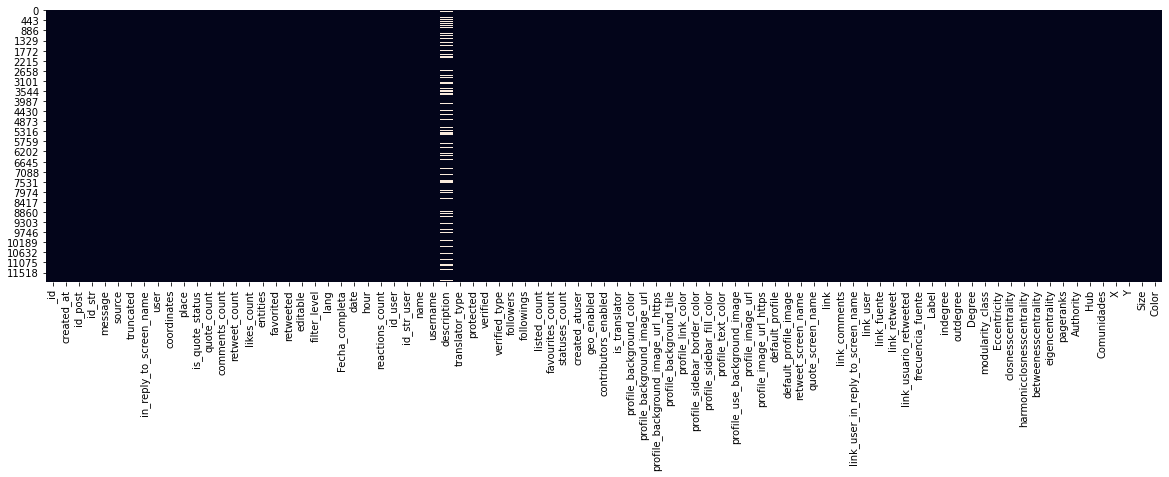

In [83]:
plt.figure(figsize=(20,5))
sns.heatmap(df_1.isnull(), cbar=False)
plt.show()

In [103]:
df_1['Color'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11936 entries, 0 to 11935
Series name: Color
Non-Null Count  Dtype 
--------------  ----- 
11936 non-null  object
dtypes: object(1)
memory usage: 93.4+ KB


## 2.3 Variables Numericas

In [26]:
# Seleccionamos las variables numericas, sin la variable 'Comunidades' y 'Color' ya que es de tipo str
df_2 = df_1[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size']]
df_2.shape

(11936, 25)

In [27]:
df_2.select_dtypes(include=np.number).describe()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,X,Y,Size
count,1.193600e+04,11936.000000,11936.000000,1.193600e+04,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,1.193600e+04,...,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000
mean,1.732809e+04,1307.724615,64.581099,2.249979e+04,1.958948,0.660271,0.062584,0.281334,2.963137,6.469988e+04,...,0.518287,0.539491,7719.749172,0.013445,0.000527,0.005442,0.008305,0.480547,0.502926,0.014230
std,1.918463e+05,3619.005115,571.507344,5.079278e+04,21.068754,12.069160,0.977426,4.117333,33.688518,1.981691e+05,...,0.389885,0.382082,48872.889149,0.079378,0.003000,0.061645,0.014025,0.246803,0.248254,0.075140
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.300000e+01,195.000000,0.000000,5.747500e+02,0.000000,0.000000,0.000000,0.000000,0.000000,5.195000e+03,...,0.210965,0.235294,0.000000,0.000000,0.000044,0.000000,0.000004,0.276962,0.301997,0.001041
50%,3.200000e+02,604.500000,1.000000,4.931000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.976050e+04,...,0.288853,0.334985,0.000000,0.000000,0.000044,0.000000,0.000791,0.473505,0.507406,0.002081
75%,1.212000e+03,1520.000000,8.000000,2.256925e+04,0.000000,0.000000,0.000000,0.000000,0.000000,5.232950e+04,...,1.000000,1.000000,0.000000,0.000896,0.000044,0.000000,0.005826,0.678943,0.700886,0.004261
max,5.548273e+06,208248.000000,19299.000000,1.087051e+06,1133.000000,636.000000,65.000000,316.000000,1951.000000,3.089672e+06,...,1.000000,1.000000,451604.376556,1.000000,0.033240,0.972579,0.049748,1.000000,1.000000,1.000000


In [37]:
def box_plot(cols, df):
    fig, axes = plt.subplots(5,5, figsize=(22,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.boxplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Box plots of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

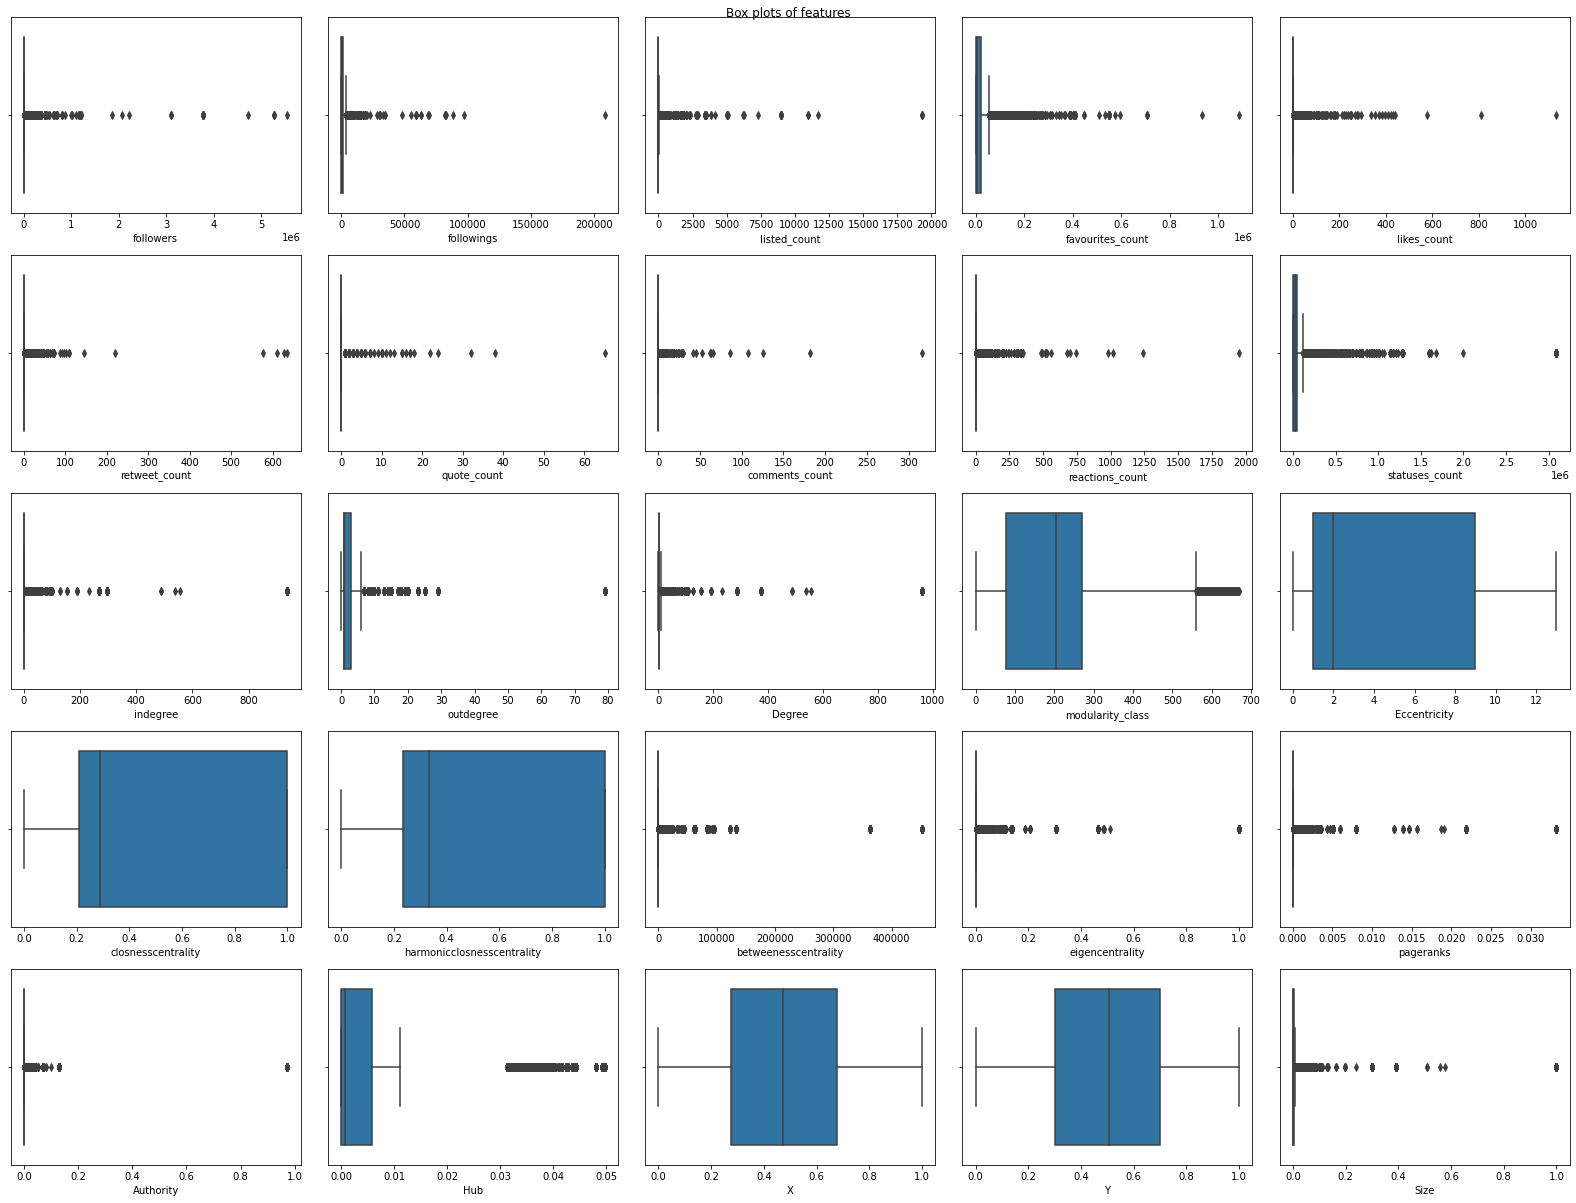

In [95]:
box_plot(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size'], df_2)  

## 2.4 Gráficos de dsitribución

In [114]:
# Check the distribution of numerical features in the original dataset
def distributions(cols, df):
    fig, axes = plt.subplots(5,5, figsize=(26,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.histplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Distribution of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

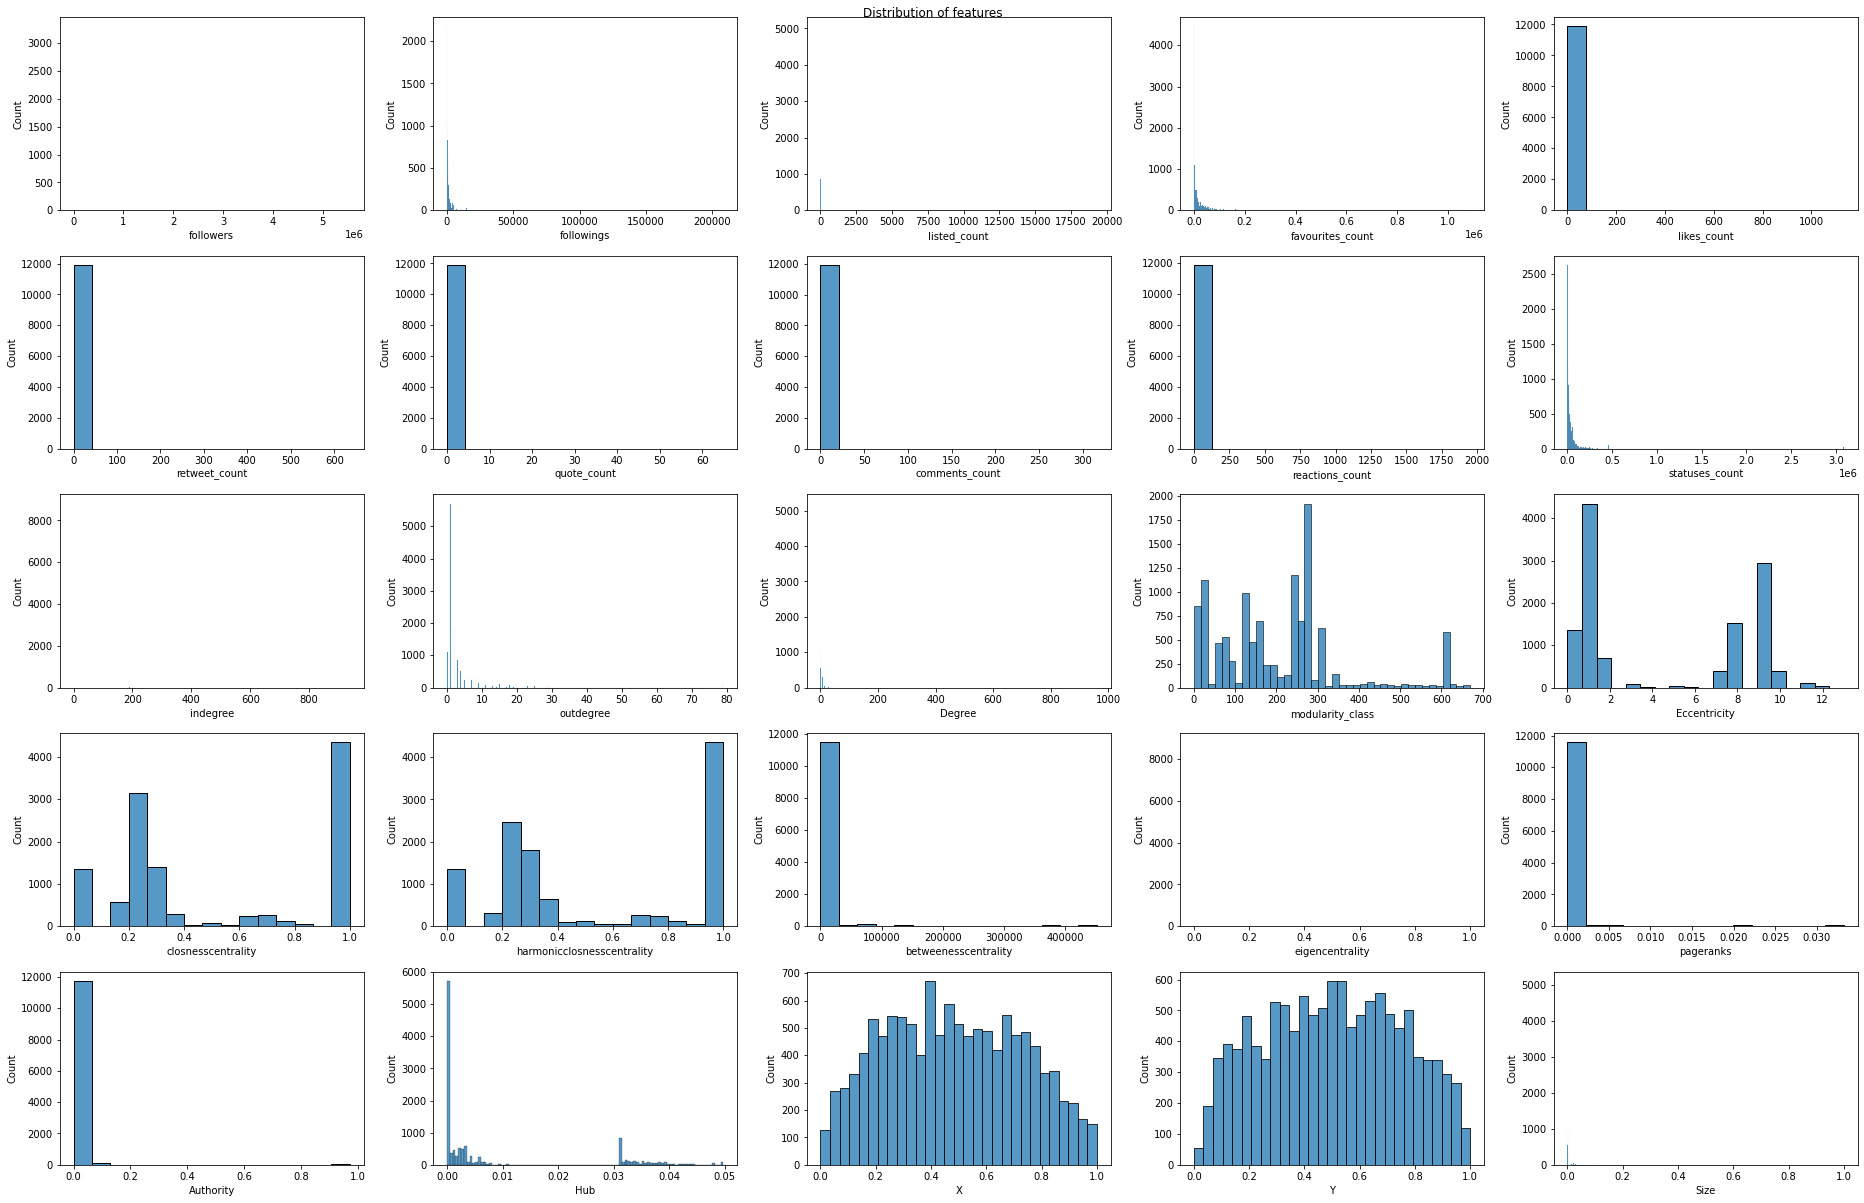

In [115]:
distributions(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size'], df_2)    

## 2.5 Correlacion

In [116]:
# Columnas numericas seleccionadas para evaluar el modelo
#  retiramos reactions_count ya que es la suma de df['reactions_count'] = df['likes_count'] +  df['retweet_count'] +  df['quote_count'] + df['reply_count']
cols_num = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size']

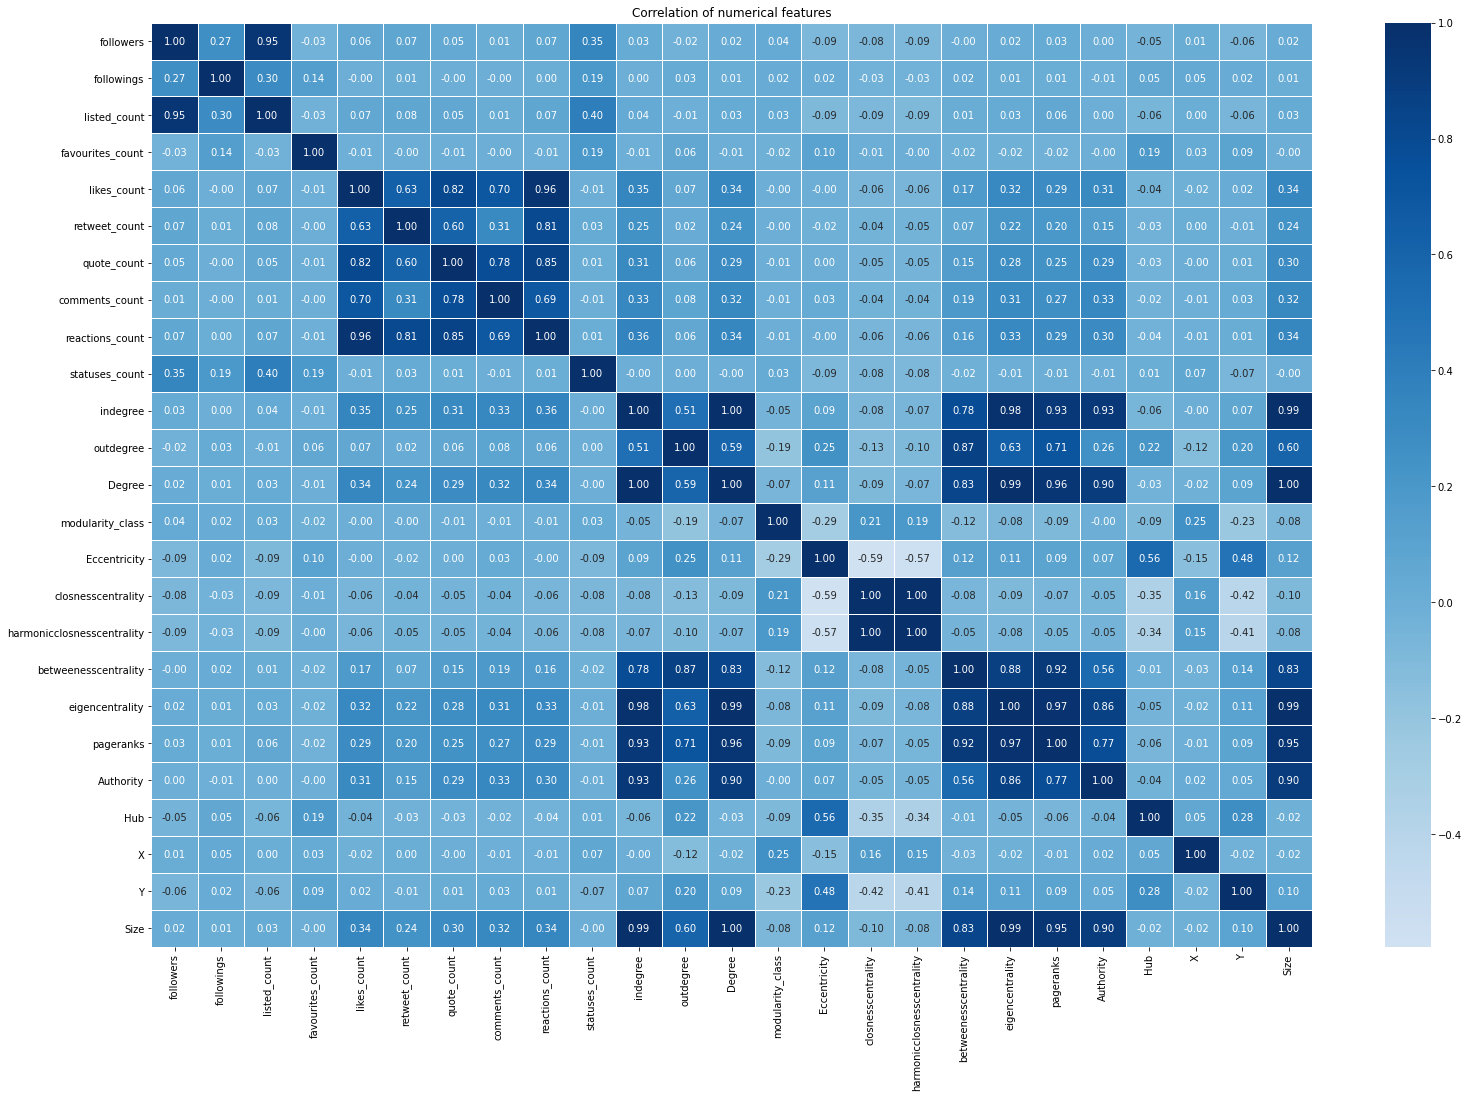

In [117]:
# Correlacion de todas las variables numericas que se tienen
plt.figure(figsize=(26,17))
plt.title('Correlation of numerical features')
sns.heatmap(df_2[cols_num].corr(), annot=True, fmt='.2f', cmap='Blues',  center=0, linewidths=1)
plt.show()

In [194]:
# Columnas numericas seleccionadas para evaluar el modelo
#  retiramos reactions_count ya que es la suma de df['reactions_count'] = df['likes_count'] +  df['retweet_count'] +  df['quote_count'] + df['reply_count']
cols_num = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',  'pageranks']

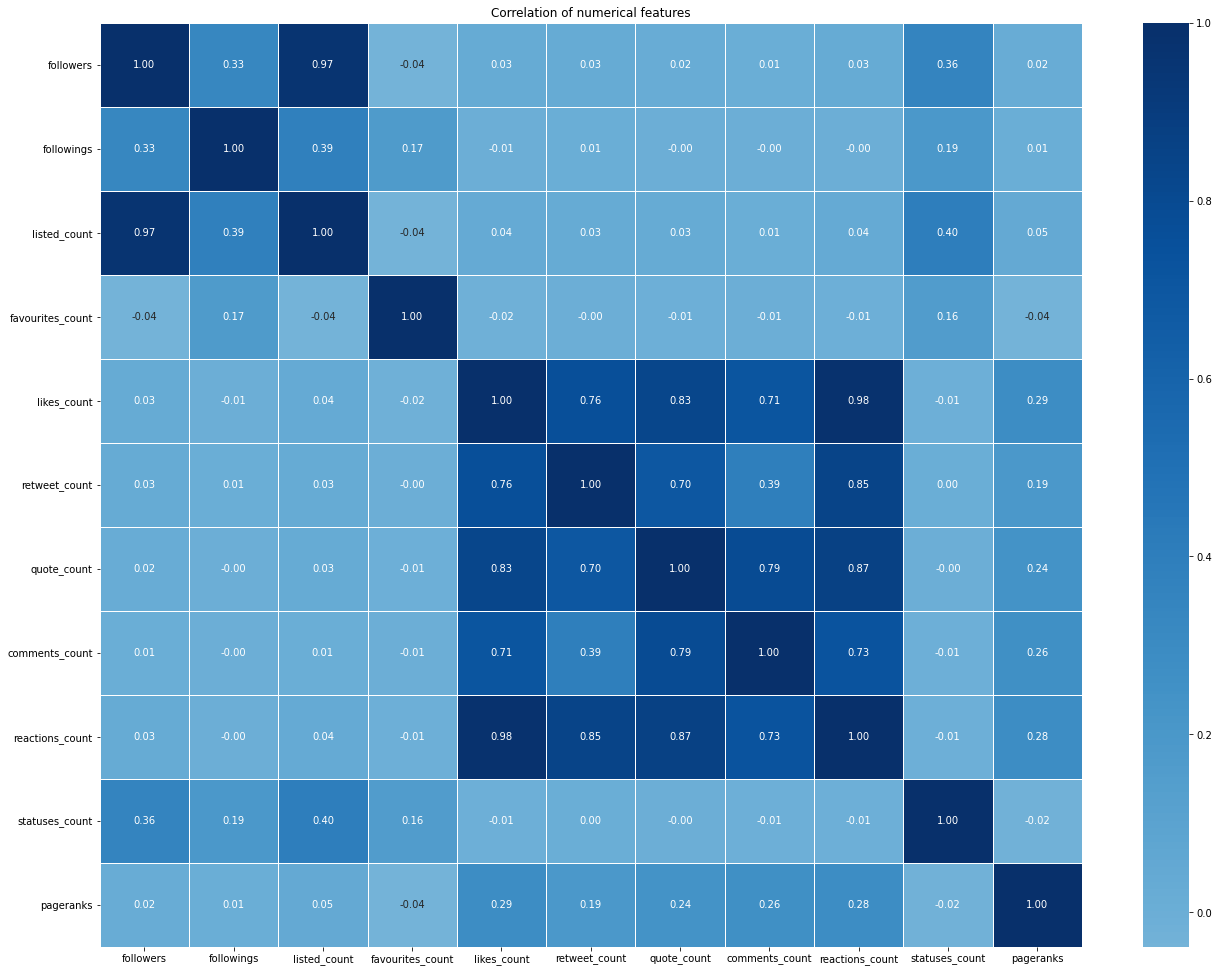

In [195]:
# Correlacion de las variables numericas elegidas en el primer modelo
plt.figure(figsize=(22,17))
plt.title('Correlation of numerical features')
sns.heatmap(df__2[cols_num].corr(), annot=True, fmt='.2f', cmap='Blues',  center=0, linewidths=1)
plt.show()

- **Nota: Las variable que presentan una mayor correlacion con la variable pageranks es likes_count.**

# 3. Definicion / Entrenamiento / Evaluacion de los modelos propuestos (Ciclo 1)

## 3.1 Modelado experimental - v1
Variables: 

+ Predictoras
    - 'followers' 
    - 'followings' 
    - 'listed_count' 
    - 'favourites_count' 
    - 'likes_count' 
    - 'retweet_count' 
    - 'quote_count'
    - 'comments_count' 
    - 'reactions_count' 
    - 'statuses_count'
    - 'indegree' 
    - 'outdegree' 
    - 'Degree'
    - 'modularity_class'
    - 'Eccentricity' 
    - 'closnesscentrality',
    - 'harmonicclosnesscentrality'
    - 'betweenesscentrality'
    - 'eigencentrality'
    - 'Authority' 
    - 'Hub'
    - 'X'
    - 'Y'
    - 'Size'
+ Objetivo:
   - 'pageranks' 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

In [196]:
df_2.shape

(11936, 25)

### 3.1.1 Separacion de variables predictoras y objetivo

In [29]:
# Realizamos la separación de la data para poder utilizarla en el modelado
## Para las "features", seleccionamos las siguientes del dataframe cargado
# X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
#      'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
#        'Authority', 'Hub', 'X', 'Y', 'Size']]
X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count']]
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
y = df_2['pageranks']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    followers  followings  listed_count  favourites_count  likes_count  \
0      17771        4132           214               494           36   
1       1430        1773            10              8738            0   
2        423          47             0              1067            1   
3        336        2513             2              8266            0   
4        867         765            38               809            0   

   retweet_count  quote_count  comments_count  reactions_count  statuses_count  
0             12            4               8               60           16772  
1              0            0               0                0          140642  
2              0            0               0                1             579  
3              0            0               0                0           16260  
4              0            0               0                0           94155  

Variable Objetivo (primeras 5 obser

### 3.1.2 Modelo Linear Regressor

In [30]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.0028346698336271206
El RMSE para la data de entrenamiento: 0.0028153670054172006
El RMSE para la data de prueba: 0.0029370858250565993
CPU times: user 462 ms, sys: 946 ms, total: 1.41 s
Wall time: 2.12 s


In [31]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.0028346698336271176
El RMSE para la data de entrenamiento: 0.0028153670054172
El RMSE para la data de prueba: 0.0029370858250565976
CPU times: user 1.44 s, sys: 1.83 s, total: 3.27 s
Wall time: 936 ms


In [33]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.07075967293741783
El RMSE para la data de prueba: 0.06796947709589052


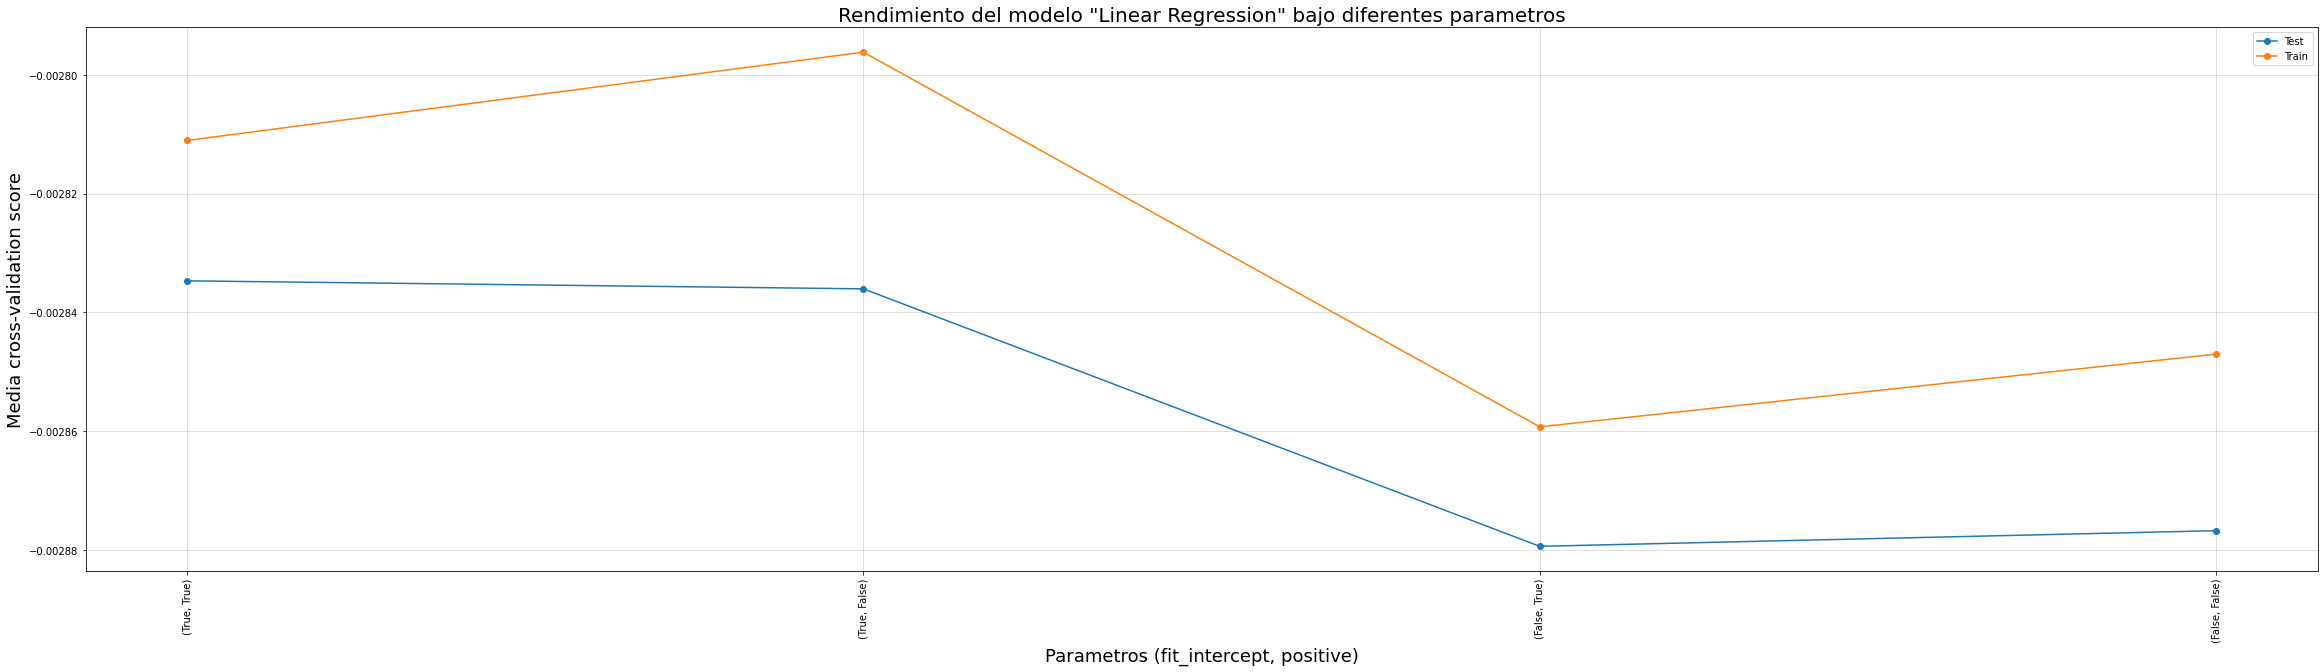

In [34]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [35]:
#predicciones
y_pred = lr.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2276,196,404,5,52429,2,0,0,1,3,24981,0.000497,0.002691,0.002194
3594,2194,2794,13,68800,0,0,0,0,0,152283,0.000044,0.002048,0.002004
9013,784,4265,1,15028,0,0,0,0,0,29439,0.000044,0.000640,0.000596
970,3953,1899,17,226,2,0,0,0,2,24561,0.000119,0.003670,0.003551
8059,26,296,0,7541,0,0,0,0,0,2965,0.000044,0.000522,0.000478


In [36]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 1.373465249635018
Minima diferencia: 3.829460722907683e-05


In [37]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4672,4727452,97083,11683,1758,0,10,0,0,10,1678849,0.000206,1.373671,1.373465


In [38]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
7927,404,1388,0,7702,0,0,1,1,2,6829,0.00099,0.000952,0.000038


### 3.1.2 Modelo RandomForestRegressor

In [39]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
#param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1,2,3,4,5]}
param_grid = {'n_estimators': [100, 500, 1000], 'min_samples_leaf': [1,2,3,4,5]}
# Instanciamos el modelo knn
rf = RandomForestRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_1 = GridSearchCV(rf, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_1.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_1.best_params_)
print('El RMSE para el grid search cv: ', clf_1.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_1.predict(X_train), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_1.predict(X_test), squared=False))

Los mejores parametros fueron:  {'min_samples_leaf': 1, 'n_estimators': 500}
El RMSE para el grid search cv:  -0.0005530436280361246
El RMSE para la data de entrenamiento: 0.0001748761405413128
El RMSE para la data de prueba: 0.00028671827803336563
CPU times: user 19.2 s, sys: 82.8 ms, total: 19.3 s
Wall time: 1min 30s


In [40]:
rf = RandomForestRegressor(**clf_1.best_params_)
rf.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, rf.predict(X_train), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, rf.predict(X_test), squared=False))

El RMSE para la data de entrenamiento: 0.00018046590432210457
El RMSE para la data de prueba: 0.00027005498692554784


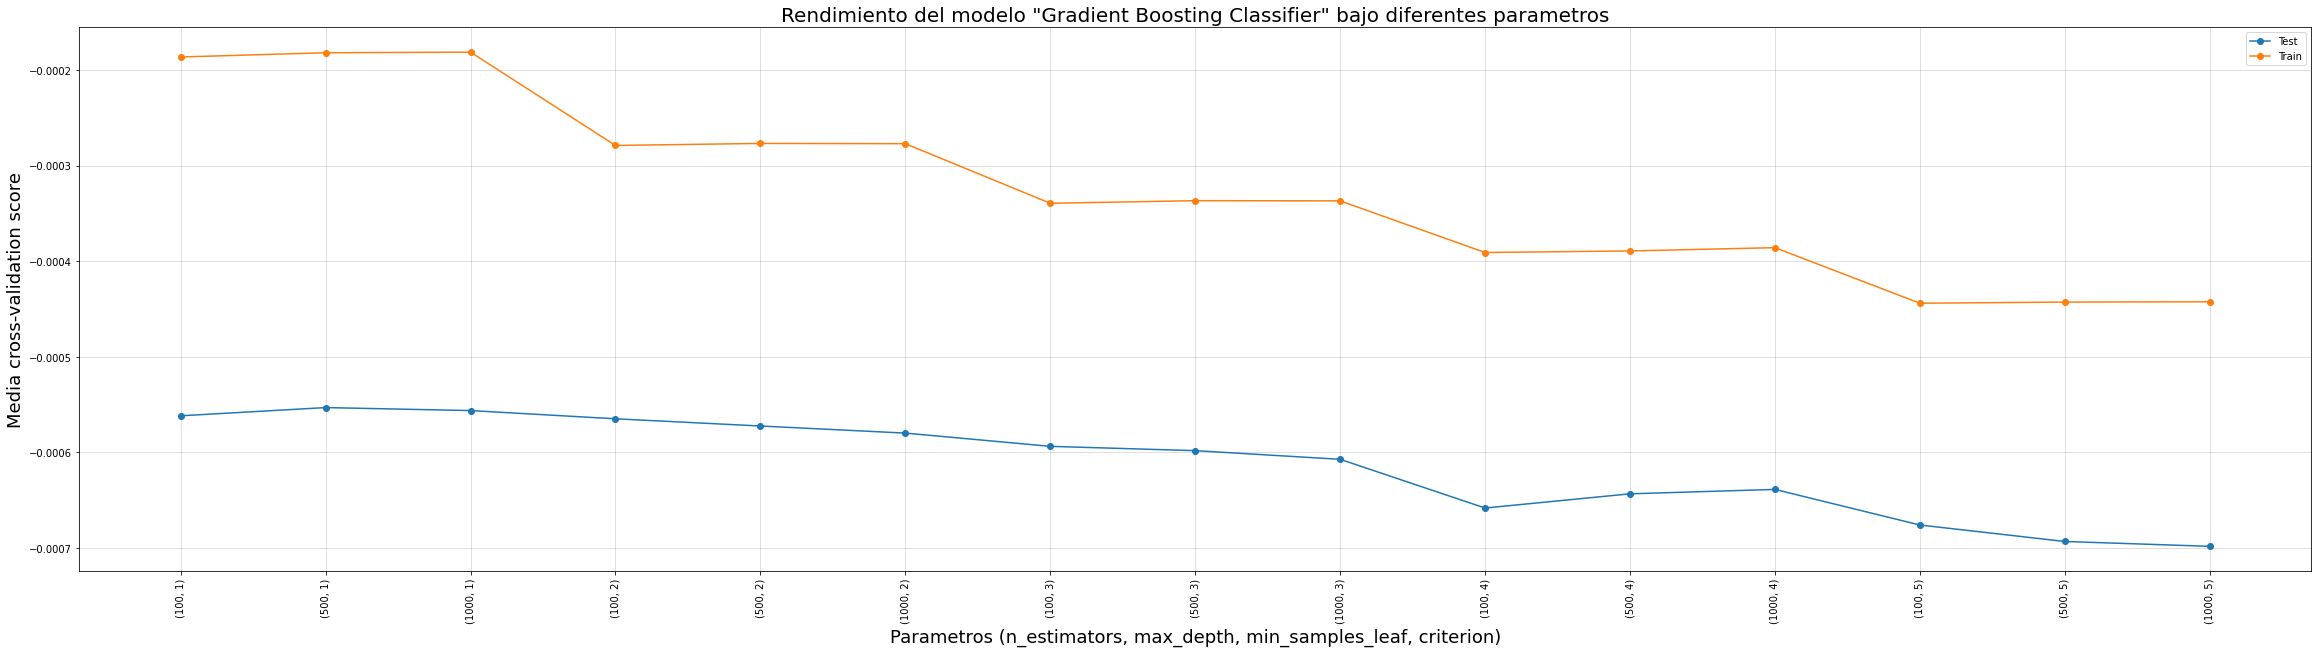

In [41]:
params = [(p['n_estimators'], p['min_samples_leaf']) for p in clf_1.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_1.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_1.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (n_estimators, max_depth, min_samples_leaf, criterion)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Gradient Boosting Classifier" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [42]:
#predicciones
y_pred = rf.predict(X_test)

In [43]:
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2276,196,404,5,52429,2,0,0,1,3,24981,0.000497,0.000454,4.264400e-05
3594,2194,2794,13,68800,0,0,0,0,0,152283,0.000044,0.000050,5.910000e-06
9013,784,4265,1,15028,0,0,0,0,0,29439,0.000044,0.000044,1.151965e-19
970,3953,1899,17,226,2,0,0,0,2,24561,0.000119,0.000111,8.150000e-06
8059,26,296,0,7541,0,0,0,0,0,2965,0.000044,0.000044,1.219727e-19


In [44]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.005996364000000036
Minima diferencia: 2.710505431213761e-20


In [45]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
11045,11843,132,87,749,58,41,10,2,111,15777,0.002214,0.00821,0.005996


In [46]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
8420,971,971,19,28705,0,0,0,0,0,22465,0.000074,0.000074,2.710505e-20
5888,971,971,19,28713,0,0,0,0,0,22470,0.000074,0.000074,2.710505e-20
11831,465,3251,1,3179,0,0,0,0,0,4724,0.000052,0.000052,2.710505e-20
11602,465,3251,1,3179,0,0,0,0,0,4724,0.000052,0.000052,2.710505e-20
6039,971,971,19,28713,0,0,0,0,0,22470,0.000074,0.000074,2.710505e-20
10975,465,3251,1,3179,0,0,0,0,0,4724,0.000052,0.000052,2.710505e-20
11841,465,3251,1,3179,0,0,0,0,0,4724,0.000052,0.000052,2.710505e-20
10080,971,971,19,28705,0,0,0,0,0,22465,0.000074,0.000074,2.710505e-20
11322,971,971,19,28705,0,0,0,0,0,22465,0.000074,0.000074,2.710505e-20
4096,971,971,19,28713,0,0,0,0,0,22470,0.000074,0.000074,2.710505e-20


In [47]:
df_eval_t1 = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count']]

In [48]:
y_pred_22 = clf_1.predict(df_eval_t1)

In [49]:
df_2['pageranks'] = y_pred_22

In [50]:
# df_eval.drop(columns = ['CAMPAÑA', 'ALTITUD'], inplace=True)
# # df_eval.drop(columns = ['ID_ZONA', 'ID_ESTACION'], inplace=True)

In [51]:
df_2.head(4)

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,X,Y,Size
0,17771,4132,214,494,36,12,4,8,60,16772,...,0.235609,0.269564,60835.171301,0.139298,0.005006,0.032597,0.001246,0.245088,0.400068,0.108221
1,1430,1773,10,8738,0,0,0,0,0,140642,...,0.210495,0.235294,0.000000,0.000000,0.000044,0.000000,0.031260,0.717404,0.699044,0.001041
2,423,47,0,1067,1,0,0,0,1,579,...,0.000000,0.000000,0.000000,0.000988,0.000178,0.000000,0.000000,0.778539,0.912495,0.002081
3,336,2513,2,8266,0,0,0,0,0,16260,...,0.175716,0.191900,0.000000,0.000000,0.000052,0.000000,0.000012,0.155210,0.788291,0.001041


### 3.1.3 Modelo GradientBoostingRegressor

In [53]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'learning_rate': [0.01, 0.1, 0.5, 1], 'max_depth': [2, 3, 4, 5, 6, 7]}
# Instanciamos el modelo knn
gbc = GradientBoostingRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_2 = GridSearchCV(gbc, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_2.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_2.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_2.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_2.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_2.predict(X_test),squared=False))

Los mejores parametros fueron:  {'learning_rate': 0.5, 'max_depth': 2}
La mejor precisión con estos parametros fue:  -0.0005209491588104106
El RMSE para la data de entrenamiento: 0.00031636366141090397
El RMSE para la data de prueba: 0.0005529242971015831
CPU times: user 1.48 s, sys: 85.5 ms, total: 1.57 s
Wall time: 11 s


In [54]:
gbc = GradientBoostingRegressor(**clf_2.best_params_)
gbc.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, gbc.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, gbc.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.00031636366141090397
El RMSE para la data de prueba: 0.0005618739737897569


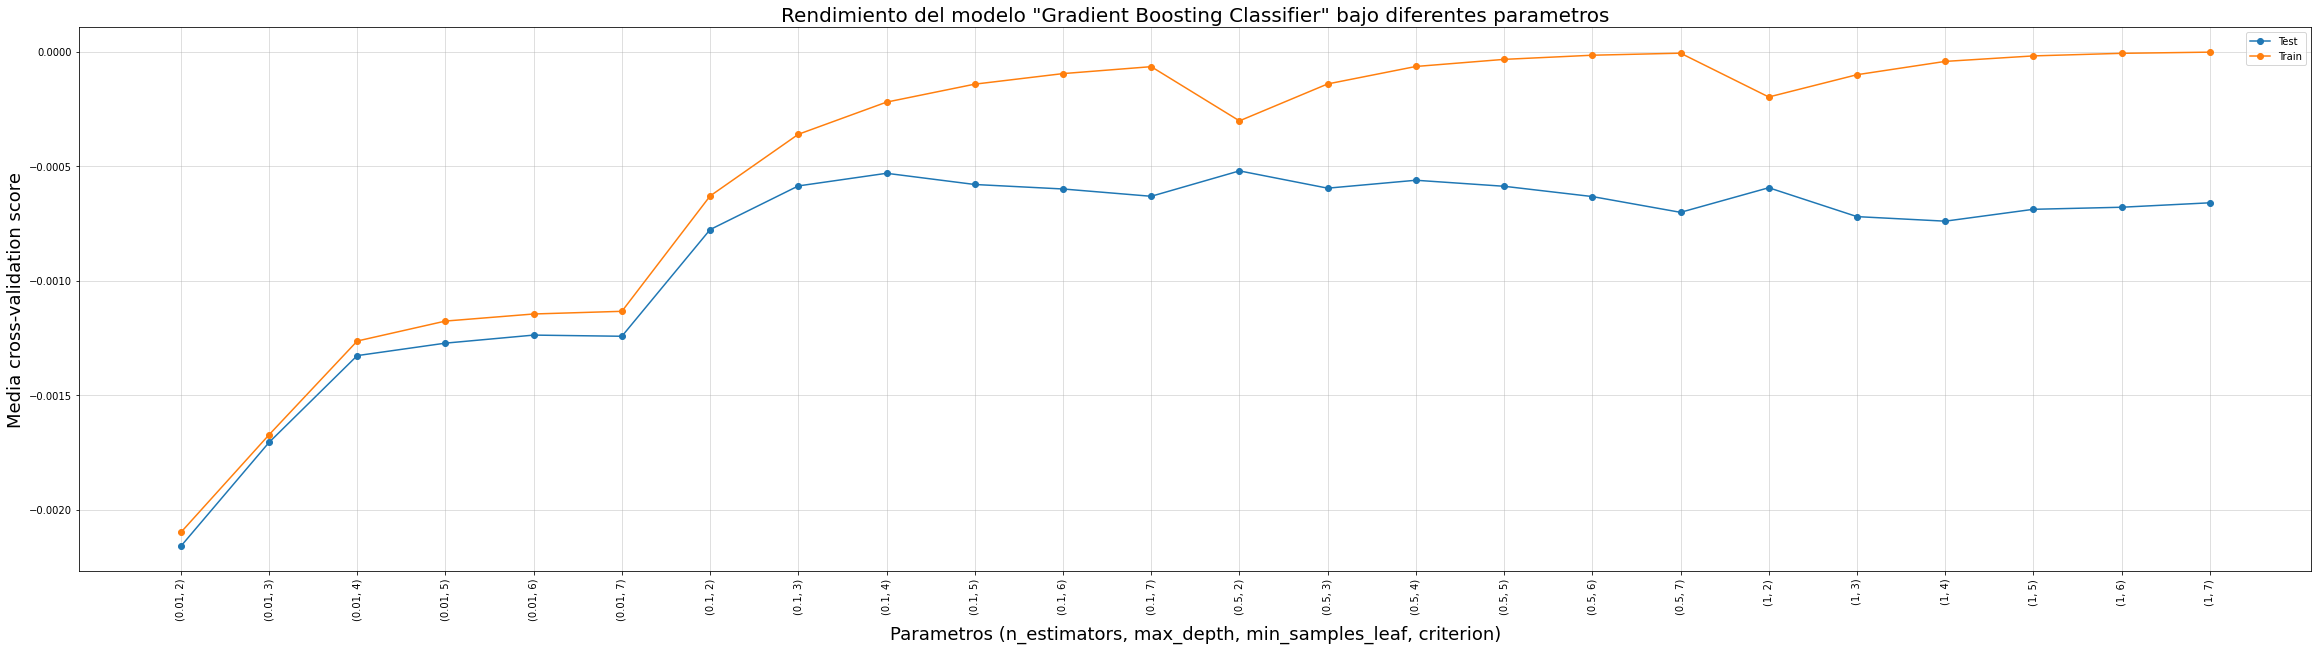

In [55]:
params = [(p['learning_rate'], p['max_depth']) for p in clf_2.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_2.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_2.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (n_estimators, max_depth, min_samples_leaf, criterion)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Gradient Boosting Classifier" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [56]:
#predicciones
y_pred = gbc.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2276,196,404,5,52429,2,0,0,1,3,24981,0.000497,0.000222,0.000275
3594,2194,2794,13,68800,0,0,0,0,0,152283,0.000044,0.000053,0.000009
9013,784,4265,1,15028,0,0,0,0,0,29439,0.000044,0.000003,0.000041
970,3953,1899,17,226,2,0,0,0,2,24561,0.000119,0.000186,0.000067
8059,26,296,0,7541,0,0,0,0,0,2965,0.000044,0.000098,0.000054


In [57]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.0242644886899608
Minima diferencia: 2.467544401670203e-07


In [58]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
1329,21034,3333,114,86823,0,0,0,0,0,195910,0.000044,0.024308,0.024264


In [59]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
11093,244,1204,1,2271,0,0,0,0,0,6314,0.000077,0.000077,2.467544e-07
11100,244,1204,1,2271,0,0,0,0,0,6314,0.000077,0.000077,2.467544e-07


### 3.1.4 Modelo DecisionTreeRegressor

In [60]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1,2,3,4,5]}
# Instanciamos el modelo dt
dt = DecisionTreeRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf = GridSearchCV(dt, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf.best_params_)
print('La mejor precisión con estos parametros fue: ', clf.best_score_)

Los mejores parametros fueron:  {'max_depth': 7, 'min_samples_leaf': 1}
La mejor precisión con estos parametros fue:  -0.0006834713971869355
CPU times: user 437 ms, sys: 112 ms, total: 549 ms
Wall time: 867 ms


In [61]:
dt = DecisionTreeRegressor(**clf.best_params_)
dt.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, dt.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, dt.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.0003013406903729419
El RMSE para la data de prueba: 0.0002879735677844852


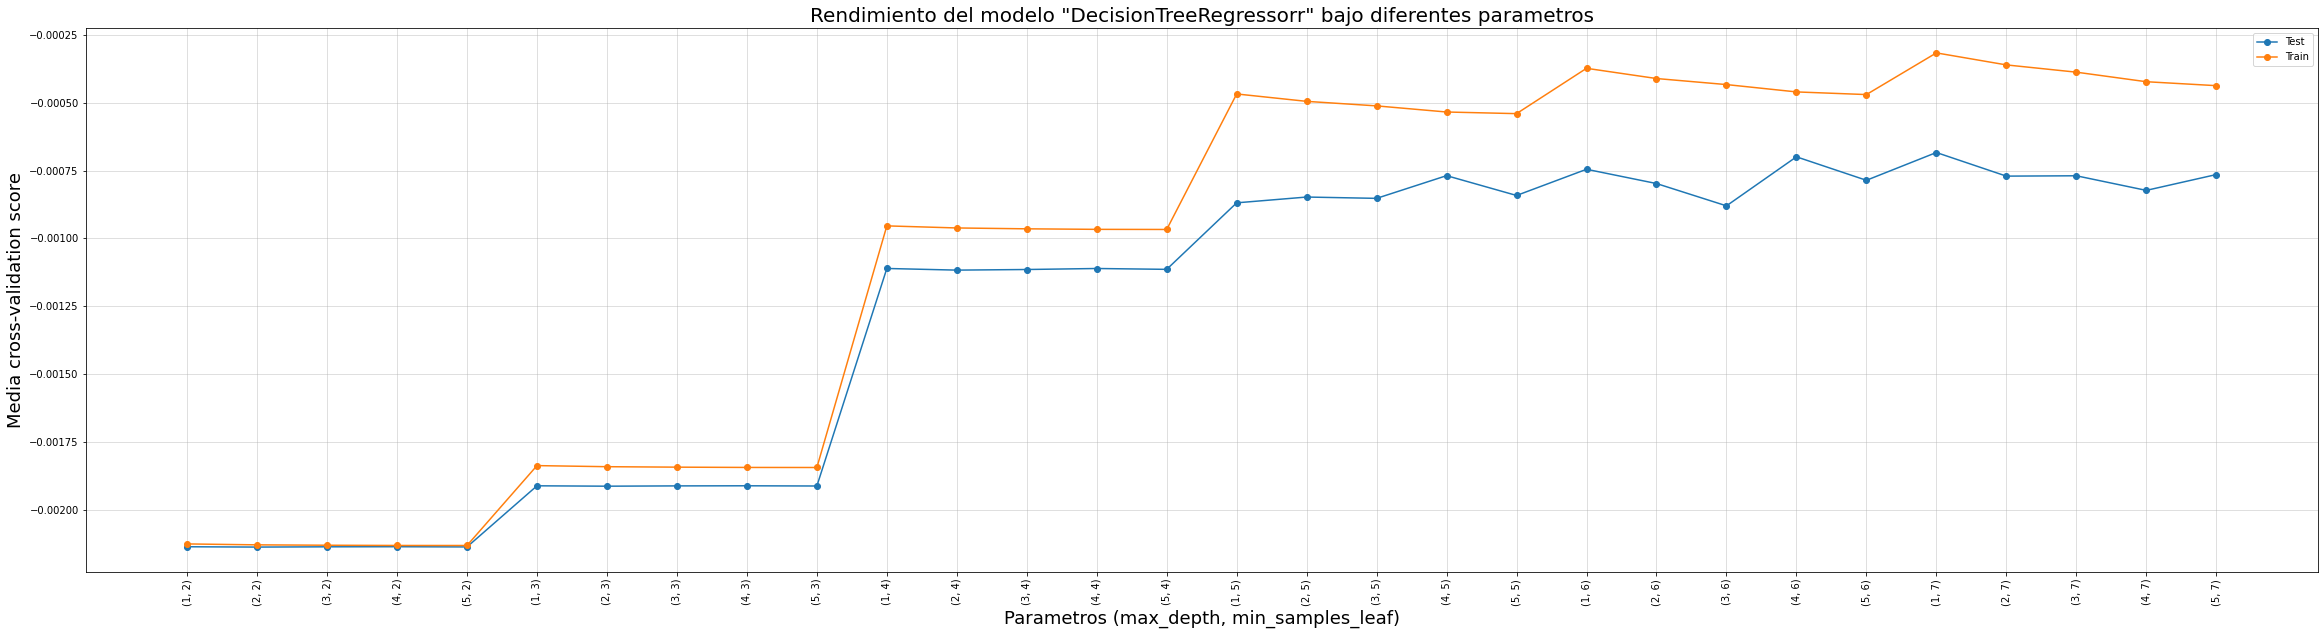

In [62]:
params = [(p['min_samples_leaf'], p['max_depth']) for p in clf.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (max_depth, min_samples_leaf)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "DecisionTreeRegressorr" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [63]:
#predicciones
y_pred = dt.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2276,196,404,5,52429,2,0,0,1,3,24981,0.000497,0.000409,0.000088
3594,2194,2794,13,68800,0,0,0,0,0,152283,0.000044,0.000104,0.000060
9013,784,4265,1,15028,0,0,0,0,0,29439,0.000044,0.000061,0.000017
970,3953,1899,17,226,2,0,0,0,2,24561,0.000119,0.000207,0.000088
8059,26,296,0,7541,0,0,0,0,0,2965,0.000044,0.000061,0.000017


In [64]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.004979244444444449
Minima diferencia: 0.0


In [65]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
9417,183217,72,143,2594,0,0,0,0,0,17087,0.000044,0.005023,0.004979


In [66]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2950,1196959,2,3476,5098,439,108,5,9,561,26853,0.014654,0.014654,0.0
10096,10373,211,83,1095,0,0,0,0,0,9798,0.002350,0.002350,0.0
2822,253908,2,777,15167,39,4,0,0,43,15361,0.012723,0.012723,0.0
2942,1196959,2,3476,5098,0,0,0,0,0,26853,0.014654,0.014654,0.0
2821,706517,2,5058,14238,40,10,4,0,54,17265,0.013932,0.013932,0.0
1219,69836,0,222,0,1,1,2,3,7,64372,0.000063,0.000063,0.0
2946,706517,2,5058,14238,0,0,0,0,0,17265,0.013932,0.013932,0.0
2944,253908,2,777,15167,0,0,0,0,0,15361,0.012723,0.012723,0.0
2814,1196960,2,3476,5098,0,0,0,0,0,26853,0.014654,0.014654,0.0


### 3.1.5 Modelo KNeighborsRegressor

In [67]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
param_grid = {'algorithm' : ['auto',  'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
# Instanciamos el modelo KNR sin escalamiento
knr = KNeighborsRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_3 = GridSearchCV(knr, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_3.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_3.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_3.best_score_)

Los mejores parametros fueron:  {'algorithm': 'auto', 'n_neighbors': 5}
La mejor precisión con estos parametros fue:  -0.000724121304782648
CPU times: user 559 ms, sys: 112 ms, total: 670 ms
Wall time: 6.6 s


In [68]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
param_grid = {'algorithm' : ['auto',  'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
# Normalizar las variables de entrada
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 
# Instanciamos el modelo KNR
knr = KNeighborsRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_3 = GridSearchCV(knr, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_3.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_3.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_3.best_score_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fcf6f4d13a0>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

Los mejores parametros fueron:  {'algorithm': 'auto', 'n_neighbors': 5}
La mejor precisión con estos parametros fue:  -0.0017974873008273751
CPU times: user 595 ms, sys: 72.8 ms, total: 668 ms
Wall time: 3.71 s


In [69]:
knr = KNeighborsRegressor(**clf_3.best_params_)
knr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, knr.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, knr.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.0013948820879682018
El RMSE para la data de prueba: 0.0012483534195739466


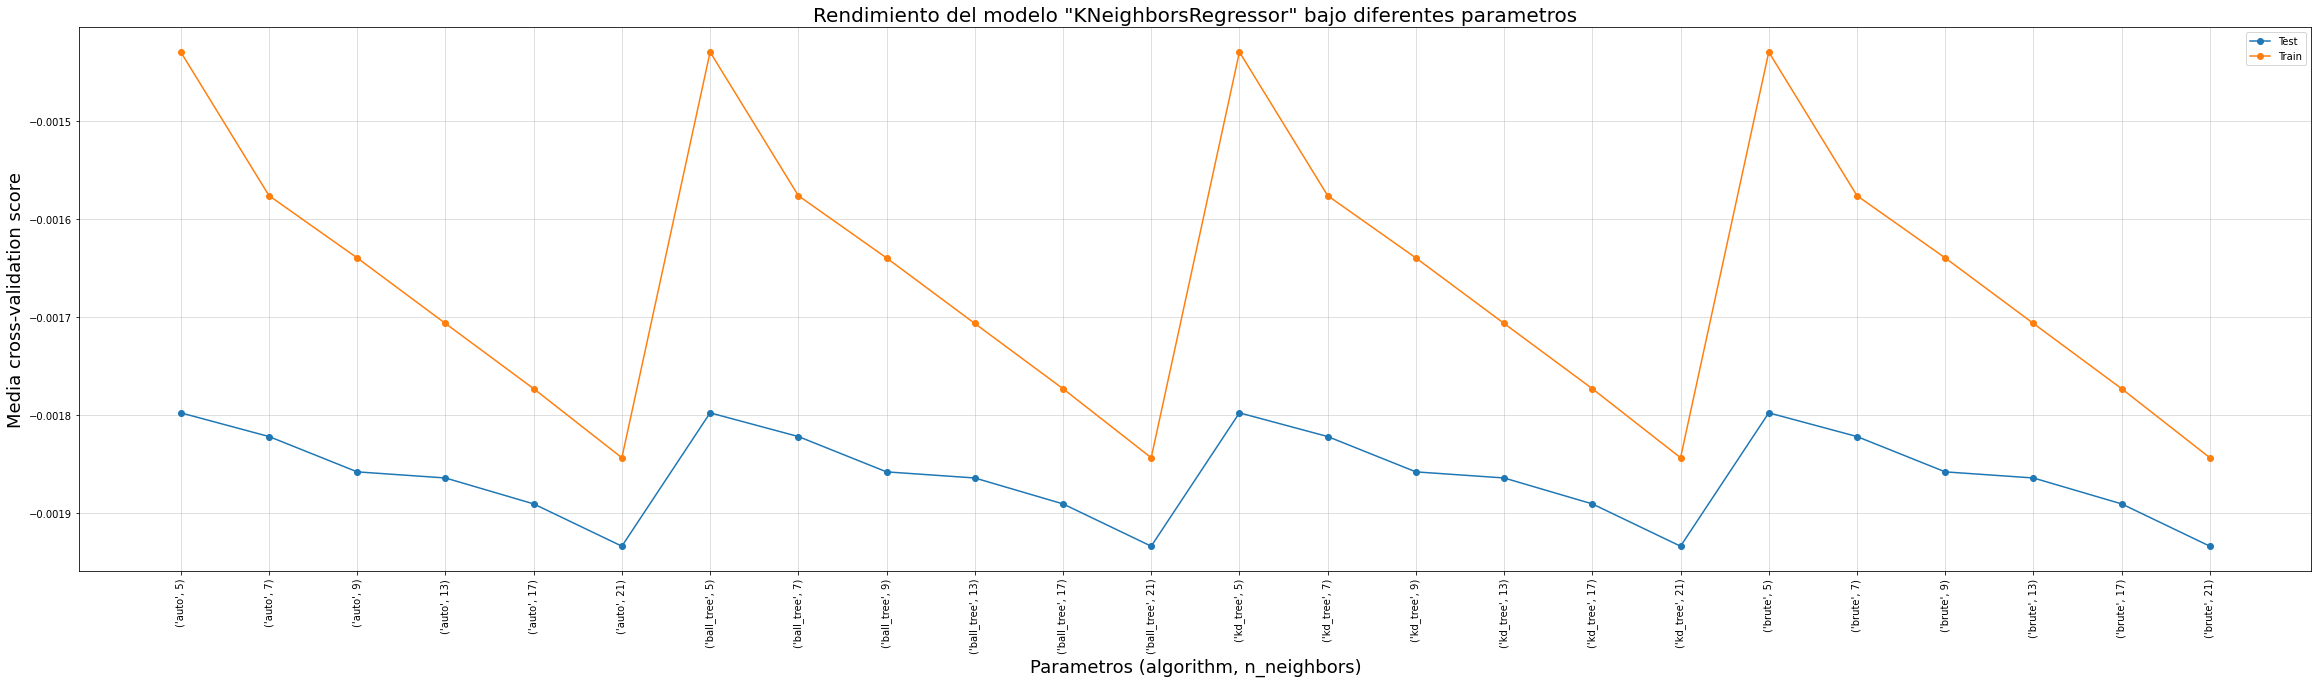

In [70]:
params = [(p['algorithm'], p['n_neighbors']) for p in clf_3.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_3.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_3.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (algorithm, n_neighbors)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "KNeighborsRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [71]:
#predicciones
y_pred = knr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
0,-0.086332,-0.295810,-0.096928,0.613303,-0.005333,-0.054279,-0.061009,0.141414,-0.007483,-0.197362,0.000497,0.000316,0.000181
1,-0.075139,0.487261,-0.083108,0.947395,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,0.423760,0.000044,0.000044,0.000000
2,-0.083038,0.969227,-0.103837,-0.149958,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,-0.175611,0.000044,0.000044,0.000000
3,-0.065286,0.194019,-0.076198,-0.452031,-0.005333,-0.054279,-0.061009,-0.066343,-0.033392,-0.199412,0.000119,0.000106,0.000013
4,-0.087284,-0.331196,-0.105565,-0.302750,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,-0.304781,0.000044,0.000044,0.000000


In [72]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.026395
Minima diferencia: 0.0


In [73]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
552,0.031057,-0.227005,0.001536,0.063321,3.13178,0.365956,3.491143,6.166378,2.920284,-0.050247,0.03324,0.006845,0.026395


In [74]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
1,-0.075139,0.487261,-0.083108,0.947395,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.423760,0.000044,0.000044,0.0
2,-0.083038,0.969227,-0.103837,-0.149958,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,-0.175611,0.000044,0.000044,0.0
4,-0.087284,-0.331196,-0.105565,-0.302750,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,-0.304781,0.000044,0.000044,0.0
6,-0.081526,-0.208329,-0.045105,2.648220,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,1.482887,0.000044,0.000044,0.0
7,2.419236,-0.266322,3.015905,-0.451949,-0.09012,0.085799,-0.061009,-0.066343,-0.033392,14.755653,0.000225,0.000225,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,-0.086332,-0.298104,-0.103837,-0.007943,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,-0.167644,0.000044,0.000044,0.0
3571,-0.087301,-0.312848,-0.105565,-0.364503,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,-0.311524,0.000044,0.000044,0.0
3573,-0.085637,-0.349217,-0.095200,-0.414950,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,-0.146522,0.000142,0.000142,0.0
3578,-0.083156,-0.102828,-0.091745,-0.247241,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,-0.087670,0.001594,0.001594,0.0


### 3.1.6 Modelo Red Neural feedforward

In [75]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from keras import backend as K
from keras.callbacks import EarlyStopping

In [76]:
# Normalizar las variables de entrada
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=27)

In [77]:
# Cantidad de variables de entrada
X_scaled.shape

(11936, 10)

In [78]:
# Arquitectura de red neural
model = tf.keras.Sequential()
model.add(layers.Dense(128, input_shape=(10,), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compilar el modelo con la función de pérdida RMSE
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,777
Trainable params: 11,777
Non-trainable params: 0
_________________________________________________________________


2023-06-08 13:56:33.026703: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-08 13:56:33.026815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fb-2): /proc/driver/nvidia/version does not exist
2023-06-08 13:56:33.028042: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [79]:
early_stopping = EarlyStopping(monitor="val_loss", patience = 5)

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/50
262/262 [==============================] - 2s 4ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 2/50
262/262 [==============================] - 1s 3ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/50
262/262 [==============================] - 1s 3ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 2.3128e-04 - val_mse: 2.3128e-04
Epoch 4/50
262/262 [==============================] - 1s 3ms/step - loss: 9.8256e-04 - mse: 9.8256e-04 - val_loss: 1.4043e-04 - val_mse: 1.4043e-04
Epoch 5/50
262/262 [==============================] - 1s 3ms/step - loss: 1.6256e-04 - mse: 1.6256e-04 - val_loss: 7.8095e-05 - val_mse: 7.8095e-05
Epoch 6/50
262/262 [==============================] - 1s 3ms/step - loss: 3.7251e-04 - mse: 3.7251e-04 - val_loss: 1.2390e-04 - val_mse: 1.2390e-04
Epoch 7/50
262/262 [==============================] - 1s 3ms/step - loss: 6.8188e-05 - mse: 6.8188e-05 - val_loss: 4.5612e-05 - val_mse: 4.5612e-05
Epoc

In [80]:
# Evaluar el modelo en el conjunto de prueba
loss, mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error en el conjunto de prueba: ", rmse)

112/112 [==============================] - 0s 2ms/step - loss: 9.7187e-05 - mse: 9.7187e-05
Root Mean Squared Error en el conjunto de prueba:  0.009858326579248185


In [81]:
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, model.predict(X_train_scaled), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, model.predict(X_test_scaled), squared=False))

El RMSE para la data de entrenamiento: 0.010149874659894777
El RMSE para la data de prueba: 0.009858325883869406


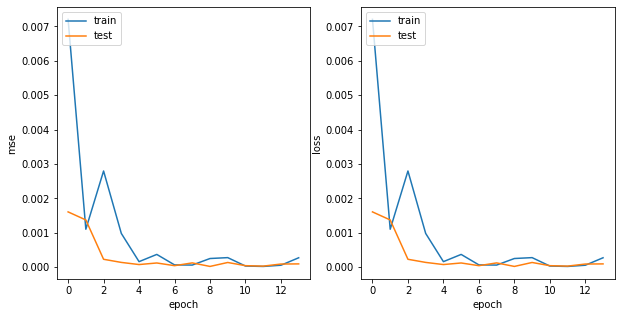

In [82]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['mse'])
ax[0].plot(history.history['val_mse'])
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('mse')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_mse'])
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')

plt.show()

In [83]:
#predicciones
y_pred = model.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred.reshape(1,-1)[0]})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
0,-0.089305,-0.249727,-0.104257,0.589266,0.001949,-0.05471,-0.064032,0.174554,0.001094,-0.200438,0.000497,0.001775,0.001278
1,-0.078890,0.410703,-0.090258,0.911589,-0.092983,-0.05471,-0.064032,-0.068332,-0.087961,0.441980,0.000044,0.004704,0.004660
2,-0.086240,0.817186,-0.111256,-0.147109,-0.092983,-0.05471,-0.064032,-0.068332,-0.087961,-0.177941,0.000044,0.003432,0.003388
3,-0.069721,0.163387,-0.083259,-0.438541,0.001949,-0.05471,-0.064032,-0.068332,-0.028591,-0.202557,0.000119,0.004234,0.004115
4,-0.090191,-0.279570,-0.113006,-0.294518,-0.092983,-0.05471,-0.064032,-0.068332,-0.087961,-0.311539,0.000044,0.002661,0.002617


In [84]:
y_pred.reshape(1,-1)[0]

array([0.00177484, 0.00470415, 0.00343165, ..., 0.00358649, 0.00307152,
       0.00326868], dtype=float32)

In [85]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.18277898743724824
Minima diferencia: 5.5801835060119635e-05


In [86]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
3187,1.195778,57.183933,0.826654,-0.312691,-0.092983,-0.05471,-0.064032,-0.068332,-0.087961,1.914839,0.000044,0.182823,0.182779


In [87]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
1437,-0.086563,0.21368,-0.109506,-0.313735,-0.092983,-0.05471,0.959106,0.660326,0.030779,-0.316374,0.00009,0.000034,0.000056


### 3.1.7 Modelo XGBRegressor

In [88]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
# Instanciamos el modelo XGBRegressor sin escalamiento
xgb = XGBRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_4 = GridSearchCV(xgb, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_4.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_4.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_4.best_score_)

Los mejores parametros fueron:  {'max_depth': 4, 'n_estimators': 100}
La mejor precisión con estos parametros fue:  -0.0005508477798061917
CPU times: user 6.39 s, sys: 174 ms, total: 6.57 s
Wall time: 2.21 s


In [89]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
# Normalizar las variables de entrada
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo XGBRegressor
xgb = XGBRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_4 = GridSearchCV(xgb, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_4.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_4.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_4.best_score_)

Los mejores parametros fueron:  {'max_depth': 4, 'n_estimators': 100}
La mejor precisión con estos parametros fue:  -0.0005508477798061917
CPU times: user 11 s, sys: 42.8 ms, total: 11.1 s
Wall time: 1.44 s


In [90]:
xgb = XGBRegressor(**clf_4.best_params_)
xgb.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, xgb.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, xgb.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.00027265416637342523
El RMSE para la data de prueba: 0.00041548227871811413


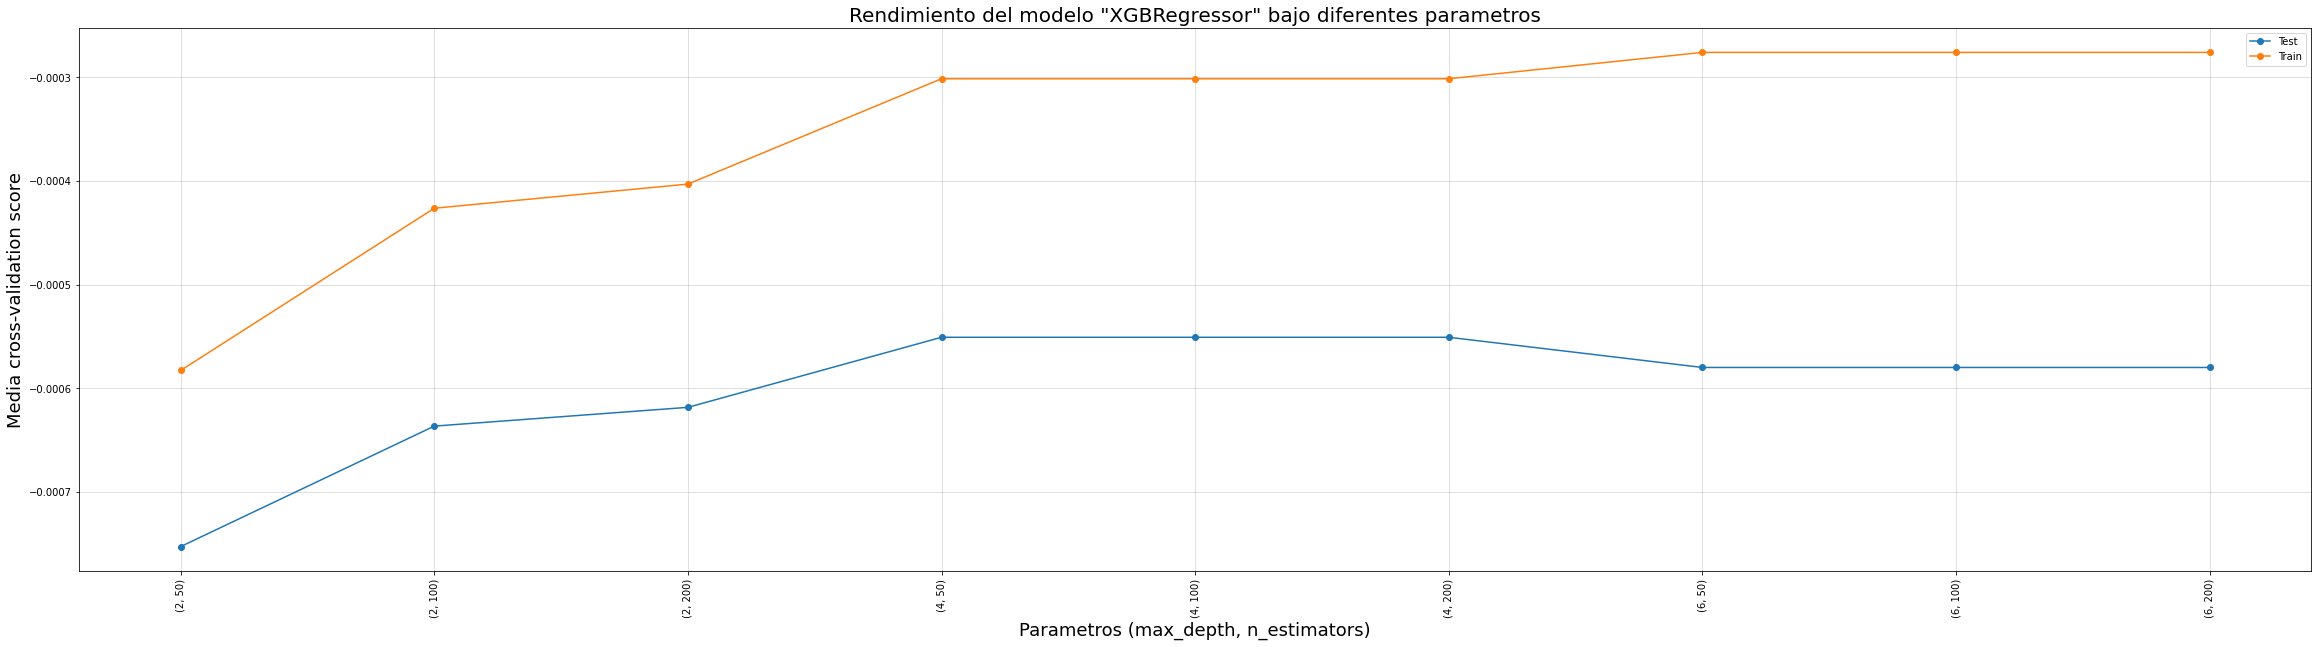

In [91]:
params = [(p['max_depth'], p['n_estimators']) for p in clf_4.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_4.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_4.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (max_depth, n_estimators)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "XGBRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [92]:
#predicciones
y_pred = xgb.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
0,-0.086332,-0.295810,-0.096928,0.613303,-0.005333,-0.054279,-0.061009,0.141414,-0.007483,-0.197362,0.000497,0.000171,0.000326
1,-0.075139,0.487261,-0.083108,0.947395,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,0.423760,0.000044,0.000091,0.000047
2,-0.083038,0.969227,-0.103837,-0.149958,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,-0.175611,0.000044,0.000086,0.000042
3,-0.065286,0.194019,-0.076198,-0.452031,-0.005333,-0.054279,-0.061009,-0.066343,-0.033392,-0.199412,0.000119,0.000156,0.000037
4,-0.087284,-0.331196,-0.105565,-0.302750,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,-0.304781,0.000044,0.000080,0.000036


In [93]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.015098074786126613
Minima diferencia: 4.2307908902876193e-07


In [94]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
1855,0.030401,0.663862,0.091362,1.3152,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.636622,0.000044,0.015142,0.015098


In [95]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
371,-0.086691,-0.423264,-0.105565,-0.454888,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.299303,0.000044,0.000044,4.230791e-07
937,-0.087200,-0.405572,-0.105565,-0.394543,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.493361,0.000044,0.000044,4.230791e-07
1171,-0.087156,-0.405244,-0.105565,-0.428480,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.293000,0.000044,0.000044,4.230791e-07
1897,-0.087015,-0.418677,-0.105565,-0.455867,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.246126,0.000044,0.000044,4.230791e-07
3095,-0.087200,-0.405572,-0.105565,-0.394543,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.490409,0.000044,0.000044,4.230791e-07
3342,-0.087161,-0.405244,-0.105565,-0.428480,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.290043,0.000044,0.000044,4.230791e-07


### 3.1.8 Modelo LGBMRegressor

In [96]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# hyper_params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': ['l1','l2'],'learning_rate': 0.005, 'feature_fraction': 0.9,'bagging_fraction': 0.7,
#     'bagging_freq': 10,'verbose': 0,"max_depth": 8,"num_leaves": 128, "max_bin": 512,"num_iterations": 100000}
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
param_grid = {'metric': ['l1','l2'], 'learning_rate': [0.005, .03, 0.05, .07]}
# Instanciamos el modelo LGBMRegressor sin escalamiento
lgbm = lgb.LGBMRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_5 = GridSearchCV(lgbm, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_5.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_5.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_5.best_score_)

Los mejores parametros fueron:  {'learning_rate': 0.07, 'metric': 'l1'}
La mejor precisión con estos parametros fue:  -0.0005398882126052913
CPU times: user 16 s, sys: 21 ms, total: 16 s
Wall time: 2.49 s


In [97]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# hyper_params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': ['l1','l2'],'learning_rate': 0.005, 'feature_fraction': 0.9,'bagging_fraction': 0.7,
#     'bagging_freq': 10,'verbose': 0,"max_depth": 8,"num_leaves": 128, "max_bin": 512,"num_iterations": 100000}
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
param_grid = {'metric': ['l1','l2'], 'learning_rate': [0.005, .03, 0.05, .07]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LGBMRegressor
lgbm = lgb.LGBMRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_5 = GridSearchCV(lgbm, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_5.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_5.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_5.best_score_)

Los mejores parametros fueron:  {'learning_rate': 0.07, 'metric': 'l1'}
La mejor precisión con estos parametros fue:  -0.0005730135359520763
CPU times: user 15.7 s, sys: 0 ns, total: 15.7 s
Wall time: 1.2 s


In [98]:
lgbm = lgb.LGBMRegressor(**clf_5.best_params_)
lgbm.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lgbm.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lgbm.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.0003296913742977031
El RMSE para la data de prueba: 0.0003608551794211683


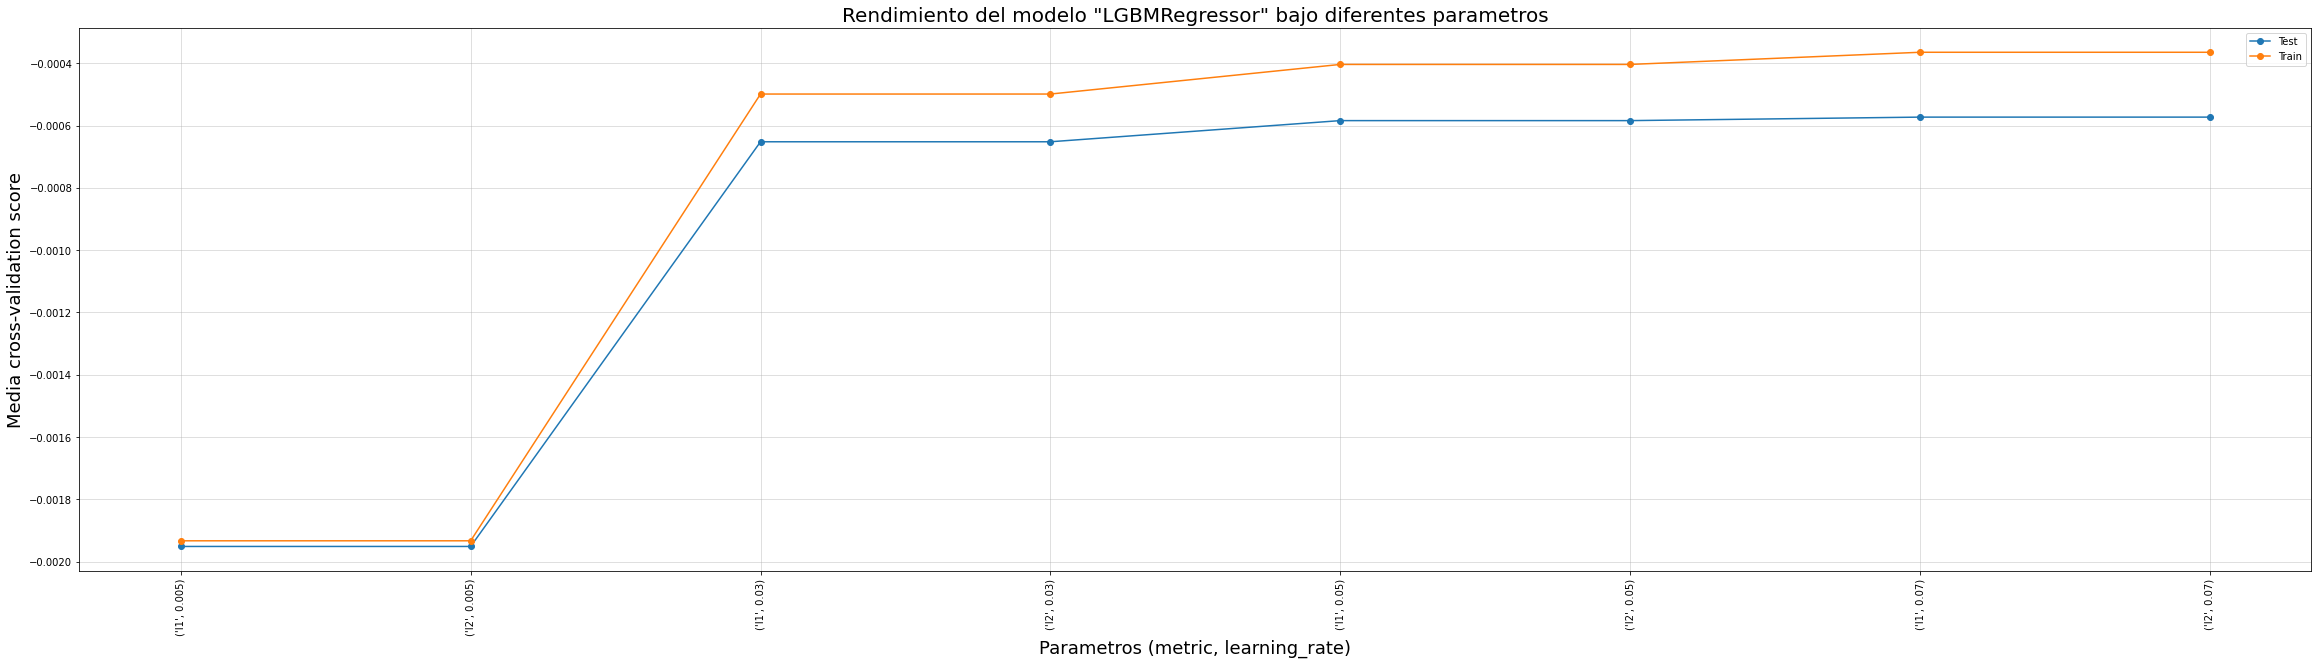

In [99]:
params = [(p['metric'], p['learning_rate']) for p in clf_5.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_5.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_5.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (metric, learning_rate)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "LGBMRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [100]:
#predicciones
y_pred = lgbm.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
0,-0.086332,-0.295810,-0.096928,0.613303,-0.005333,-0.054279,-0.061009,0.141414,-0.007483,-0.197362,0.000497,0.000268,0.000229
1,-0.075139,0.487261,-0.083108,0.947395,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,0.423760,0.000044,0.000040,0.000004
2,-0.083038,0.969227,-0.103837,-0.149958,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,-0.175611,0.000044,0.000064,0.000020
3,-0.065286,0.194019,-0.076198,-0.452031,-0.005333,-0.054279,-0.061009,-0.066343,-0.033392,-0.199412,0.000119,0.000094,0.000025
4,-0.087284,-0.331196,-0.105565,-0.302750,-0.090120,-0.054279,-0.061009,-0.066343,-0.085211,-0.304781,0.000044,0.000069,0.000025


In [101]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.008885867553348427
Minima diferencia: 3.43870865817346e-09


In [102]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
594,-0.020352,-0.384602,0.013628,1.455665,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.556746,0.000044,0.00893,0.008886


In [103]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
1368,-0.0872,-0.40295,-0.105565,-0.456439,-0.09012,-0.054279,-0.061009,-0.066343,-0.085211,0.17592,0.000044,0.000044,3.438709e-09


### 3.1.9 Prediciendo nuevos valores

In [225]:
# df_3 = X_test.sample(n=8,replace=True)
df_3 = df_2.sample(n=8,replace=True)
df_3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,X,Y,Size
1501,691,143,6,10795,5,0,1,0,6,10208,...,0.000000,0.000000,0.000000,0.006274,0.000207,0.000000,0.000000,0.245712,0.131928,0.007284
3281,163,233,0,53,0,0,0,0,0,25603,...,0.233529,0.265086,838.200888,0.001030,0.000152,0.000000,0.031502,0.421012,0.661342,0.004162
8820,4,419,0,249,1,0,0,0,1,70,...,0.210495,0.235294,0.000000,0.000000,0.000079,0.000000,0.031260,0.578896,0.536279,0.001041
11290,153,731,1,38662,0,0,0,0,0,6360,...,0.000000,0.000000,0.000000,0.000000,0.000044,0.000000,0.000000,0.666470,0.069270,0.000000
7433,529,612,3,416,0,0,0,0,0,2307,...,0.194812,0.211678,0.000000,0.000000,0.000050,0.000000,0.000166,0.105647,0.655124,0.001041
10244,384,62,0,238,34,11,1,0,46,1424,...,0.000000,0.000000,0.000000,0.012349,0.000760,0.001333,0.000000,0.599572,0.265340,0.013528
3236,1037,4037,2,8071,0,0,0,0,0,176747,...,0.302439,0.363108,0.000000,0.000000,0.000044,0.000000,0.038150,0.105599,0.586385,0.019771
3669,194,195,1,37365,0,0,0,0,0,11116,...,1.000000,1.000000,0.000000,0.000000,0.000054,0.000000,0.003194,0.925862,0.506199,0.001041


In [221]:
df_3.columns

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size'],
      dtype='object')

In [236]:
# 1. Asegurarse de tener las mismas columnas en df_3 que en X
df_3 = df_3[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count']]
df_3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count
1501,691,143,6,10795,5,0,1,0,6,10208
3281,163,233,0,53,0,0,0,0,0,25603
8820,4,419,0,249,1,0,0,0,1,70
11290,153,731,1,38662,0,0,0,0,0,6360
7433,529,612,3,416,0,0,0,0,0,2307
10244,384,62,0,238,34,11,1,0,46,1424
3236,1037,4037,2,8071,0,0,0,0,0,176747
3669,194,195,1,37365,0,0,0,0,0,11116


In [241]:
X_new = df_3.loc[3236].values.reshape(1,-1)

In [242]:
# 2. Hacer predicciones en df_3 con el modelo entrenado
y_pred = lr.predict(X_new)
y_pred

array([0.00042033])

In [244]:
df_2.loc[3236][['pageranks']]

pageranks    0.000044
Name: 3236, dtype: float64

### 3.1.10 Feature Importance (Seleccion de Caracteristicas mas importantes) - Modelado experimental - v1

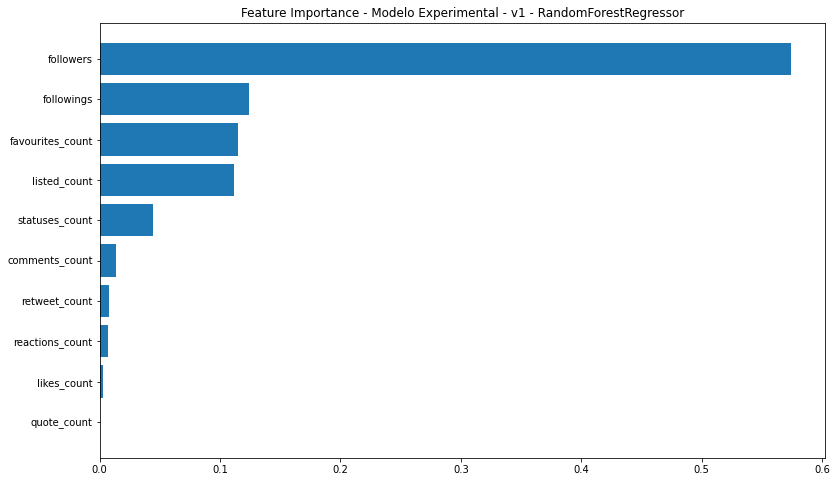

In [107]:
params =  {'min_samples_leaf': 1, 'n_estimators': 500}
rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)

# Graficar la importancia de las características

sort = rf.feature_importances_.argsort()
plt.figure(figsize=(13, 8))
plt.barh(df_2.columns[sort], rf.feature_importances_[sort])
plt.title("Feature Importance - Modelo Experimental - v1 - RandomForestRegressor")
# plot_importance(xgb)
plt.show()

---
---

## 3.2 Modelado experimental - v2
Variables: 

+ Predictoras
    - 'likes_count' 
    - 'retweet_count' 
    - 'quote_count'
+ Objetivo:
   - 'pageranks' 

### 3.2.1 Separacion de variables predictoras y objetivo


In [245]:
# Realizamos la separación de la data para poder utilizarla en el modelado
## Para las "features", seleccionamos las siguientes del dataframe cargado
# X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
#      'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
#        'Authority', 'Hub', 'X', 'Y', 'Size']]
X = df_2[['likes_count', 'retweet_count', 'quote_count']]
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
y = df_2['pageranks']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    likes_count  retweet_count  quote_count
0           36             12            4
1            0              0            0
2            1              0            0
3            0              0            0
4            0              0            0

Variable Objetivo (primeras 5 observaciones): 
 0    0.005055
1    0.000044
2    0.000171
3    0.000052
4    0.000063
Name: pageranks, dtype: float64


### 3.2.2 Modelo Linear Regressor

In [246]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.002818678776829965
El RMSE para la data de entrenamiento: 0.002819045057127431
El RMSE para la data de prueba: 0.002944026580847137
CPU times: user 690 ms, sys: 1.54 s, total: 2.23 s
Wall time: 2.44 s


In [124]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.0028346698336271176
El RMSE para la data de entrenamiento: 0.0028153670054172
El RMSE para la data de prueba: 0.0029370858250565976
CPU times: user 229 ms, sys: 162 ms, total: 391 ms
Wall time: 132 ms


In [125]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.0028153670054172006
El RMSE para la data de prueba: 0.0029370858250565993


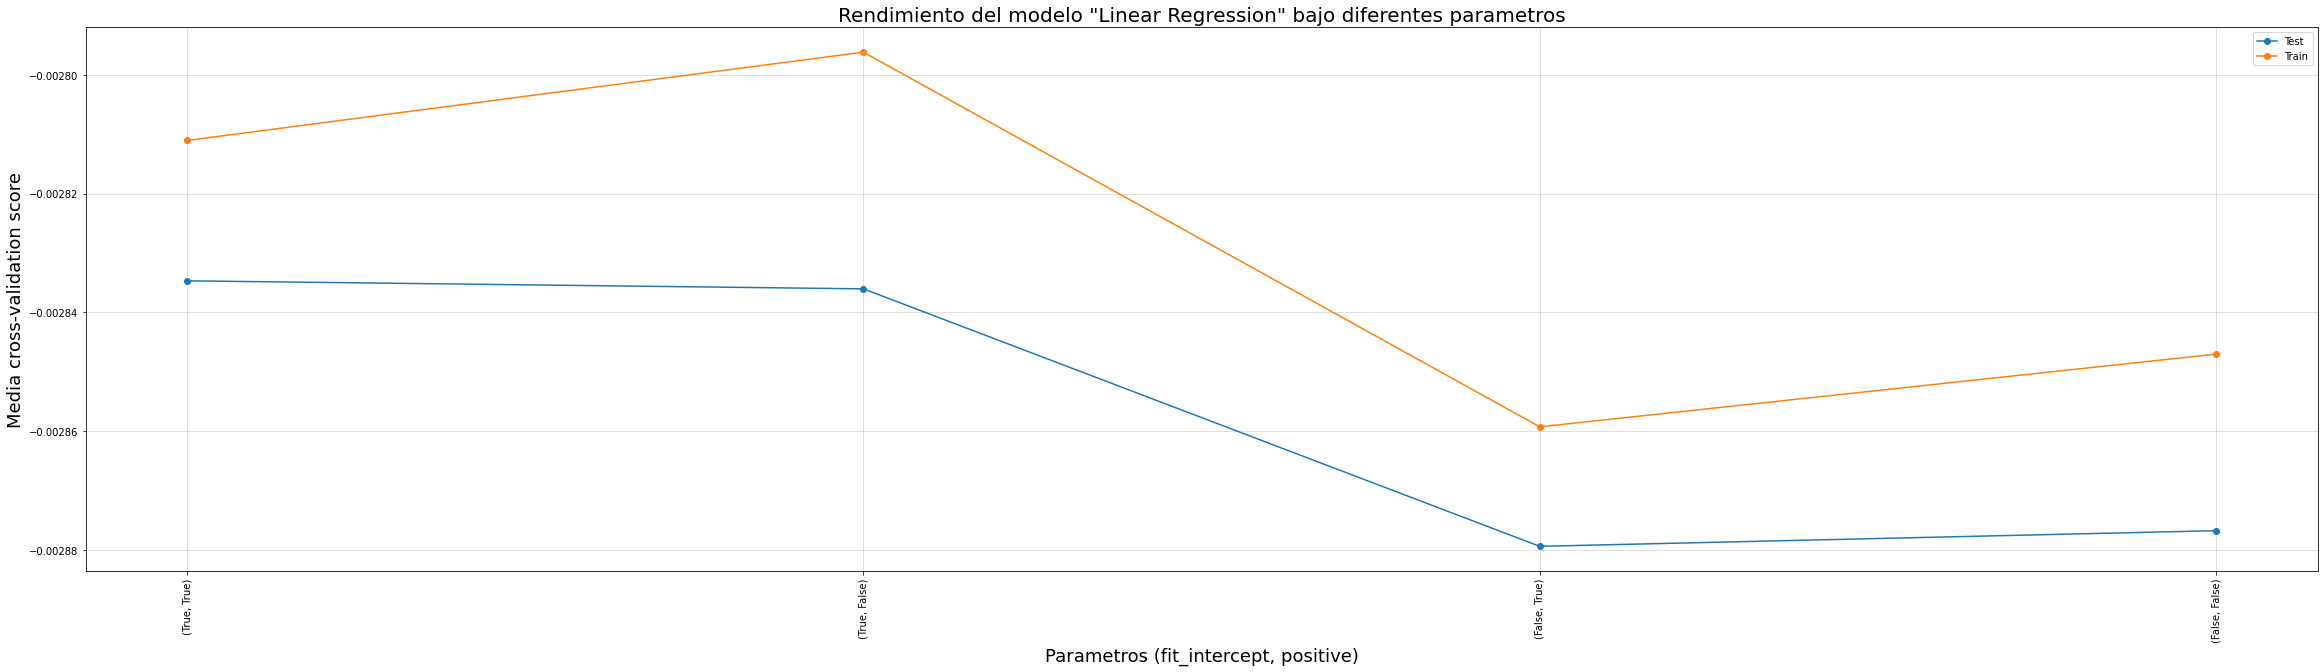

In [126]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [128]:
#predicciones
y_pred = lr.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2276,196,404,5,52429,2,0,0,1,3,24981,0.000497,0.000559,0.000062
3594,2194,2794,13,68800,0,0,0,0,0,152283,0.000044,0.000423,0.000379
9013,784,4265,1,15028,0,0,0,0,0,29439,0.000044,0.000420,0.000376
970,3953,1899,17,226,2,0,0,0,2,24561,0.000119,0.000472,0.000353
8059,26,296,0,7541,0,0,0,0,0,2965,0.000044,0.000420,0.000376


In [129]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.03280750126848983
Minima diferencia: 2.659419995097636e-06


In [130]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
5700,21150,614,62,25483,0,0,0,0,0,55133,0.03324,0.000432,0.032808
11316,21105,614,62,25329,0,0,0,0,0,55079,0.03324,0.000432,0.032808
1194,21151,614,62,25479,0,0,0,0,0,55133,0.03324,0.000432,0.032808


In [131]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2463,10400,211,83,1099,69,19,0,0,88,9811,0.00235,0.002353,0.000003


## 3.3 Modelado experimental - v3
Variables: 

+ Predictoras
    - 'followers' 
    - 'followings' 
+ Objetivo:
   - 'pageranks'

In [249]:
# Realizamos la separación de la data para poder utilizarla en el modelado
## Para las "features", seleccionamos las siguientes del dataframe cargado
# X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
#      'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
#        'Authority', 'Hub', 'X', 'Y', 'Size']]
X = df_2[['followers', 'followings']]
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
y = df_2['pageranks']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    followers  followings
0      17771        4132
1       1430        1773
2        423          47
3        336        2513
4        867         765

Variable Objetivo (primeras 5 observaciones): 
 0    0.005055
1    0.000044
2    0.000171
3    0.000052
4    0.000063
Name: pageranks, dtype: float64


In [252]:
print(X.shape)
print(y.shape)

(11936, 2)
(11936,)


### 3.3.1 Modelo Linear Regressor

In [250]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.0029692609378593627
El RMSE para la data de entrenamiento: 0.0029879887688052473
El RMSE para la data de prueba: 0.0029827768438903707
CPU times: user 449 ms, sys: 464 ms, total: 914 ms
Wall time: 961 ms


In [124]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.0028346698336271176
El RMSE para la data de entrenamiento: 0.0028153670054172
El RMSE para la data de prueba: 0.0029370858250565976
CPU times: user 229 ms, sys: 162 ms, total: 391 ms
Wall time: 132 ms


In [125]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.0028153670054172006
El RMSE para la data de prueba: 0.0029370858250565993


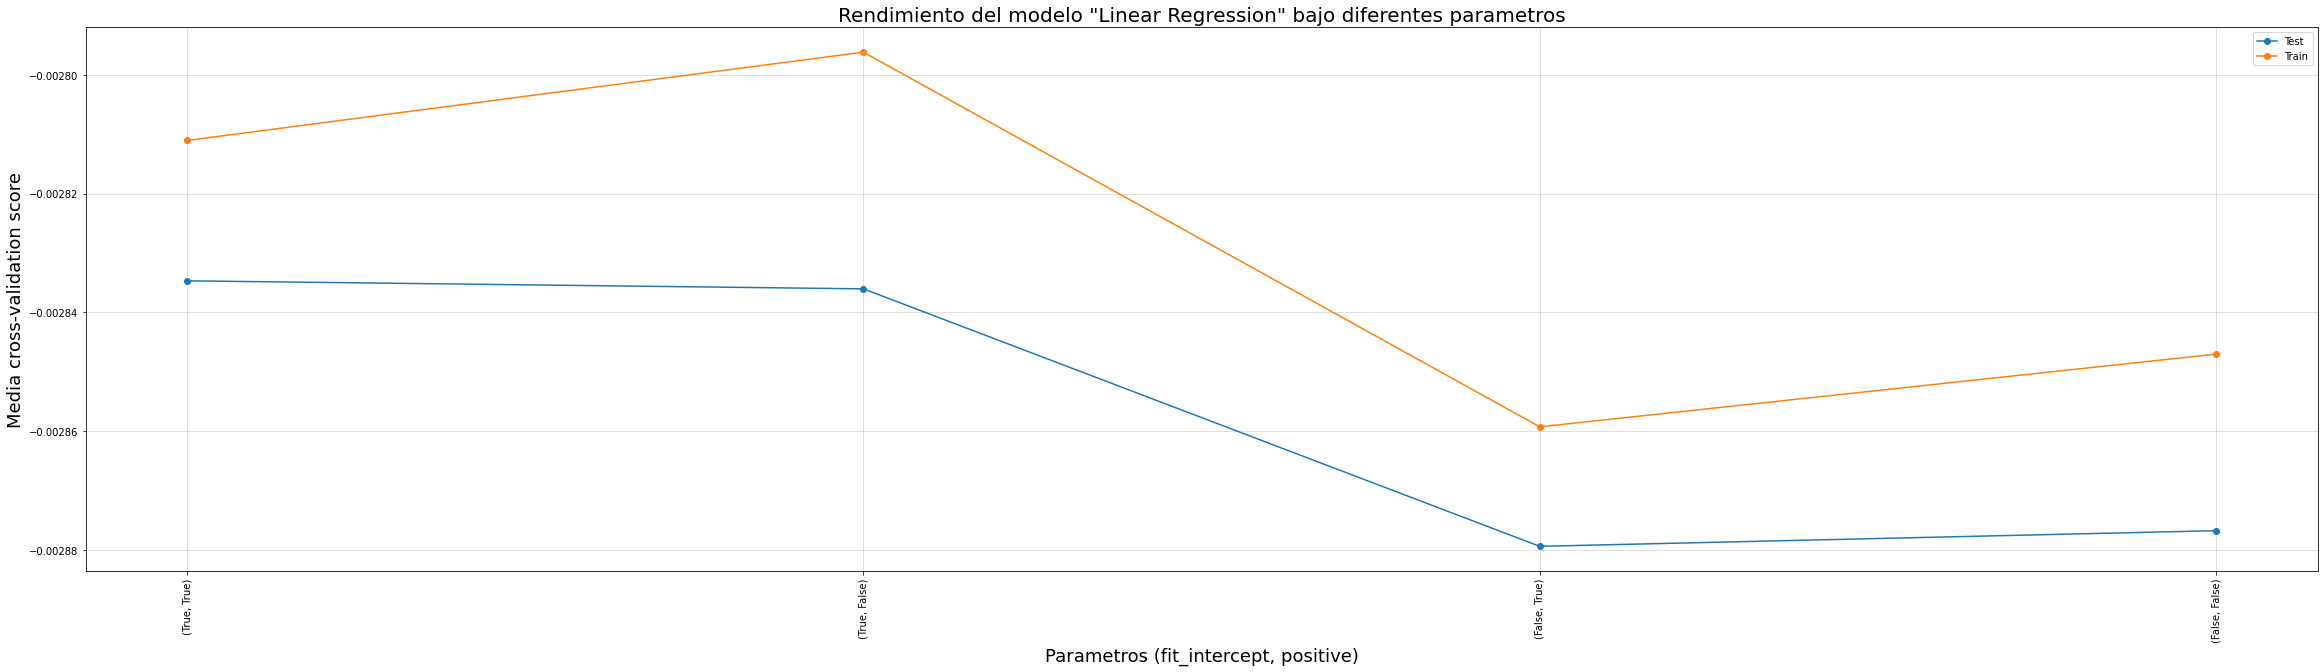

In [126]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [128]:
#predicciones
y_pred = lr.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2276,196,404,5,52429,2,0,0,1,3,24981,0.000497,0.000559,0.000062
3594,2194,2794,13,68800,0,0,0,0,0,152283,0.000044,0.000423,0.000379
9013,784,4265,1,15028,0,0,0,0,0,29439,0.000044,0.000420,0.000376
970,3953,1899,17,226,2,0,0,0,2,24561,0.000119,0.000472,0.000353
8059,26,296,0,7541,0,0,0,0,0,2965,0.000044,0.000420,0.000376


In [129]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 0.03280750126848983
Minima diferencia: 2.659419995097636e-06


In [130]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
5700,21150,614,62,25483,0,0,0,0,0,55133,0.03324,0.000432,0.032808
11316,21105,614,62,25329,0,0,0,0,0,55079,0.03324,0.000432,0.032808
1194,21151,614,62,25479,0,0,0,0,0,55133,0.03324,0.000432,0.032808


In [131]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2463,10400,211,83,1099,69,19,0,0,88,9811,0.00235,0.002353,0.000003


### 3.3.2 Feature Importance (Seleccion de Caracteristicas mas importantes) 

In [55]:
params = {'max_depth': 4, 'n_estimators': 100} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)

# Seleccionar las características más importantes
sfm = SelectFromModel(xgb, threshold=0.1)
sfm.fit(X_train_scaled, y_train)

# Seleccionar las características más importantes en el conjunto de entrenamiento y de prueba
X_train_imp = sfm.transform(X_train_scaled)

In [56]:
X_train_imp

array([[-0.08795999, -0.09550776,  0.09263244],
       [-0.04754052,  0.02348082, -0.20036693],
       [-0.08941956, -0.11300608, -0.27729434],
       ...,
       [-0.08566118, -0.11125625,  0.07853279],
       [-0.08768372, -0.05876129, -0.23200285],
       [-0.08976359, -0.11300608, -0.2802364 ]])

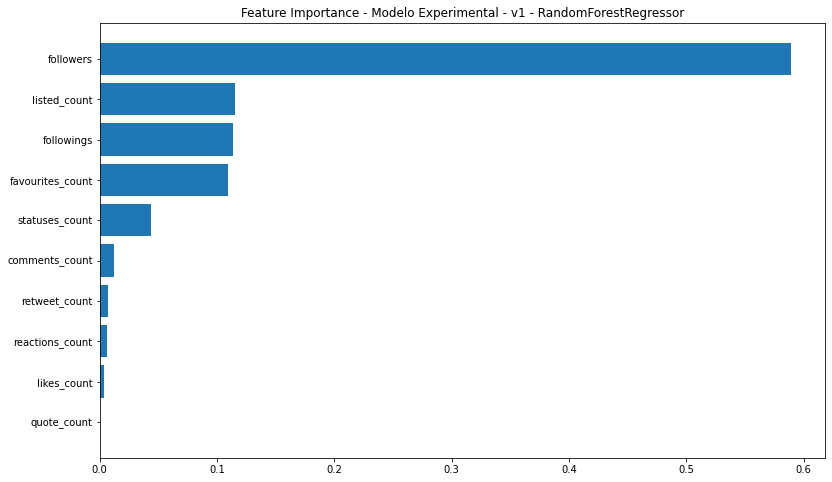

In [67]:
params =  {'min_samples_leaf': 1, 'n_estimators': 1000}
rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
# model = xgb.XGBRegressor(random_state=88, **params)
# model.fit(X_train_sclaed, y_train)

# Graficar la importancia de las características

sort = rf.feature_importances_.argsort()
plt.figure(figsize=(13, 8))
plt.barh(df_2.columns[sort], rf.feature_importances_[sort])
plt.title("Feature Importance - Modelo Experimental - v1 - RandomForestRegressor")
# plot_importance(xgb)
plt.show()

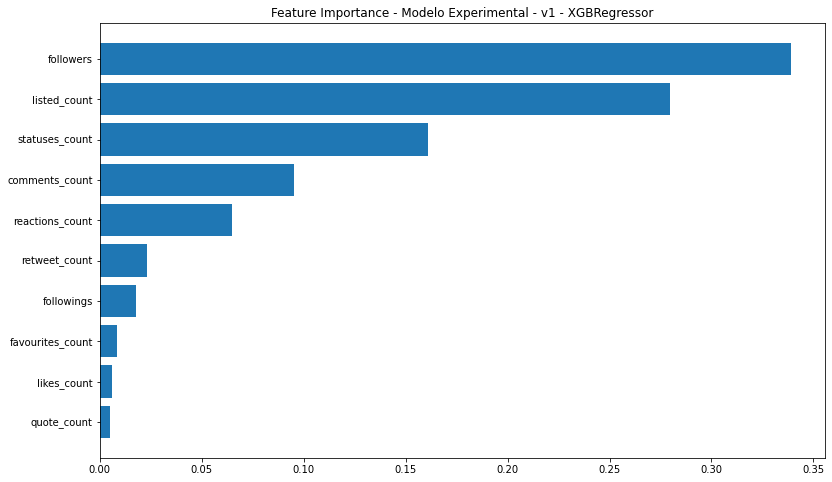

In [68]:
# Entrenar el modelo
# params = {'eta': 0.15, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 0.1, 'seed': 88}
params = {'max_depth': 4, 'n_estimators': 100, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)
# model = xgb.XGBRegressor(random_state=88, **params)
# model.fit(X_train_sclaed, y_train)

# Graficar la importancia de las características

sort = xgb.feature_importances_.argsort()
plt.figure(figsize=(13, 8))
plt.barh(df_2.columns[sort], xgb.feature_importances_[sort])
plt.title("Feature Importance - Modelo Experimental - v1 - XGBRegressor")
# plot_importance(xgb)
plt.show()

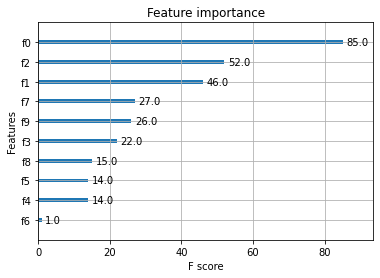

In [277]:
# Entrenar el modelo
# params = {'eta': 0.15, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 0.1, 'seed': 88}
params = {'max_depth': 4, 'n_estimators': 100, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)
# model = xgb.XGBRegressor(random_state=88, **params)
# model.fit(X_train_sclaed, y_train)

# Graficar la importancia de las características
plot_importance(xgb)
plt.show()

In [278]:
# Entrenar el modelo
# params = {'eta': 0.15, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_lambda': 0.1, 'seed': 88}
params = {'max_depth': 4, 'n_estimators': 100, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)

# Obtener la importancia de las características
importance = xgb.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})

# Ordenar las características por importancia descendente
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Mostrar las características ordenadas por importancia
print(feature_importance)

            feature  importance
0         followers    0.344324
2      listed_count    0.270980
9    statuses_count    0.198866
7    comments_count    0.072796
8   reactions_count    0.060249
1        followings    0.018867
5     retweet_count    0.018752
3  favourites_count    0.006491
4       likes_count    0.004377
6       quote_count    0.004299


In [279]:
print(X_train.columns)

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count'],
      dtype='object')


In [280]:
importances = xgb.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]

In [281]:
# cols_use
for i, feature in enumerate(sorted_features):
    print(f"{i+1}. {feature}: {importances[sorted_idx[i]]}")

1. followers: 0.3443235754966736
2. listed_count: 0.27097994089126587
3. statuses_count: 0.19886577129364014
4. comments_count: 0.0727962777018547
5. reactions_count: 0.060248564928770065
6. followings: 0.018866680562496185
7. retweet_count: 0.018752269446849823
8. favourites_count: 0.006491086911410093
9. likes_count: 0.004377221222966909
10. quote_count: 0.004298665095120668


In [282]:
cols_use = []
for i, feature in enumerate(sorted_features):
    
    if importances[sorted_idx[i]] != 0:
        cols_use.append(feature)
        print(f"{i+1}. {feature}: {importances[sorted_idx[i]]}")

1. followers: 0.3443235754966736
2. listed_count: 0.27097994089126587
3. statuses_count: 0.19886577129364014
4. comments_count: 0.0727962777018547
5. reactions_count: 0.060248564928770065
6. followings: 0.018866680562496185
7. retweet_count: 0.018752269446849823
8. favourites_count: 0.006491086911410093
9. likes_count: 0.004377221222966909
10. quote_count: 0.004298665095120668


In [283]:
# Entrenar el modelo
params = {'max_depth': 4, 'n_estimators': 100, 'seed': 88} # Mejor rmse 5696
xgb = XGBRegressor(random_state=88, **params)
xgb.fit(X_train_scaled, y_train)

# Obtener la importancia de las características
importance = xgb.feature_importances_

# Crear un DataFrame con los nombres de las características y su importancia
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importance})

# Ordenar las características por importancia descendente
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Mostrar las características ordenadas por importancia
print(feature_importance)

            feature  importance
0         followers    0.344324
2      listed_count    0.270980
9    statuses_count    0.198866
7    comments_count    0.072796
8   reactions_count    0.060249
1        followings    0.018867
5     retweet_count    0.018752
3  favourites_count    0.006491
4       likes_count    0.004377
6       quote_count    0.004299


In [284]:
feature_importance[:10]

,feature,importance
0,followers,0.344324
2,listed_count,0.270980
9,statuses_count,0.198866
7,comments_count,0.072796
8,reactions_count,0.060249
1,followings,0.018867
5,retweet_count,0.018752
3,favourites_count,0.006491
4,likes_count,0.004377
6,quote_count,0.004299


In [285]:
feature_importance[feature_importance['importance']==0.00]

,feature,importance


**Nota:** 

https://unbounce.com/social-media/whos-twitter-list-are-you-on-the-new-popularity-gauge/

Who’s Twitter List Are You On? – The New Popularity Gauge
By Oli Gardner on October 30th, 2009 in Social Media

- **ENG -> The New Twitter Popularity Gauge"**

**Prior to lists, the primary way of associating popularity with a user was their Twitter follower count, which shows how many people are keeping up to date with their activities. Now with lists, people are re-categorizing, and rating the people they really want to follow.**

**What is appearing now is a new indicator of popularity – The Listed Count – that shows how many people have added you to a list.**

**You can take a look at everyone who’s added you to their lists which gives you insight into how they regard you. At Unbounce I’ve just started getting into listmania, and the first order of business was to create 2 new lists – my Top 10 and Top 100. Now, whenever I come across someone really interesting I can add them to one of these lists that will receive my priority attention. In a sense they are like micro-blogging magazines containing only your favorite authors.**


- **ESP -> El nuevo indicador de popularidad de Twitter:**

**Antes de las listas, la forma principal de asociar la popularidad con un usuario era su número de seguidores en Twitter, que muestra cuántas personas se mantienen al día con sus actividades. Ahora, con las listas, las personas están recategorizando y calificando a las personas que realmente quieren seguir.**

**Lo que aparece ahora es un nuevo indicador de popularidad, The Listed Count, que muestra cuántas personas lo han agregado a una lista.**

**Puede echar un vistazo a todos los que lo agregaron a sus listas, lo que le da una idea de cómo lo consideran. En Unbounce, recién comencé a entrar en listmanía, y la primera orden del día fue crear 2 nuevas listas: mi Top 10 y Top 100. Ahora, cada vez que me encuentro con alguien realmente interesante, puedo agregarlo a una de estas listas que recibirá mi atención prioritaria. En cierto sentido, son como revistas de microblogging que contienen solo a sus autores favoritos.**

---
#### **Variables seleccionadas**

##### Data dictionary: Standard v1.1 (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet)
**Tweet Object**
**Tweet Data Dictionary**

**Below you will find the data dictionary for these ‘root-level’ attributes, as well as links to child object data dictionaries.**

- quote_count | Integer | Nullable. Indicates approximately how many times this Tweet has been quoted by Twitter users. 
    + Example: "quote_count":33   
        + *Note: This object is only available with the Premium and Enterprise tier products.*


- reply_count (comments_count) | Int | Number of times this Tweet has been replied to. 
    + Example: "reply_count":30
        + *Note: This object is only available with the Premium and Enterprise tier products.*


- retweet_count | Int | Number of times this Tweet has been retweeted. 
    + Example: "retweet_count":160
    


- favorite_count (likes_count) | Integer | Nullable. Indicates approximately how many times this Tweet has been liked by Twitter users. 
    + Example: "favorite_count":295

##### Data dictionary: Standard v1.1 (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user)
**User object**
**User Data Dictionary**



**The User object contains Twitter User account metadata that describes the Twitter User referenced. Users can author Tweets, Retweet, quote other Users Tweets, reply to Tweets, follow Users, be @mentioned in Tweets and can be grouped into lists.**

- followers_count (followers) | Int | The number of followers this account currently has. Under certain conditions of duress, this field will temporarily indicate “0”. 
    + Example: "followers_count": 21
    
    
    
- friends_count (followings) | Int | The number of users this account is following (AKA their “followings”). Under certain conditions of duress, this field will temporarily indicate “0”. 
    + Example:"friends_count": 32
    


- listed_count | Int | The number of public lists that this user is a member of.
    + Example: "listed_count": 9274
    
    

- favourites_count | Int | The number of Tweets this user has liked in the account’s lifetime. British spelling used in the field name for historical reasons. 
    + Example:"favourites_count": 13
    
    
    
- statuses_count | Int | The number of Tweets (including retweets) issued by the user. 
    + Example: "statuses_count": 42

# 4. Preparacion de los datos v2 - Data Filtrada con indice de influencia (Ciclo 2)

In [108]:
# Convertir datos almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
df__1 = extract_mongo(client, database, 't_fvf_indice_influencia_v0_1')
df__1.shape

Los datos de la coleccion t_fvf_indice_influencia_v0_1 de la base de datos GNN fueron extraidos satisfactoriamente!


(7074, 91)

## 4.1 Variables Numericas

In [109]:
# Seleccionamos las variables numericas, sin la variable 'Comunidades' y 'Color' ya que es de tipo str
df__2 = df__1[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size', 'indice_influencia']]
df__2.shape

(7074, 26)

In [110]:
df__2.select_dtypes(include=np.number).describe()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,X,Y,Size,indice_influencia
count,7.074000e+03,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7.074000e+03,...,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7074.000000,7.074000e+03
mean,2.426789e+04,1374.273396,92.659881,24990.550184,2.793752,0.817642,0.089907,0.414051,4.115352,8.147892e+04,...,0.438843,13018.865078,0.022211,0.000845,0.009143,0.011067,0.435916,0.538118,0.023010,2.162928e-02
std,2.273221e+05,2907.905101,704.315995,53520.056100,26.135354,11.265800,1.217411,5.289368,40.153688,2.447112e+05,...,0.342607,62940.398707,0.101763,0.003850,0.079857,0.015746,0.225596,0.233235,0.096106,5.781305e-01
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,...,0.000000,0.000000,0.000000,0.000044,0.000000,0.000000,0.004630,0.046302,0.000000,0.000000e+00
25%,1.070000e+02,233.000000,0.000000,792.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.192250e+03,...,0.237454,0.000000,0.000000,0.000044,0.000000,0.000005,0.247347,0.363970,0.002081,4.578564e-08
50%,4.250000e+02,690.000000,2.000000,5837.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.462900e+04,...,0.309564,0.000000,0.000000,0.000044,0.000000,0.002076,0.415215,0.544660,0.004162,9.157128e-08
75%,1.676000e+03,1614.000000,14.000000,25456.750000,0.000000,0.000000,0.000000,0.000000,0.000000,5.689900e+04,...,0.800000,16.000000,0.002964,0.000123,0.000041,0.031298,0.613369,0.725843,0.008523,7.023933e-07
max,5.262508e+06,81962.000000,19299.000000,706679.000000,1133.000000,627.000000,65.000000,316.000000,1951.000000,3.089672e+06,...,1.000000,451604.376556,1.000000,0.033240,0.972579,0.049748,1.000000,0.992875,1.000000,4.635306e+01


In [111]:
def box_plot(cols, df):
    fig, axes = plt.subplots(5,6, figsize=(22,17))
    for col, ax in zip(cols, axes.ravel()):
        sns.boxplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Box plots of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

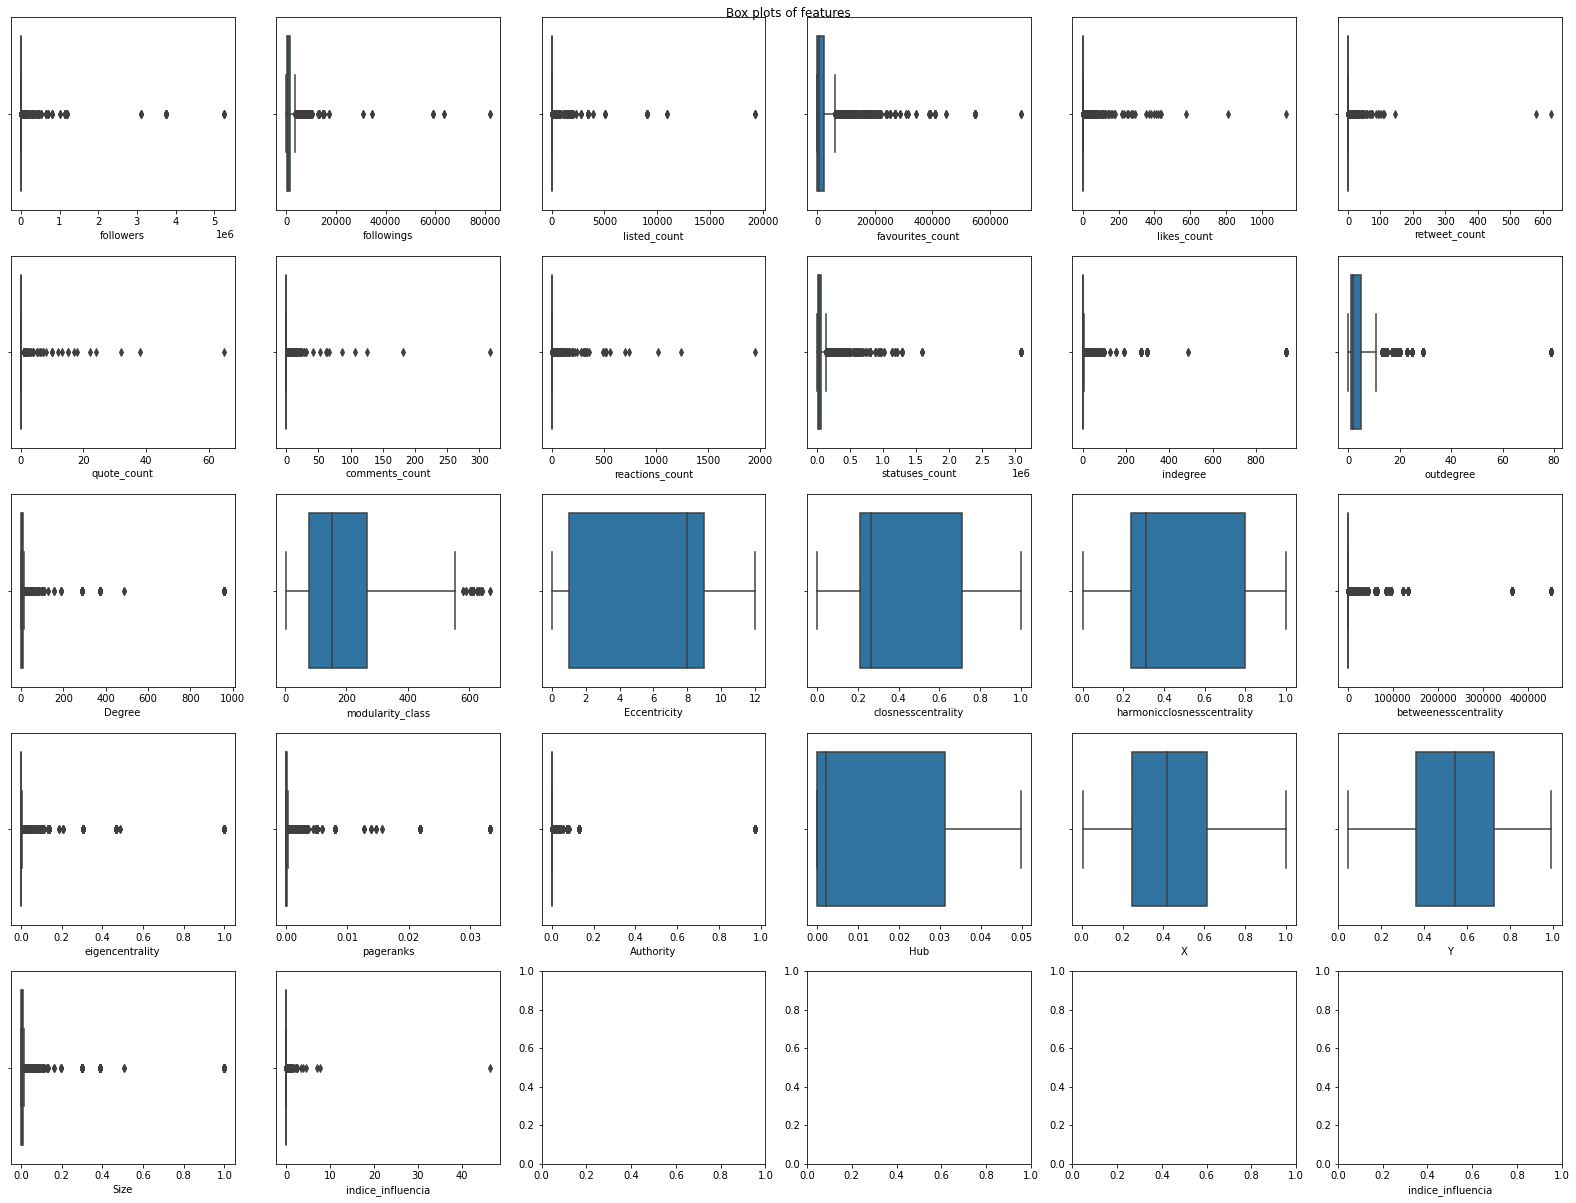

In [8]:
box_plot(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
     'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
      'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size', 'indice_influencia'], df__2)  

- **Nota: casi todos los valores son cercanos a cero, excepto la modularidad, la excentricidad, la centralidad de cercania, la centralidad de cercania armonica, los hubs, y las posiciones X e Y. Varios de ellos unicamente por estar normalizados como se aprecia en los graficos**

## 4.2 Gráficos de distribución

In [9]:
# Check the distribution of numerical features in the original dataset
def distributions(cols, df):
    fig, axes = plt.subplots(3,5, figsize=(17,8))
    for col, ax in zip(cols, axes.ravel()):
        sns.histplot(data=df, x=col, ax=ax)
        plt.xlabel(col)
    
    plt.suptitle("Distribution of features")
    #fig.delaxes(axes[1,2])
    plt.tight_layout()
    plt.show()

In [11]:
distributions(['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
      'Degree',  'pageranks', 'indice_influencia'], df__2)    

## 4.3 Correlacion

In [13]:
# Columnas numericas seleccionadas para evaluar el modelo
#  retiramos reactions_count ya que es la suma de df['reactions_count'] = df['likes_count'] +  df['retweet_count'] +  df['quote_count'] + df['reply_count']
cols_num = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
      'Degree',  'pageranks', 'indice_influencia']

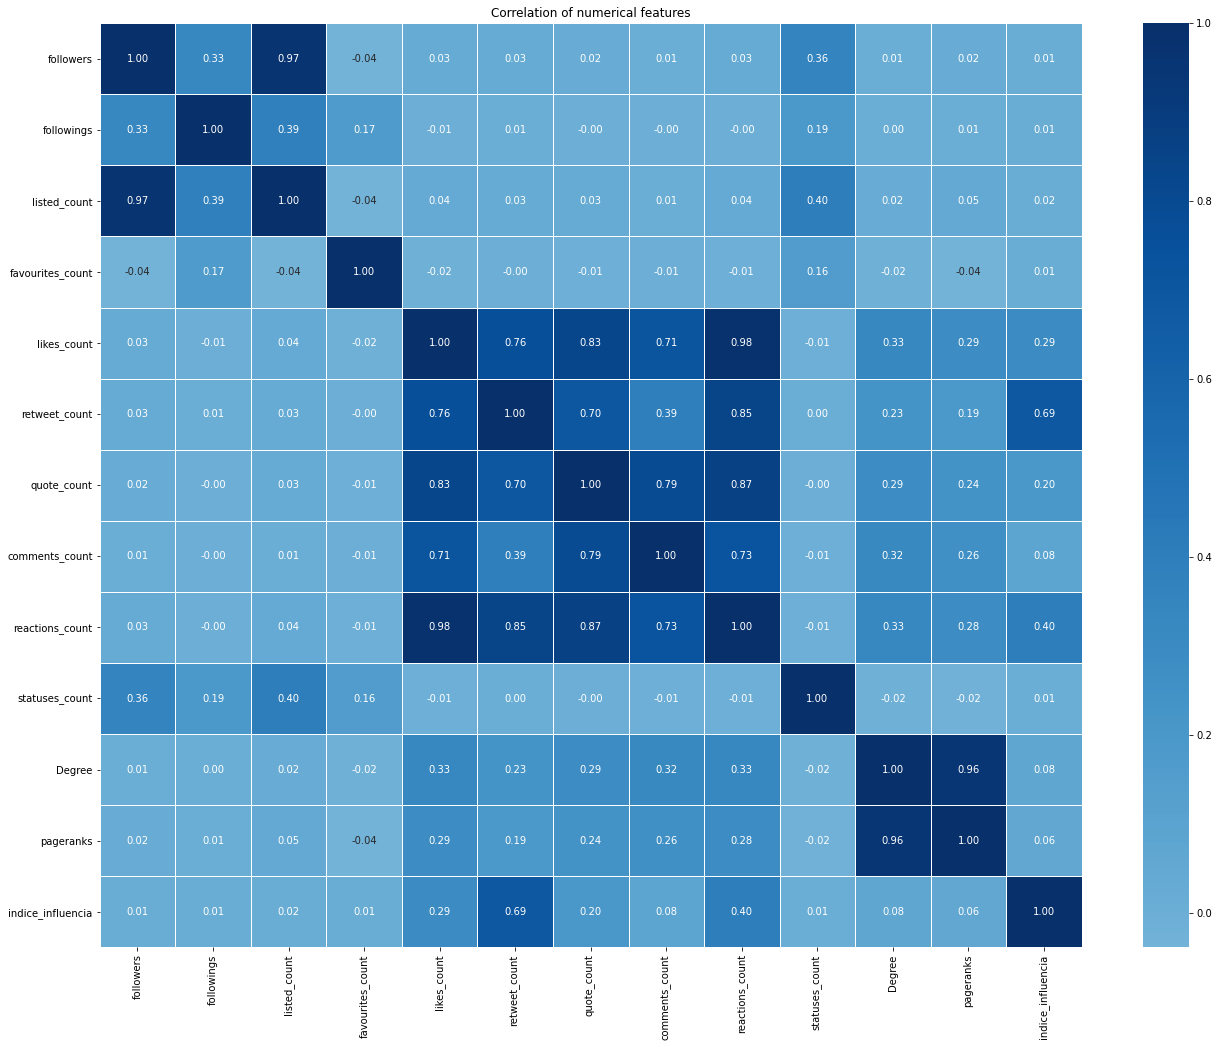

In [15]:
# Correlacion de las variables numericas
plt.figure(figsize=(22,17))
plt.title('Correlation of numerical features')
sns.heatmap(df__2[cols_num].corr(), annot=True, fmt='.2f', cmap='Blues',  center=0, linewidths=1)
plt.show()

- **Nota: las variable que presentan una mayor correlacion con la variable produccion es la superficie y tiene sentido ya que a mayor superficie de terreno deberia haber una mayor produccion.**

# 5. Definicion / Entrenamiento / Evaluacion de los modelos v2

## 5.1 Modelado experimental (Data 2) - v1
Variables: 

+ Predictoras
    - 'followers' 
    - 'followings' 
    - 'listed_count' 
    - 'favourites_count' 
    - 'likes_count' 
    - 'retweet_count' 
    - 'quote_count'
    - 'comments_count' 
    - 'reactions_count' 
    - 'statuses_count'
    - 'indegree' 
    - 'outdegree' 
    - 'Degree'
    - 'modularity_class'
    - 'Eccentricity' 
    - 'closnesscentrality',
    - 'harmonicclosnesscentrality'
    - 'betweenesscentrality'
    - 'eigencentrality'
    - 'Authority' 
    - 'Hub'
    - 'X'
    - 'Y'
    - 'Size'
    - 'pageranks'
+ Objetivo:
   -  'indice_influencia'

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

### 5.1.1 Separacion de variables predictoras y objetivo

In [113]:
df__2[['indice_influencia']].min()

indice_influencia    0.0
dtype: float64

In [114]:
# Realizamos la separación de la data para poder utilizarla en el modelado
## Para las "features", seleccionamos las siguientes del dataframe cargado
# X = df_2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count',
#      'indegree', 'outdegree', 'Degree','modularity_class', 'Eccentricity', 'closnesscentrality','harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
#        'Authority', 'Hub', 'X', 'Y', 'Size']]
X = df__2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks']]
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
y = df__2['indice_influencia']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    followers  followings  listed_count  favourites_count  likes_count  \
0      17771        4132           214               494           36   
1       1430        1773            10              8738            0   
2       2236        2418             6             21815            0   
3        130         100             1              1865            0   
4       2750        4957             9             34413            0   

   retweet_count  quote_count  comments_count  reactions_count  \
0             12            4               8               60   
1              0            0               0                0   
2              0            0               0                0   
3              0            0               0                0   
4              0            0               0                0   

   statuses_count  pageranks  
0           16772   0.005057  
1          140642   0.000044  
2           16662   0.000044  
3

### 5.1.2 Modelo Linear Regressor

In [115]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.17666107099894549
El RMSE para la data de entrenamiento: 0.14274391931028627
El RMSE para la data de prueba: 0.9685444239587602
CPU times: user 429 ms, sys: 1.09 s, total: 1.52 s
Wall time: 2.11 s


In [116]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  -0.17666107099894182
El RMSE para la data de entrenamiento: 0.14274391931028627
El RMSE para la data de prueba: 0.9685444239587616
CPU times: user 1.42 s, sys: 1.75 s, total: 3.17 s
Wall time: 966 ms


In [117]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.14274391931028627
El RMSE para la data de prueba: 0.9685444239587602


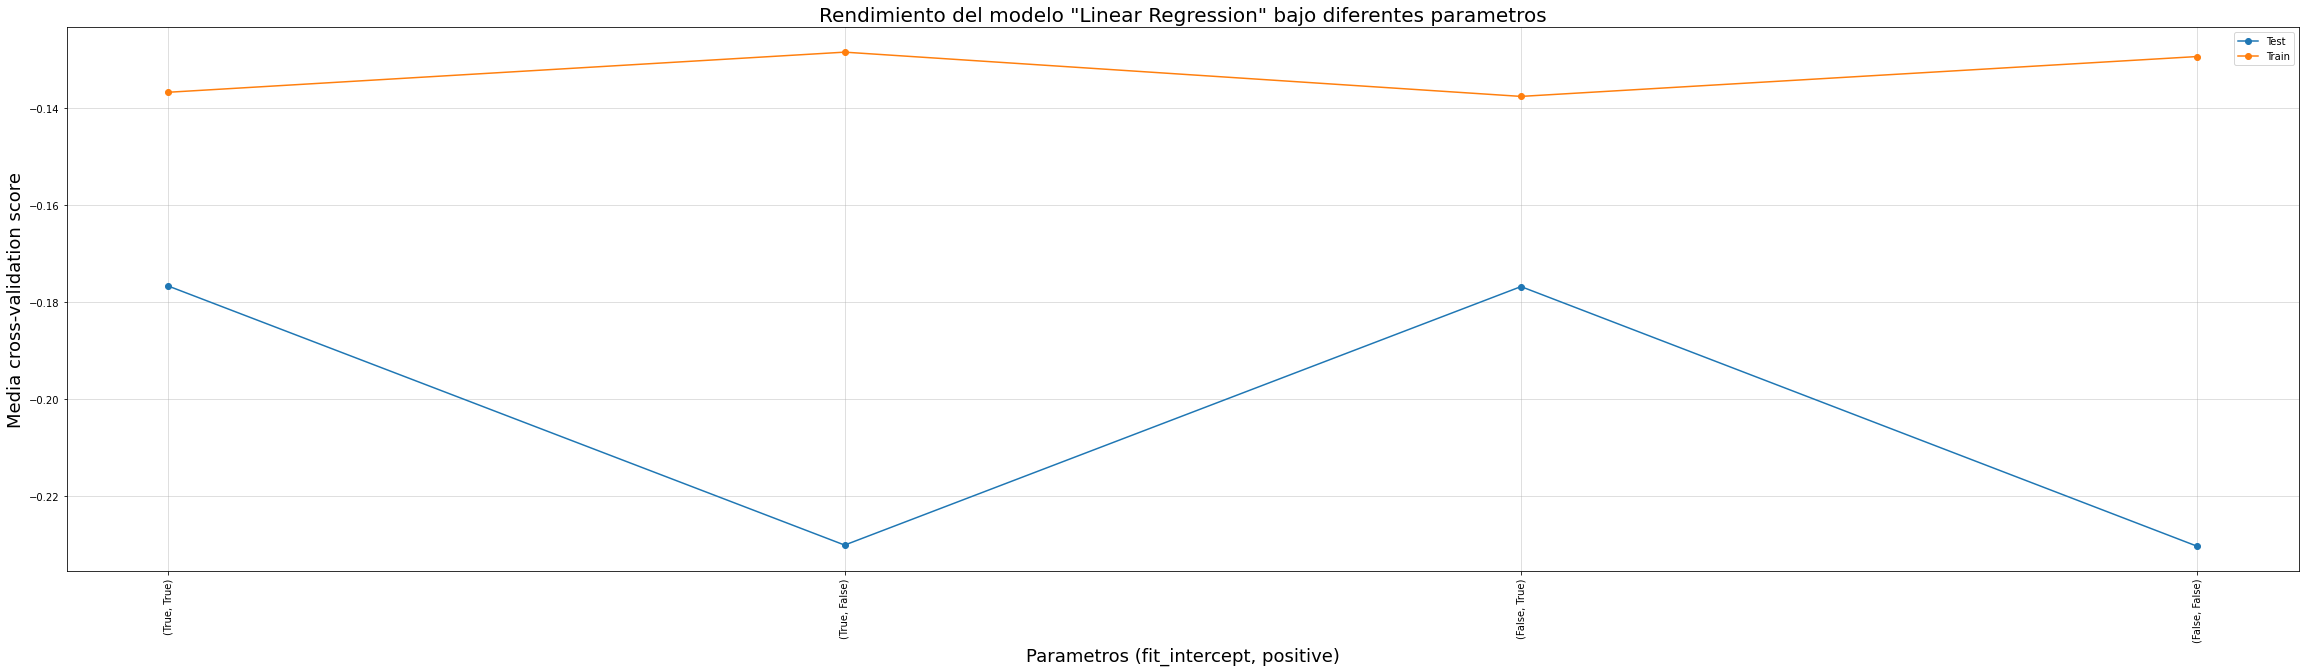

In [118]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [119]:
#predicciones
y_pred = lr.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4071,30,487,0,4764,2,0,0,0,2,1585,1.186264e-06,0.009476,0.009475
2163,4154,926,31,30958,0,0,0,0,0,108327,6.867846e-08,0.007527,0.007527
4625,310,1120,1,7024,1,0,0,0,1,5564,0.000000e+00,0.008343,0.008343
1601,164,1041,2,20036,0,0,0,0,0,4681,4.578564e-08,0.007141,0.007141
1206,3876,2207,27,37961,60,20,2,10,92,37687,1.458466e-01,0.152064,0.006217


In [120]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 43.77140742090576
Minima diferencia: 0.0004911927668162976


In [121]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
3736,59625,1792,210,110630,407,578,12,18,1015,267445,46.35306,2.581653,43.771407


In [122]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4644,27468,657,91,89965,3,1,0,0,4,22056,0.016038,0.015547,0.000491


### 5.1.3 Modelo RandomForestRegressor

In [123]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
#param_grid = {'n_estimators': [100, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1,2,3,4,5]}
param_grid = {'n_estimators': [100, 500, 1000], 'min_samples_leaf': [1,2,3,4,5]}
# Instanciamos el modelo knn
rf = RandomForestRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_1 = GridSearchCV(rf, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_1.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_1.best_params_)
print('El RMSE para el grid search cv: ', clf_1.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_1.predict(X_train), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_1.predict(X_test), squared=False))

Los mejores parametros fueron:  {'min_samples_leaf': 1, 'n_estimators': 100}
El RMSE para el grid search cv:  -0.0990211464935837
El RMSE para la data de entrenamiento: 0.03483042756262617
El RMSE para la data de prueba: 0.9653643666317827
CPU times: user 3.42 s, sys: 79 ms, total: 3.5 s
Wall time: 1min 3s


In [124]:
rf = RandomForestRegressor(**clf_1.best_params_)
rf.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, rf.predict(X_train), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, rf.predict(X_test), squared=False))

El RMSE para la data de entrenamiento: 0.0430894446382928
El RMSE para la data de prueba: 0.9798258859093398


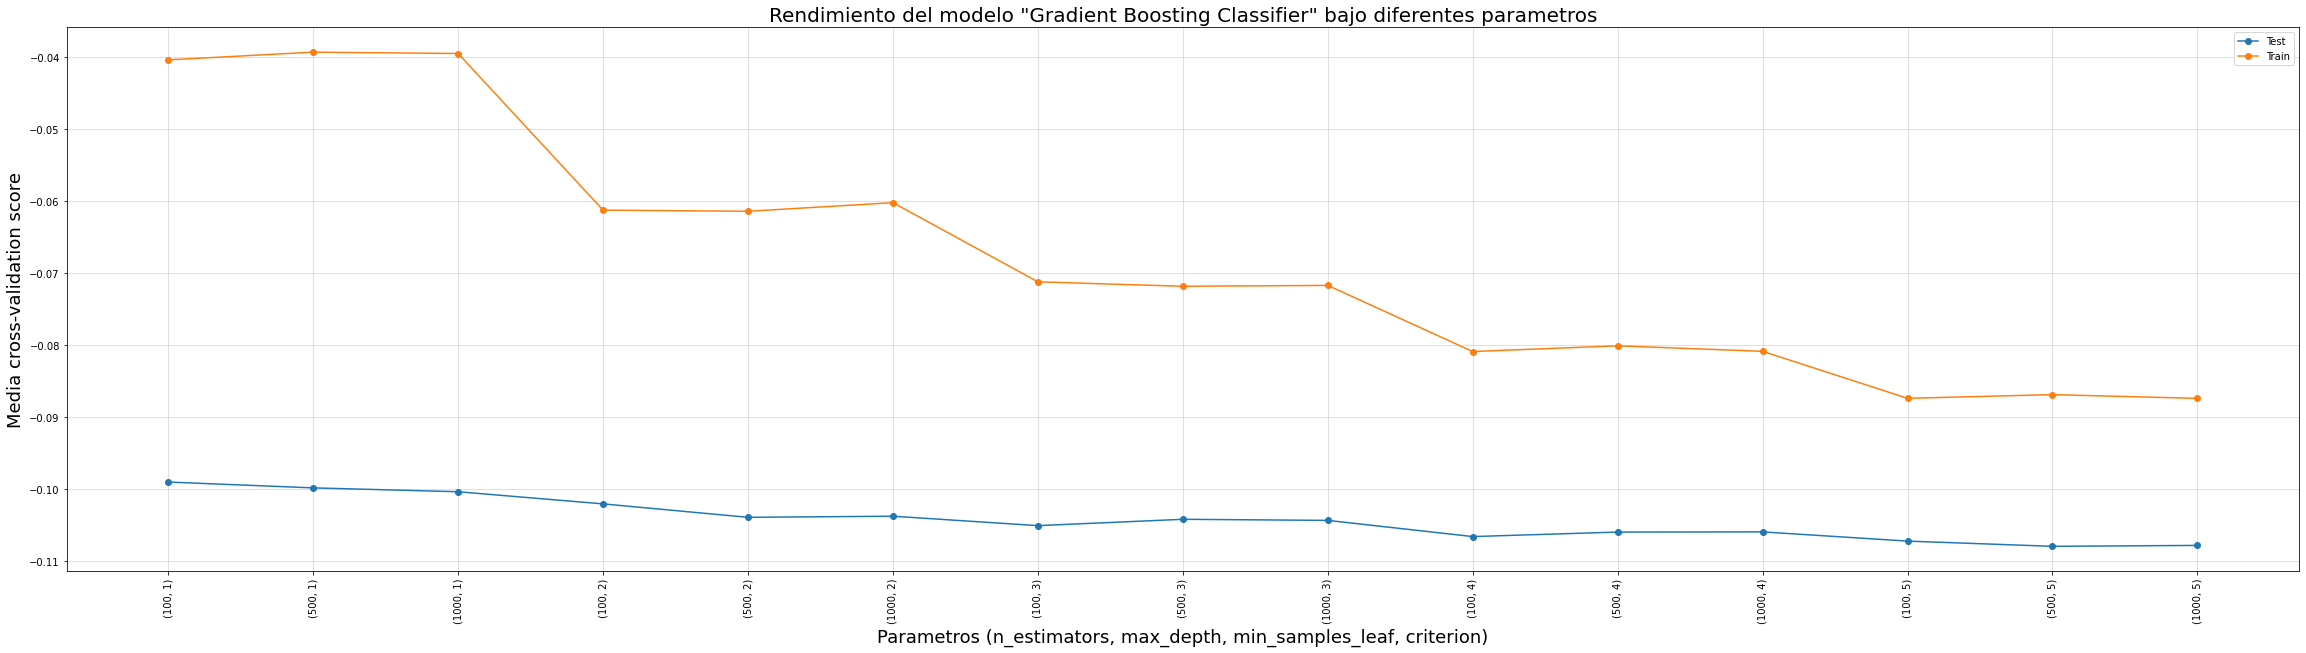

In [125]:
params = [(p['n_estimators'], p['min_samples_leaf']) for p in clf_1.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_1.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_1.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (n_estimators, max_depth, min_samples_leaf, criterion)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Gradient Boosting Classifier" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [126]:
#predicciones
y_pred = rf.predict(X_test)

In [127]:
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4071,30,487,0,4764,2,0,0,0,2,1585,1.186264e-06,1.454913e-06,2.686484e-07
2163,4154,926,31,30958,0,0,0,0,0,108327,6.867846e-08,5.697680e-08,1.170166e-08
4625,310,1120,1,7024,1,0,0,0,1,5564,0.000000e+00,3.062571e-08,3.062571e-08
1601,164,1041,2,20036,0,0,0,0,0,4681,4.578564e-08,4.952265e-08,3.737014e-09
1206,3876,2207,27,37961,60,20,2,10,92,37687,1.458466e-01,2.369341e-01,9.108747e-02


In [128]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 44.8157147741921
Minima diferencia: 0.0


In [129]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
3736,59625,1792,210,110630,407,578,12,18,1015,267445,46.35306,1.537345,44.815715


In [130]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
1317,577,432,2,51469,0,0,0,0,0,15530,0.000003,0.000003,0.0
5219,2855,66,19,879,0,0,0,0,0,1979,0.000008,0.000008,0.0
5835,2855,66,19,879,0,0,0,0,0,1979,0.000008,0.000008,0.0
6387,2855,66,19,879,0,0,1,0,1,1979,0.000008,0.000008,0.0
6385,2855,66,19,879,0,0,0,0,0,1979,0.000008,0.000008,0.0
5834,2855,66,19,879,0,0,0,0,0,1979,0.000008,0.000008,0.0
5828,2855,66,19,879,0,0,0,0,0,1979,0.000008,0.000008,0.0
311,577,432,2,51469,0,0,0,0,0,15530,0.000003,0.000003,0.0
6393,2855,66,19,879,1,0,0,0,1,1979,0.000008,0.000008,0.0
6391,2855,66,19,879,0,0,0,0,0,1979,0.000008,0.000008,0.0


In [131]:
df_eval__t1 = df__2[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks']]

In [132]:
y_pred__22 = clf_1.predict(df_eval__t1)

In [133]:
df__2['indice_influencia'] = y_pred__22

In [134]:
# df_eval.drop(columns = ['CAMPAÑA', 'ALTITUD'], inplace=True)
# # df_eval.drop(columns = ['ID_ZONA', 'ID_ESTACION'], inplace=True)

In [135]:
df__2.head(4)

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,X,Y,Size,indice_influencia
0,17771,4132,214,494,36,12,4,8,60,16772,...,0.269564,60835.171301,0.139298,0.005057,0.032597,0.001246,0.245088,0.400068,0.108221,5.177786e-02
1,1430,1773,10,8738,0,0,0,0,0,140642,...,0.235294,0.000000,0.000000,0.000044,0.000000,0.031260,0.717404,0.699044,0.001041,4.565753e-08
2,2236,2418,6,21815,0,0,0,0,0,16662,...,1.000000,0.000000,0.000000,0.000044,0.000000,0.002092,0.365421,0.452327,0.002081,4.783245e-08
3,130,100,1,1865,0,0,0,0,0,1309,...,1.000000,0.000000,0.000000,0.000044,0.000000,0.000004,0.063581,0.431104,0.002081,3.704372e-08


### 5.1.4 Modelo GradientBoostingRegressor

In [136]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'learning_rate': [0.01, 0.1, 0.5, 1], 'max_depth': [2, 3, 4, 5, 6, 7]}
# Instanciamos el modelo knn
gbc = GradientBoostingRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_2 = GridSearchCV(gbc, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_2.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_2.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_2.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_2.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_2.predict(X_test),squared=False))

Los mejores parametros fueron:  {'learning_rate': 0.1, 'max_depth': 4}
La mejor precisión con estos parametros fue:  -0.09517927087921992
El RMSE para la data de entrenamiento: 0.008629265367296036
El RMSE para la data de prueba: 0.9850318564262105
CPU times: user 1.46 s, sys: 37.4 ms, total: 1.49 s
Wall time: 6.54 s


In [137]:
gbc = GradientBoostingRegressor(**clf_2.best_params_)
gbc.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, gbc.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, gbc.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.008629265367296036
El RMSE para la data de prueba: 0.9838115754605947


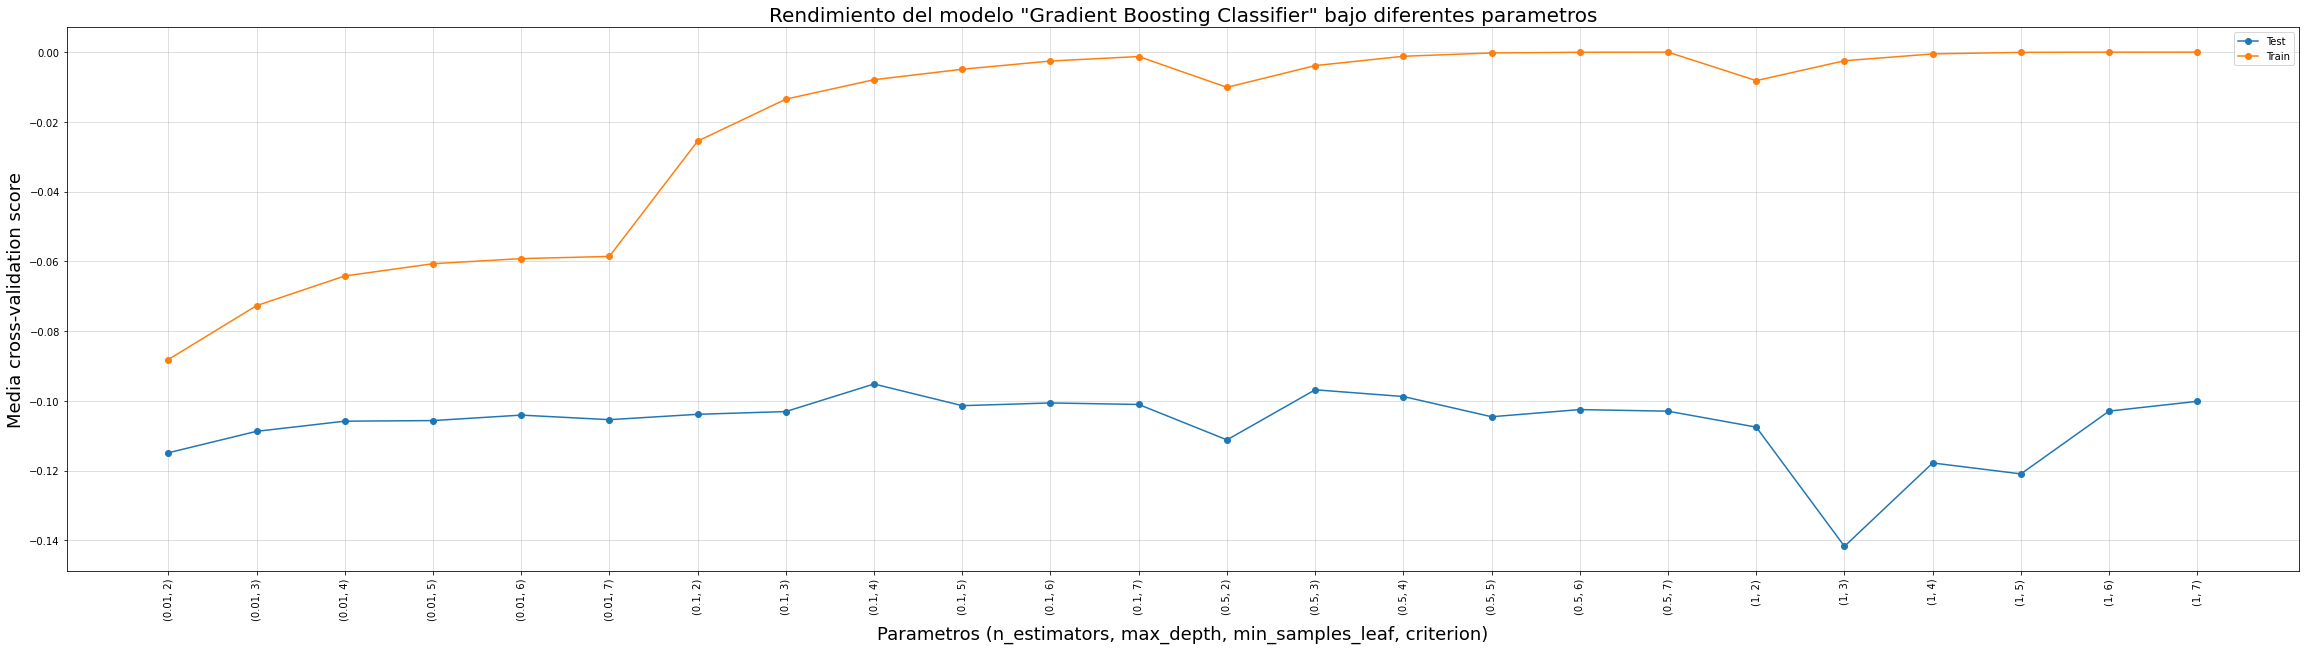

In [138]:
params = [(p['learning_rate'], p['max_depth']) for p in clf_2.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_2.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_2.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (n_estimators, max_depth, min_samples_leaf, criterion)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Gradient Boosting Classifier" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [139]:
#predicciones
y_pred = gbc.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4071,30,487,0,4764,2,0,0,0,2,1585,1.186264e-06,0.000099,0.000098
2163,4154,926,31,30958,0,0,0,0,0,108327,6.867846e-08,0.000050,0.000050
4625,310,1120,1,7024,1,0,0,0,1,5564,0.000000e+00,0.000062,0.000062
1601,164,1041,2,20036,0,0,0,0,0,4681,4.578564e-08,0.000062,0.000062
1206,3876,2207,27,37961,60,20,2,10,92,37687,1.458466e-01,0.233927,0.088081


In [140]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 45.12021191394035
Minima diferencia: 2.793129050372408e-06


In [141]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
3736,59625,1792,210,110630,407,578,12,18,1015,267445,46.35306,1.232848,45.120212


In [142]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
2306,299,321,2,3924,2,0,0,0,2,9369,0.000004,0.000007,0.000003
2687,299,321,2,3924,0,0,0,0,0,9369,0.000004,0.000007,0.000003
1094,299,321,2,3924,0,0,0,0,0,9369,0.000004,0.000007,0.000003


### 5.1.5 Modelo DecisionTreeRegressor

In [143]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1,2,3,4,5]}
# Instanciamos el modelo dt
dt = DecisionTreeRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf = GridSearchCV(dt, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf.best_params_)
print('La mejor precisión con estos parametros fue: ', clf.best_score_)

Los mejores parametros fueron:  {'max_depth': 7, 'min_samples_leaf': 2}
La mejor precisión con estos parametros fue:  -0.0912985070284081
CPU times: user 359 ms, sys: 63.5 ms, total: 423 ms
Wall time: 610 ms


In [144]:
dt = DecisionTreeRegressor(**clf.best_params_)
dt.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, dt.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, dt.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 0.049889916264047734
El RMSE para la data de prueba: 1.0181931109231153


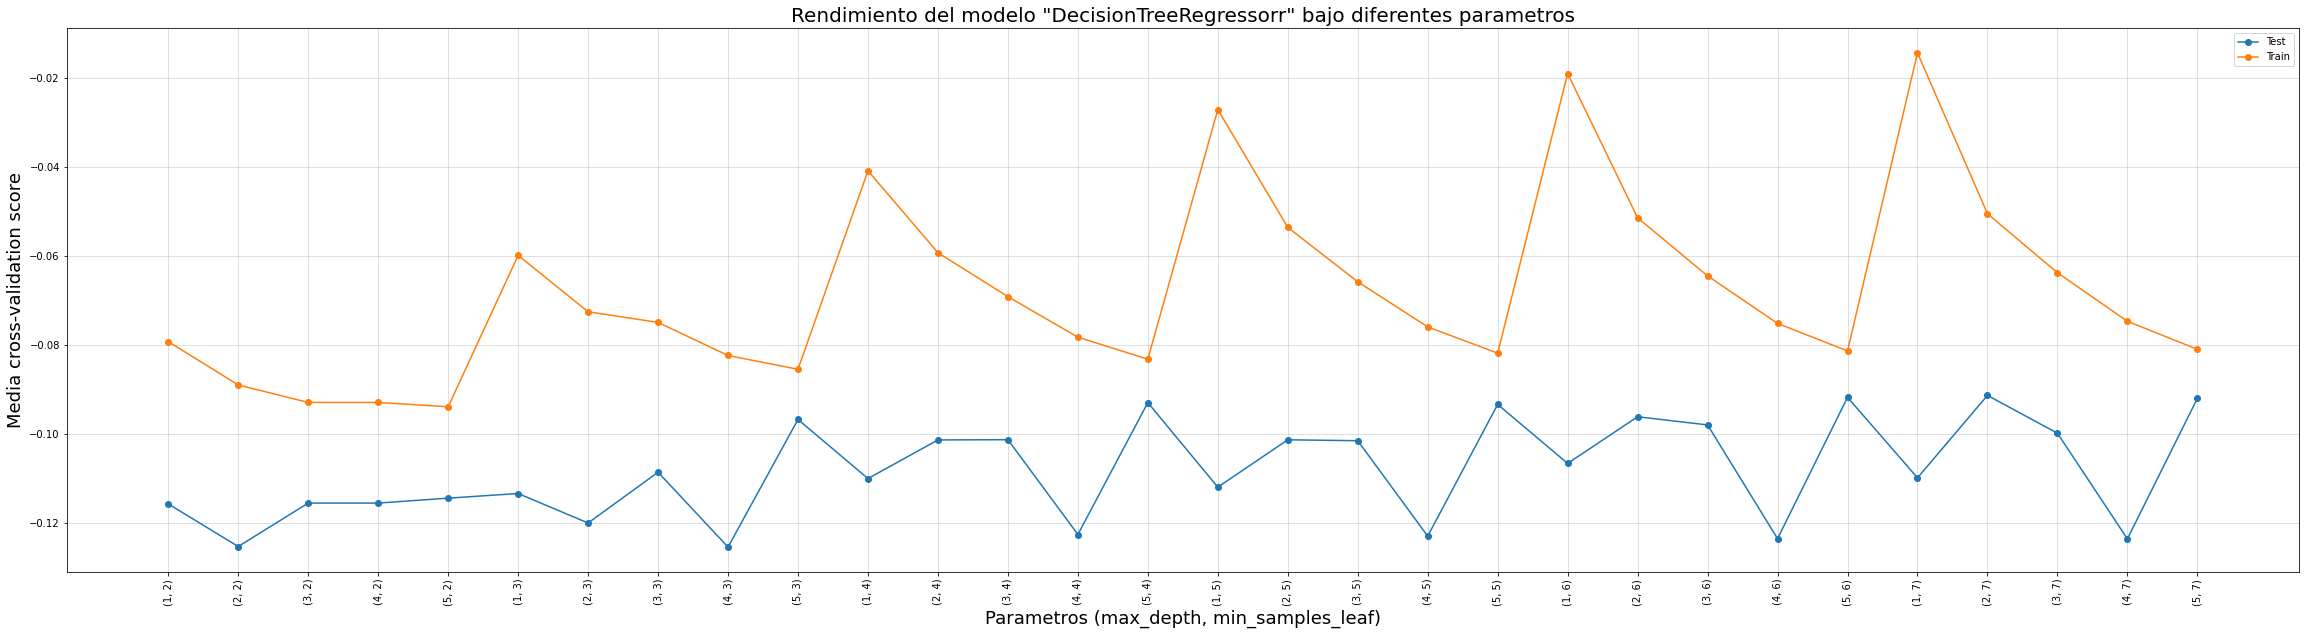

In [145]:
params = [(p['min_samples_leaf'], p['max_depth']) for p in clf.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (max_depth, min_samples_leaf)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "DecisionTreeRegressorr" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [146]:
#predicciones
y_pred = dt.predict(X_test)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4071,30,487,0,4764,2,0,0,0,2,1585,1.186264e-06,0.000001,2.408757e-07
2163,4154,926,31,30958,0,0,0,0,0,108327,6.867846e-08,0.000001,1.358462e-06
4625,310,1120,1,7024,1,0,0,0,1,5564,0.000000e+00,0.000001,1.427140e-06
1601,164,1041,2,20036,0,0,0,0,0,4681,4.578564e-08,0.000001,1.381354e-06
1206,3876,2207,27,37961,60,20,2,10,92,37687,1.458466e-01,0.220383,7.453658e-02


In [147]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 45.709747980819216
Minima diferencia: 0.0


In [148]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
3736,59625,1792,210,110630,407,578,12,18,1015,267445,46.35306,0.643312,45.709748


In [149]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
34,21151,614,62,25479,2,0,0,0,2,55133,0.016620,0.016620,0.0
4410,21105,614,62,25329,0,0,0,0,0,55079,0.016620,0.016620,0.0
5596,11752,1520,157,10654,0,0,0,3,3,51925,0.004256,0.004256,0.0
4474,11752,1520,157,10654,6,0,1,0,7,51925,0.004256,0.004256,0.0
3859,21150,614,62,25483,1,0,0,0,1,55133,0.016620,0.016620,0.0
36,21151,614,62,25479,1,0,0,0,1,55133,0.016620,0.016620,0.0
28,21151,614,62,25479,3,0,0,2,5,55133,0.016620,0.016620,0.0
5645,11752,1520,157,10654,0,0,0,1,1,51925,0.004256,0.004256,0.0
5903,11752,1520,157,10654,0,0,0,2,2,51925,0.004256,0.004256,0.0
5739,11752,1520,157,10654,0,0,0,1,1,51925,0.004256,0.004256,0.0


### 5.1.6 Modelo KNeighborsRegressor

In [150]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
param_grid = {'algorithm' : ['auto',  'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
# Instanciamos el modelo KNR sin escalamiento
knr = KNeighborsRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_3 = GridSearchCV(knr, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_3.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_3.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_3.best_score_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f2fa00b43a0>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

Los mejores parametros fueron:  {'algorithm': 'brute', 'n_neighbors': 17}
La mejor precisión con estos parametros fue:  -0.13330911581592528
CPU times: user 371 ms, sys: 122 ms, total: 493 ms
Wall time: 1.29 s


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ffadda603a0>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [151]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# param_grid = {'weights': ['uniform', 'distance'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
param_grid = {'algorithm' : ['auto',  'ball_tree', 'kd_tree', 'brute'], 'n_neighbors': [5, 7, 9, 13, 17, 21]}
# Normalizar las variables de entrada
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 
# Instanciamos el modelo KNR
knr = KNeighborsRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_3 = GridSearchCV(knr, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_3.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_3.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_3.best_score_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f704e9b93a0>
Traceback (most recent call last):
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo

Los mejores parametros fueron:  {'algorithm': 'auto', 'n_neighbors': 7}
La mejor precisión con estos parametros fue:  -0.11487884935048176
CPU times: user 461 ms, sys: 68 ms, total: 529 ms
Wall time: 1.43 s


In [152]:
knr = KNeighborsRegressor(**clf_3.best_params_)
knr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, knr.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, knr.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.10588759699748458
El RMSE para la data de prueba: 0.9873826757620991


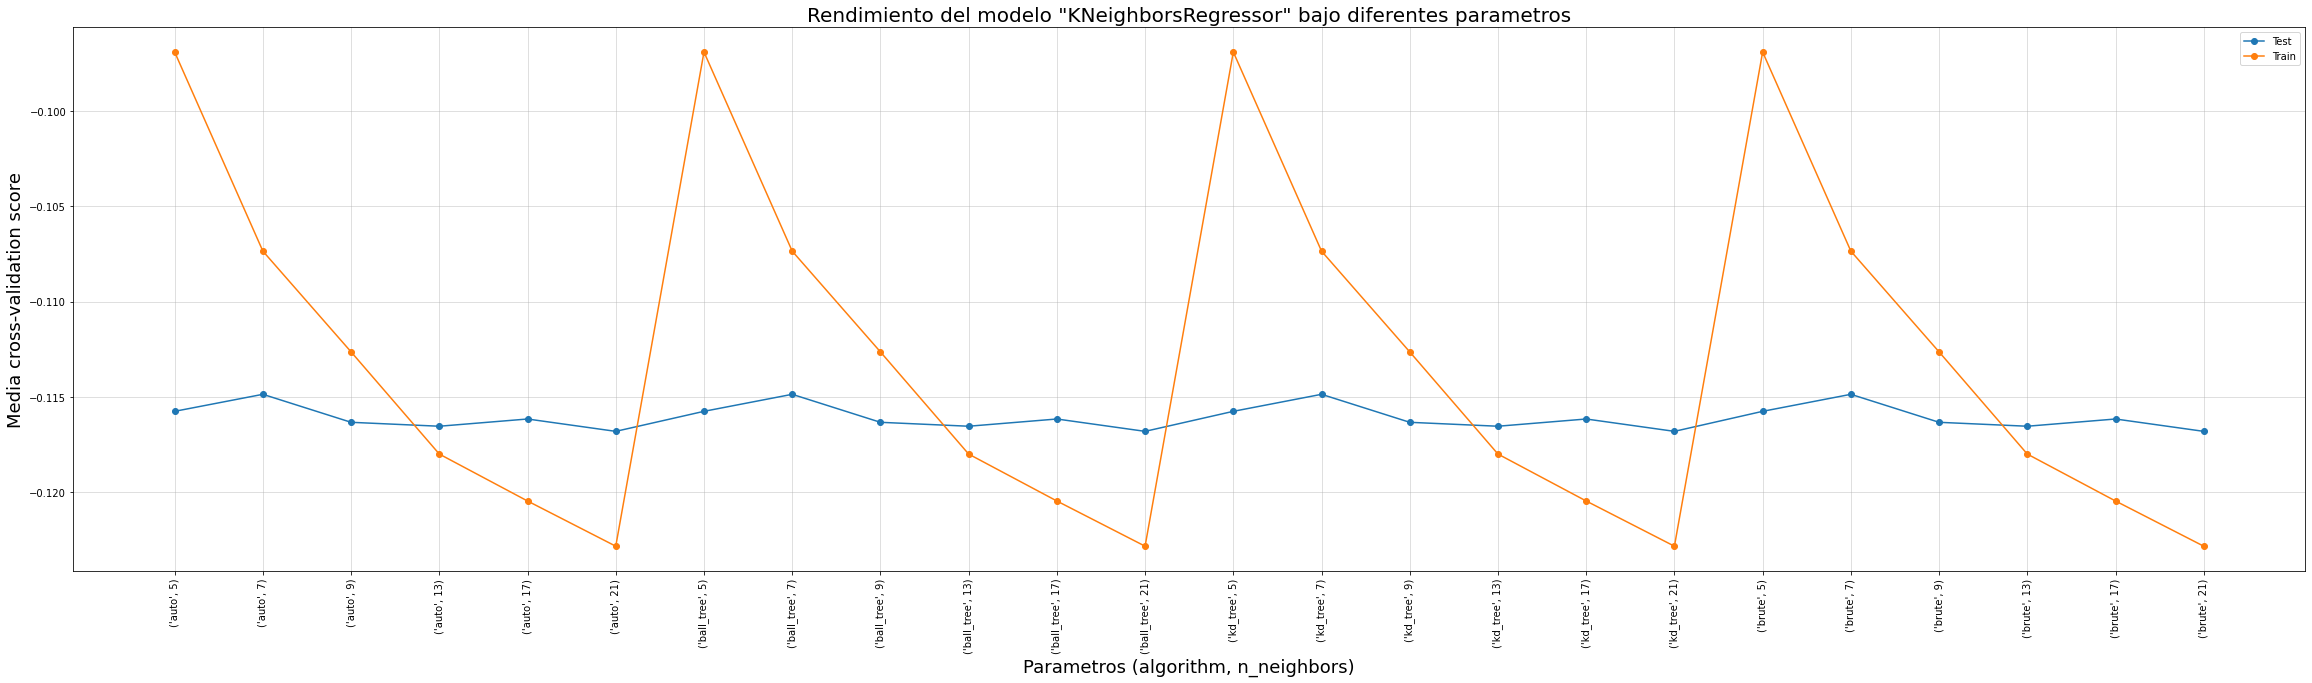

In [153]:
params = [(p['algorithm'], p['n_neighbors']) for p in clf_3.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_3.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_3.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (algorithm, n_neighbors)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "KNeighborsRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [154]:
#predicciones
y_pred = knr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
0,-0.110964,-0.303191,-0.138889,-0.373124,-0.032270,-0.075176,-0.069893,-0.07243,-0.051517,-0.318667,-0.060592,1.186264e-06,5.974060e-06,4.787795e-06
1,-0.091552,-0.148472,-0.091666,0.113732,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,0.101726,-0.203310,6.867846e-08,9.246321e-08,2.378475e-08
2,-0.109646,-0.080100,-0.137366,-0.331118,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.302996,-0.203310,0.000000e+00,3.924483e-08,3.924483e-08
3,-0.110333,-0.107942,-0.135842,-0.089270,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.306474,-0.203310,4.578564e-08,1.111937e-07,6.540806e-08
4,-0.092861,0.302997,-0.097759,0.243894,1.981740,1.887878,1.402625,1.59548,2.032897,-0.176483,0.233255,1.458466e-01,4.207787e-01,2.749321e-01


In [155]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 44.902268108940035
Minima diferencia: 0.0


In [156]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
550,0.169557,0.156736,0.181008,1.59456,14.03107,56.65708,8.765215,2.929808,23.409728,0.728397,4.054084,46.35306,1.450792,44.902268


In [157]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
39,-0.103814,0.127132,-0.108423,2.579572,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,2.030064,-0.203310,4.578564e-07,4.578564e-07,0.0
50,-0.110348,-0.382489,-0.138889,2.396402,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.249465,-0.203310,1.144641e-07,1.144641e-07,0.0
51,-0.110512,-0.340196,-0.138889,-0.376655,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.290752,-0.203310,1.831426e-07,1.831426e-07,0.0
55,0.415514,0.101757,0.548127,-0.457228,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,1.487474,-0.177805,2.154006e-07,2.154006e-07,0.0
60,-0.080170,2.030279,-0.079480,-0.458139,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,0.833628,-0.203310,4.578564e-08,4.578564e-08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-0.110809,-0.414913,-0.138889,1.075345,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.234913,-0.203310,1.831426e-07,1.831426e-07,0.0
2111,0.415514,0.101757,0.548127,-0.457228,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,1.487474,-0.177805,2.154006e-07,2.154006e-07,0.0
2112,-0.097667,-0.451566,-0.109946,-0.445333,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.317115,-0.009583,8.281998e-06,8.281998e-06,0.0
2119,-0.055858,0.060874,0.100272,-0.263426,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.120219,5.703753,4.256309e-03,4.256309e-03,0.0


### 5.1.7 Modelo Red Neural feedforward

In [158]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from keras import backend as K
from keras.callbacks import EarlyStopping

In [159]:
# Normalizar las variables de entrada
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=27)

In [160]:
# Cantidad de variables de entrada
X_scaled.shape

(7074, 11)

In [161]:
# Arquitectura de red neural
model = tf.keras.Sequential()
model.add(layers.Dense(128, input_shape=(11,), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compilar el modelo con la función de pérdida RMSE
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1536      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [162]:
early_stopping = EarlyStopping(monitor="val_loss", patience = 5)

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/50
155/155 [==============================] - 1s 3ms/step - loss: 0.1168 - mse: 0.1168 - val_loss: 0.9895 - val_mse: 0.9895
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.6555 - val_mse: 0.6555
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.4257 - val_mse: 0.4257
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.3809 - val_mse: 0.3809
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.5076 - val_mse: 0.5076
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.3040 - val_mse: 0.3040
Epoch 7/50
155/155 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.3409 - val_mse: 0.3409
Epoch 8/50
155/155 [==============================] - 0s 2ms/step - loss: 0.

In [163]:
# Evaluar el modelo en el conjunto de prueba
loss, mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print("Root Mean Squared Error en el conjunto de prueba: ", rmse)

67/67 [==============================] - 0s 1ms/step - loss: 0.4734 - mse: 0.4734
Root Mean Squared Error en el conjunto de prueba:  0.6880634339913831


In [164]:
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, model.predict(X_train_scaled), squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, model.predict(X_test_scaled), squared=False))

El RMSE para la data de entrenamiento: 0.12340184972667514
El RMSE para la data de prueba: 0.68806337226163


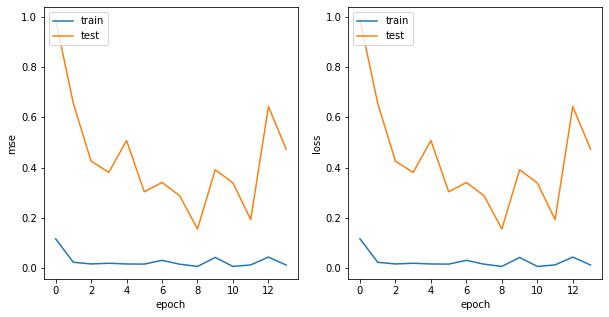

In [165]:
fig, ax= plt.subplots(1,2, figsize=(10,5))
ax[0].plot(history.history['mse'])
ax[0].plot(history.history['val_mse'])
ax[0].legend(['train', 'test'], loc='upper left')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('mse')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_mse'])
ax[1].legend(['train', 'test'], loc='upper left')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')

plt.show()

In [166]:
#predicciones
y_pred = model.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred.reshape(1,-1)[0]})
df_test = pd.DataFrame(X_test, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
4071,30,487,0,4764,2,0,0,0,2,1585,1.186264e-06,0.003334,0.003333
2163,4154,926,31,30958,0,0,0,0,0,108327,6.867846e-08,0.027183,0.027183
4625,310,1120,1,7024,1,0,0,0,1,5564,0.000000e+00,0.013434,0.013434
1601,164,1041,2,20036,0,0,0,0,0,4681,4.578564e-08,0.015073,0.015073
1206,3876,2207,27,37961,60,20,2,10,92,37687,1.458466e-01,0.056282,0.089565


In [167]:
y_pred.reshape(1,-1)[0]

array([0.00333415, 0.02718347, 0.01343369, ..., 0.01891145, 0.00922821,
       0.0142308 ], dtype=float32)

In [168]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 31.115419560583305
Minima diferencia: 1.8647179999535093e-05


In [169]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
3736,59625,1792,210,110630,407,578,12,18,1015,267445,46.35306,15.23764,31.11542


In [170]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,y_test,y_pred,diferencia
5713,92,175,8,487,0,0,0,2,2,33646,6.867846e-08,0.000019,0.000019


### 5.1.8 Modelo XGBRegressor

In [171]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
# Instanciamos el modelo XGBRegressor sin escalamiento
xgb = XGBRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_4 = GridSearchCV(xgb, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_4.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_4.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_4.best_score_)

Los mejores parametros fueron:  {'max_depth': 6, 'n_estimators': 200}
La mejor precisión con estos parametros fue:  -0.09952968978138169
CPU times: user 19.9 s, sys: 22.1 ms, total: 19.9 s
Wall time: 2.35 s


In [172]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}
# Normalizar las variables de entrada
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo XGBRegressor
xgb = XGBRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_4 = GridSearchCV(xgb, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_4.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_4.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_4.best_score_)

Los mejores parametros fueron:  {'max_depth': 6, 'n_estimators': 200}
La mejor precisión con estos parametros fue:  -0.0995229175679079
CPU times: user 16.7 s, sys: 47.7 ms, total: 16.8 s
Wall time: 1.68 s


In [173]:
xgb = XGBRegressor(**clf_4.best_params_)
xgb.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, xgb.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, xgb.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.0009902300780322564
El RMSE para la data de prueba: 0.9970002942683324


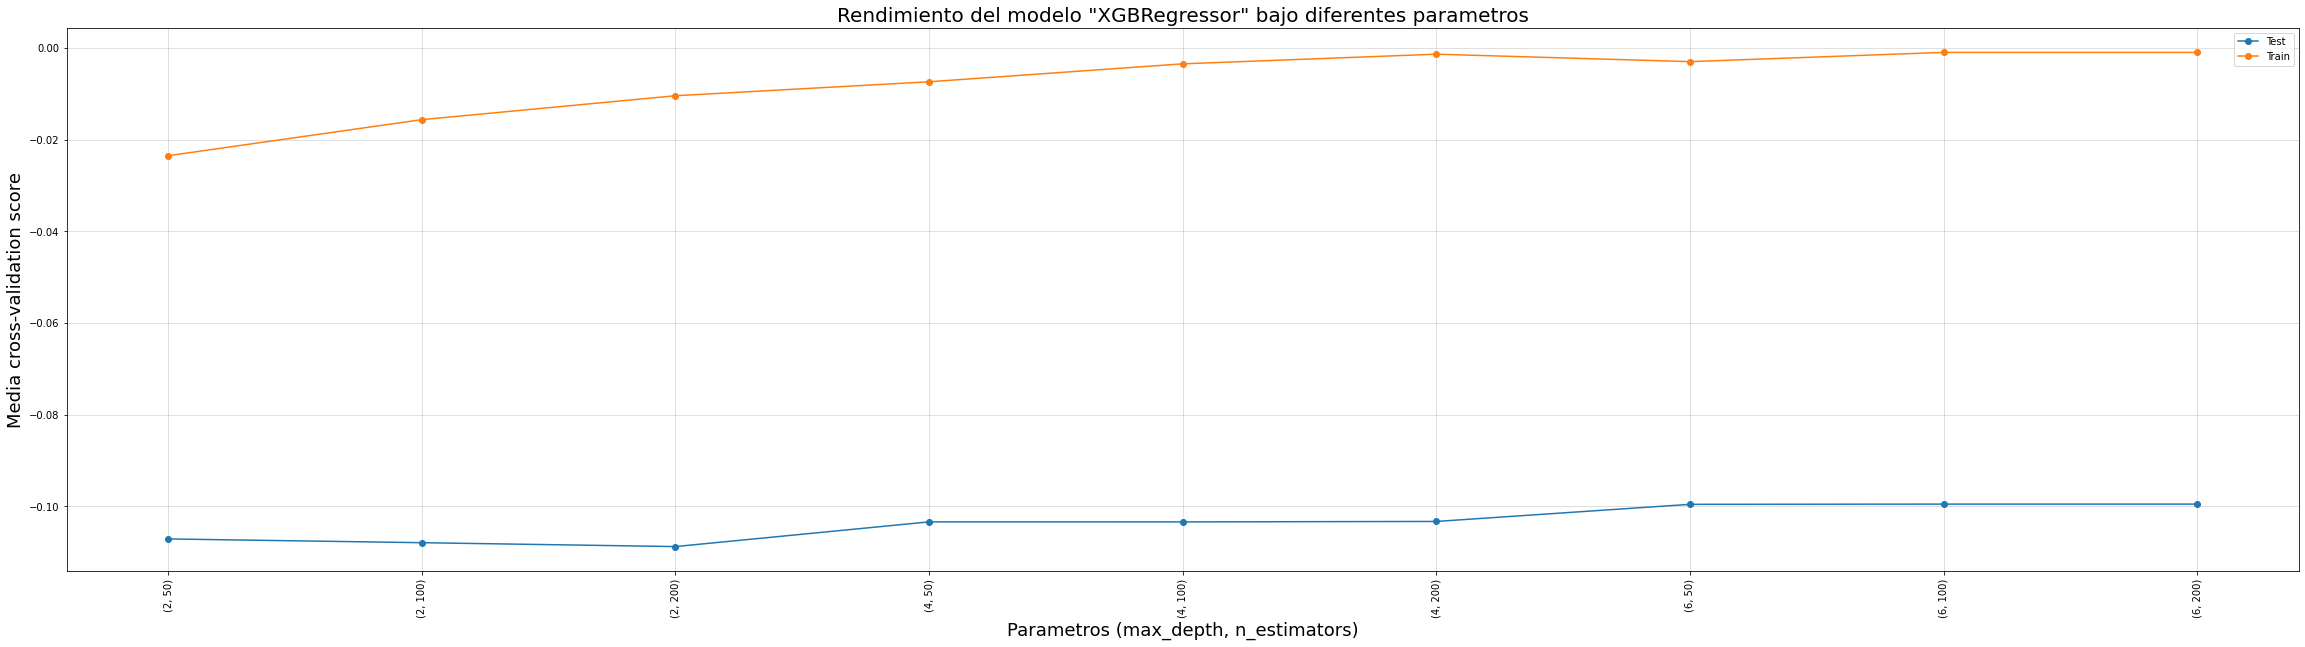

In [174]:
params = [(p['max_depth'], p['n_estimators']) for p in clf_4.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_4.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_4.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (max_depth, n_estimators)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "XGBRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [175]:
#predicciones
y_pred = xgb.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
0,-0.110964,-0.303191,-0.138889,-0.373124,-0.032270,-0.075176,-0.069893,-0.07243,-0.051517,-0.318667,-0.060592,1.186264e-06,-0.000076,0.000077
1,-0.091552,-0.148472,-0.091666,0.113732,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,0.101726,-0.203310,6.867846e-08,0.000049,0.000049
2,-0.109646,-0.080100,-0.137366,-0.331118,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.302996,-0.203310,0.000000e+00,-0.000004,0.000004
3,-0.110333,-0.107942,-0.135842,-0.089270,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.306474,-0.203310,4.578564e-08,0.000044,0.000044
4,-0.092861,0.302997,-0.097759,0.243894,1.981740,1.887878,1.402625,1.59548,2.032897,-0.176483,0.233255,1.458466e-01,0.184986,0.039140


In [176]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 45.73708938947506
Minima diferencia: 1.55466189983261e-08


In [177]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
550,0.169557,0.156736,0.181008,1.59456,14.03107,56.65708,8.765215,2.929808,23.409728,0.728397,4.054084,46.35306,0.615971,45.737089


In [178]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
77,-0.109528,-0.343721,-0.132796,-0.344668,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.281240,-0.20331,2.289282e-08,7.346201e-09,1.554662e-08
284,-0.109957,-0.173495,-0.138889,-0.340244,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.249174,-0.20331,2.289282e-08,7.346201e-09,1.554662e-08
1725,-0.110390,-0.255612,-0.137366,-0.359611,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.273186,-0.20331,2.289282e-08,7.346201e-09,1.554662e-08
1909,-0.110390,-0.255612,-0.137366,-0.359611,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.273186,-0.20331,2.289282e-08,7.346201e-09,1.554662e-08


### 5.1.9 Modelo LGBMRegressor

In [179]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# hyper_params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': ['l1','l2'],'learning_rate': 0.005, 'feature_fraction': 0.9,'bagging_fraction': 0.7,
#     'bagging_freq': 10,'verbose': 0,"max_depth": 8,"num_leaves": 128, "max_bin": 512,"num_iterations": 100000}
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
param_grid = {'metric': ['l1','l2'], 'learning_rate': [0.005, .03, 0.05, .07]}
# Instanciamos el modelo LGBMRegressor sin escalamiento
lgbm = lgb.LGBMRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_5 = GridSearchCV(lgbm, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_5.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_5.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_5.best_score_)

Los mejores parametros fueron:  {'learning_rate': 0.07, 'metric': 'l1'}
La mejor precisión con estos parametros fue:  -0.10967458721447905
CPU times: user 10.4 s, sys: 23.7 ms, total: 10.4 s
Wall time: 1.94 s


In [180]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
# hyper_params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': ['l1','l2'],'learning_rate': 0.005, 'feature_fraction': 0.9,'bagging_fraction': 0.7,
#     'bagging_freq': 10,'verbose': 0,"max_depth": 8,"num_leaves": 128, "max_bin": 512,"num_iterations": 100000}
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}
param_grid = {'metric': ['l1','l2'], 'learning_rate': [0.005, .03, 0.05, .07]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LGBMRegressor
lgbm = lgb.LGBMRegressor()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_5 = GridSearchCV(lgbm, param_grid,  scoring='neg_root_mean_squared_error', return_train_score=True, n_jobs=-1)
clf_5.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_5.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_5.best_score_)

Los mejores parametros fueron:  {'learning_rate': 0.07, 'metric': 'l1'}
La mejor precisión con estos parametros fue:  -0.11044155865198675
CPU times: user 10.8 s, sys: 0 ns, total: 10.8 s
Wall time: 935 ms


In [181]:
lgbm = lgb.LGBMRegressor(**clf_5.best_params_)
lgbm.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lgbm.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lgbm.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 0.08764895936174232
El RMSE para la data de prueba: 0.9911773161839856


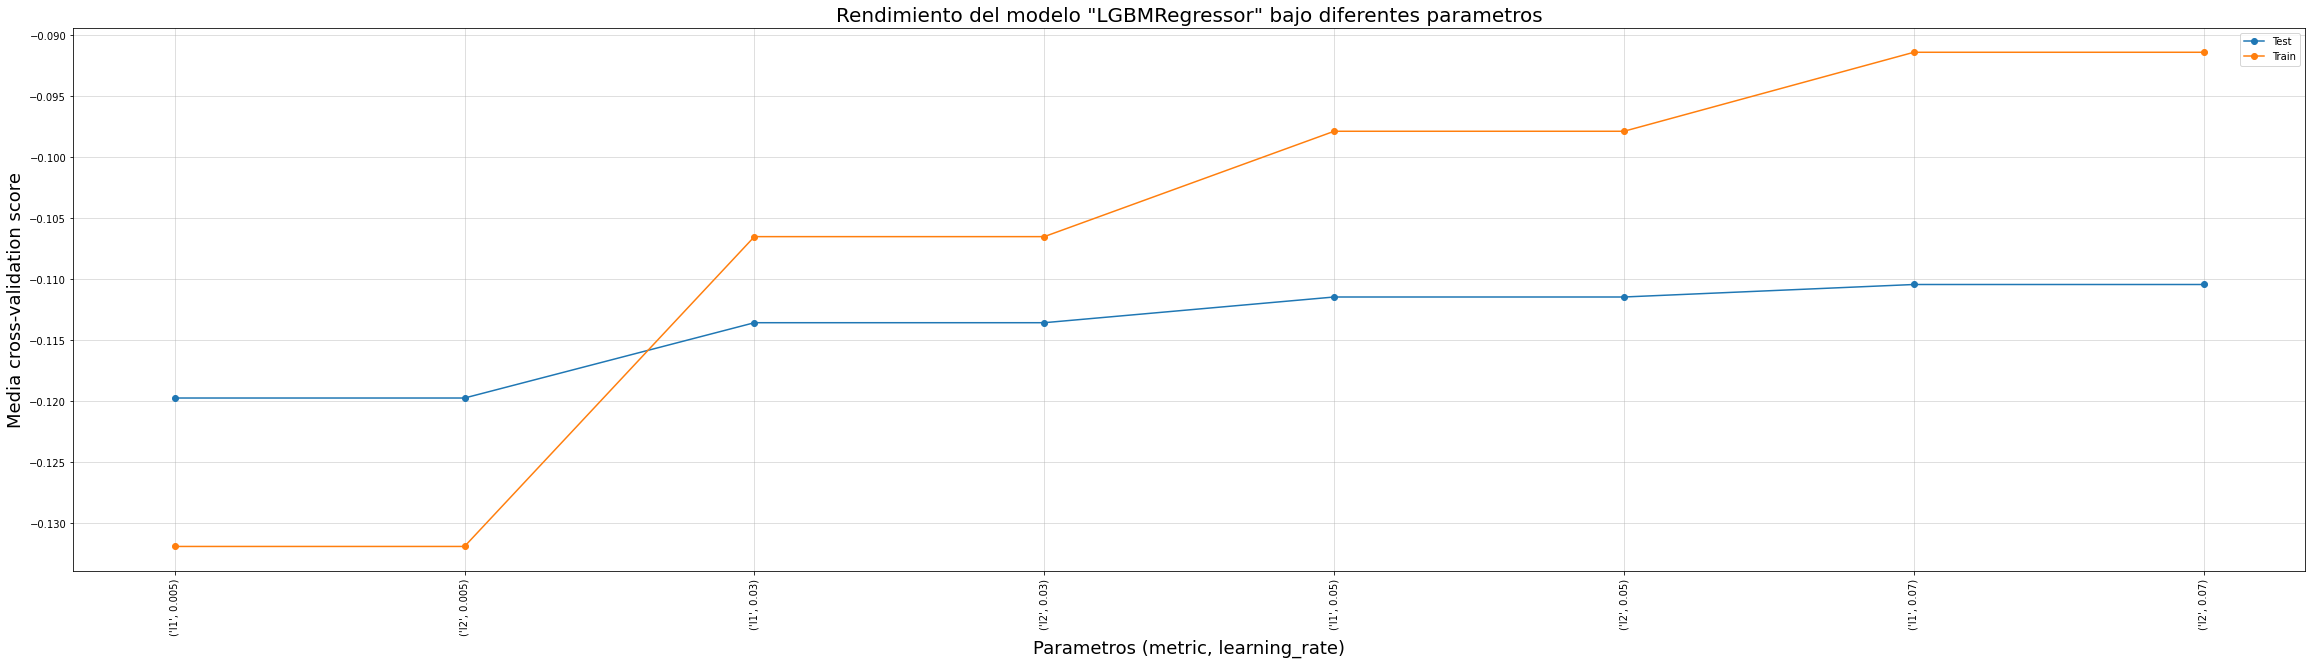

In [182]:
params = [(p['metric'], p['learning_rate']) for p in clf_5.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_5.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_5.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (metric, learning_rate)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "LGBMRegressor" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [183]:
#predicciones
y_pred = lgbm.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks'])
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict.head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
0,-0.110964,-0.303191,-0.138889,-0.373124,-0.032270,-0.075176,-0.069893,-0.07243,-0.051517,-0.318667,-0.060592,1.186264e-06,-0.000465,0.000467
1,-0.091552,-0.148472,-0.091666,0.113732,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,0.101726,-0.203310,6.867846e-08,-0.000035,0.000035
2,-0.109646,-0.080100,-0.137366,-0.331118,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.302996,-0.203310,0.000000e+00,-0.000003,0.000003
3,-0.110333,-0.107942,-0.135842,-0.089270,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.306474,-0.203310,4.578564e-08,-0.000003,0.000003
4,-0.092861,0.302997,-0.097759,0.243894,1.981740,1.887878,1.402625,1.59548,2.032897,-0.176483,0.233255,1.458466e-01,0.510356,0.364509


In [184]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 45.17479504233396
Minima diferencia: 9.688836192352673e-07


In [185]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
550,0.169557,0.156736,0.181008,1.59456,14.03107,56.65708,8.765215,2.929808,23.409728,0.728397,4.054084,46.35306,1.178265,45.174795


In [186]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks,y_test,y_pred,diferencia
709,-0.110959,-0.437468,-0.138889,-0.442024,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.320699,-0.182961,6.191467e-07,0.000002,9.688836e-07


/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/p

### 5.1.10 Feature Importance (Seleccion de Caracteristicas mas importantes) - Modelado experimental (Data 2) - v1

In [191]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Normalizar las variables de entrada
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=27)

# Arquitectura de red neuronal
model = tf.keras.Sequential()
model.add(layers.Dense(128, input_shape=(11,), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

# Compilar el modelo con la función de pérdida RMSE
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Resumen del modelo
model.summary()

early_stopping = EarlyStopping(monitor="val_loss", patience=5)

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1536      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
155/155 [==============================] - 1s 3ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 1.0307 - val_mse: 1.0307
Epoch 2/50
155/155 [==============================

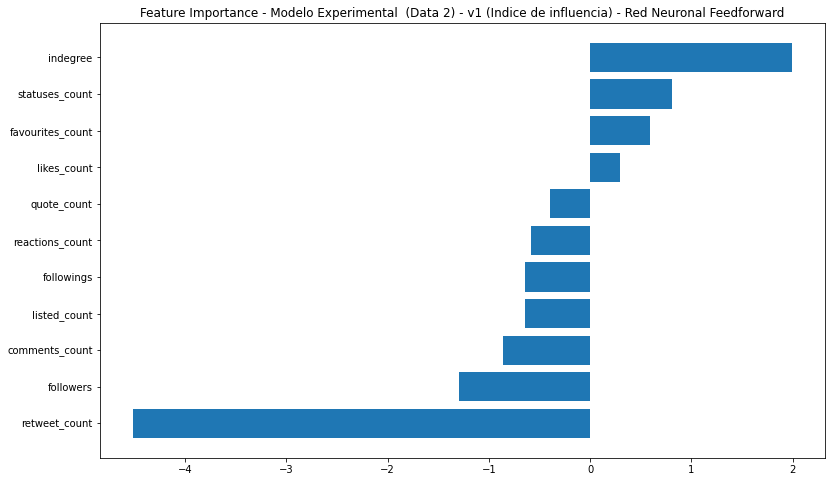

In [193]:
# Obtener las importancias de las características
importances = model.layers[0].get_weights()[0].sum(axis=1)  # Suma de los pesos de la primera capa

# Graficar la importancia de las características
sort = np.argsort(importances)
plt.figure(figsize=(13, 8))
plt.barh(df_2.columns[sort], importances[sort])
plt.title("Feature Importance - Modelo Experimental  (Data 2) - v1 (Indice de influencia) - Red Neuronal Feedforward")
plt.show()

- **Como podemos apreciar se obtuvo una importancia negativa para vairas característica de este modelo de red neuronal feedforward, lo que indica que esas características tiene una influencia negativa en la predicción del modelo. En otras palabras, a medida que el valor de esa característica aumenta, la predicción del modelo disminuye.**

- **En nuestro caso específico, el valor más negativo de -4 está asociado a la variable "retweet_count". Esto significa que, según el modelo de red neuronal, un aumento en el número de retweets está relacionado con una disminución en la predicción de la variable objetivo.**

- **Por otro lado, el valor más alto positivo de 2 está asociado a la variable "indegree". Esto indica que, según el modelo, un mayor valor en la variable "indegree" se relaciona con una mayor predicción de la variable objetivo.**

- **Es importante tener en cuenta que la interpretación de la importancia de las características en un modelo de red neuronal puede variar dependiendo de varios factores, como la escala de las características, la normalización de los datos y la elección de la función de activación. Es posible que sea necesario realizar más análisis y considerar otros factores para una interpretación más precisa de la importancia de las características en tu modelo específico.**

# 6. Prediciendo nuevos valores

In [240]:
# df_3 = X_test.sample(n=8,replace=True)
df__3 = df__2.sample(n=8,replace=True)
df__3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,...,harmonicclosnesscentrality,betweenesscentrality,eigencentrality,pageranks,Authority,Hub,X,Y,Size,indice_influencia
5445,631,1138,0,2663,0,0,0,0,0,40972,...,0.232021,2112.333333,0.001111,0.000047,0.001126,0.001609,0.689952,0.897914,0.012784,1.395981e-07
413,175,1030,0,6678,0,0,0,0,0,8311,...,1.000000,0.000000,0.000000,0.000044,0.000000,0.000034,0.086834,0.299579,0.002081,4.617543e-08
6564,96,651,0,6247,1,1,0,0,2,6818,...,0.236604,2.000000,0.000896,0.000047,0.000041,0.001649,0.487891,0.770582,0.004162,4.252820e-02
1798,91,719,0,45361,0,0,0,0,0,6870,...,0.300582,0.000000,0.000000,0.000044,0.000000,0.036857,0.295652,0.604030,0.006243,1.377303e-07
6579,3876,2206,27,37960,43,4,0,1,48,37686,...,0.000000,0.000000,0.055921,0.001653,0.011949,0.000000,0.301056,0.347440,0.059313,3.232715e-02
6739,1682,4986,7,19466,0,0,0,0,0,45571,...,0.322271,0.000000,0.000000,0.000044,0.000000,0.040400,0.439077,0.636499,0.011446,2.518210e-07
2565,4,91,1,27,2,0,0,0,2,467,...,0.235294,0.000000,0.000000,0.000044,0.000000,0.031260,0.548108,0.584373,0.001041,5.145301e-08
2874,227,1614,0,42168,0,0,0,0,0,32032,...,0.417220,925.406002,0.004731,0.000082,0.002163,0.049748,0.395399,0.926408,0.070314,1.407913e-06


In [241]:
df__3.columns

Index(['followers', 'followings', 'listed_count', 'favourites_count',
       'likes_count', 'retweet_count', 'quote_count', 'comments_count',
       'reactions_count', 'statuses_count', 'indegree', 'outdegree', 'Degree',
       'modularity_class', 'Eccentricity', 'closnesscentrality',
       'harmonicclosnesscentrality', 'betweenesscentrality', 'eigencentrality',
       'pageranks', 'Authority', 'Hub', 'X', 'Y', 'Size', 'indice_influencia'],
      dtype='object')

In [242]:
# 1. Asegurarse de tener las mismas columnas en df_3 que en X
df__3 = df__3[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks']]
df__3

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks
5445,631,1138,0,2663,0,0,0,0,0,40972,0.000047
413,175,1030,0,6678,0,0,0,0,0,8311,0.000044
6564,96,651,0,6247,1,1,0,0,2,6818,0.000047
1798,91,719,0,45361,0,0,0,0,0,6870,0.000044
6579,3876,2206,27,37960,43,4,0,1,48,37686,0.001653
6739,1682,4986,7,19466,0,0,0,0,0,45571,0.000044
2565,4,91,1,27,2,0,0,0,2,467,0.000044
2874,227,1614,0,42168,0,0,0,0,0,32032,0.000082


In [245]:
X__new = df__3.loc[2565].values.reshape(1,-1)

In [246]:
# 2. Hacer predicciones en df_3 con el modelo entrenado
y__pred = lr.predict(X__new)
y__pred

array([0.00945177])

In [247]:
df__2.loc[2565][['indice_influencia']]

indice_influencia    5.145301e-08
Name: 2565, dtype: float64

/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/gabrielarcangelbol/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


# 7. Definicion / Entrenamiento / Evaluacion de los modelos v3 - Contenido

In [4]:
# Convertir datos almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
df_4_bow = extract_mongo(client, database, 't_fvf_progephi_nlp_bag_of_words')
df_4_bow.shape

Los datos de la coleccion t_fvf_progephi_nlp_bag_of_words de la base de datos GNN fueron extraidos satisfactoriamente!


(7074, 8403)

In [24]:
df_4_bow[['Degree','pageranks']].sort_values(['pageranks'], ascending=False)

,Degree,pageranks
391,961.0,0.033240
6664,961.0,0.033240
646,961.0,0.033240
528,961.0,0.033240
4729,961.0,0.033240
...,...,...
3259,0.0,0.000044
3256,5.0,0.000044
362,1.0,0.000044
3254,11.0,0.000044


In [31]:
(df_4_bow[['pageranks']]*100000).sort_values(['pageranks'], ascending=False)

,pageranks
391,3324.0
6664,3324.0
646,3324.0
528,3324.0
4729,3324.0
...,...
3259,4.4
3256,4.4
362,4.4
3254,4.4


In [33]:
(df_4_bow[['pageranks']]*100000).max()

pageranks    3324.0
dtype: float64

In [32]:
(df_4_bow[['pageranks']]*100000).min()

pageranks    4.4
dtype: float64

In [70]:
# Escala al 100% (* 100)
df_4_bow[['pageranks_desnormalizado']] = df_4_bow[['pageranks']]*100
df_4_bow[['pageranks_desnormalizado']] 

,pageranks_desnormalizado
0,0.5057
1,0.0044
2,0.0044
3,0.0044
4,0.0049
...,...
7069,0.0044
7070,0.0044
7071,0.0044
7072,0.0044


In [71]:
# Indice de influencia normalizado
df_4_bow['indice_influencia_norm'] = ((df_4_bow['retweet_count_norm'] / df_4_bow['count_user_norm']) * 0.50) + ((df_4_bow['Degree_norm'] * df_4_bow['pageranks']) * 0.50)
df_4_bow.shape

(7074, 8405)

In [72]:
df_4_bow['indice_influencia_norm'].max()

46.35305994144268

In [73]:
df_4_bow['indice_influencia_norm'].mean()

0.021629282957536296

In [74]:
df_4_bow['indice_influencia_norm'].min()

0.0

In [75]:
# Indice de influencia desnormalizado
df_4_bow['indice_influencia'] = ((df_4_bow['retweet_count'] / df_4_bow['count_user']) * 0.50) + ((df_4_bow['Degree'] * df_4_bow['pageranks_desnormalizado']) * 0.50)
df_4_bow.shape

(7074, 8405)

In [76]:
df_4_bow['indice_influencia'].max()

1603.8522127659576

In [77]:
df_4_bow['indice_influencia'].mean()

17.930138762879125

In [78]:
df_4_bow['indice_influencia'].min()

0.0

In [107]:
# Escala al 100.000% (* 100.000) Para que el valor minimo sea superior a 1
df_4_bow[['pageranks_desnormalizado_2']] = df_4_bow[['pageranks']]*100000
df_4_bow[['pageranks_desnormalizado_2']] 

,pageranks_desnormalizado_2
0,505.7
1,4.4
2,4.4
3,4.4
4,4.9
...,...
7069,4.4
7070,4.4
7071,4.4
7072,4.4


In [113]:
(df_4_bow['retweet_count'] / df_4_bow['count_user'] * 0.5).max()

144.5

In [114]:
((df_4_bow['Degree'] * df_4_bow['pageranks_desnormalizado_2']) * 0.50).max()

1597182.0

In [123]:
(df_4_bow['Degree']  * df_4_bow['pageranks_desnormalizado_2'])*0.50

0       26296.40
1           2.20
2           4.40
3           4.40
4           7.35
          ...   
7069        4.40
7070        8.80
7071        4.40
7072        4.40
7073     1514.70
Length: 7074, dtype: float64

In [132]:
# Indice de influencia desnormalizado version 2
df_4_bow['indice_influencia_2'] = ((df_4_bow['retweet_count'] / df_4_bow['count_user']) * 0.50) + ((df_4_bow['Degree'] * df_4_bow['pageranks_desnormalizado_2']) * 0.50)
df_4_bow.shape

(7074, 8407)

In [133]:
df_4_bow['indice_influencia_2'].max()

1597188.670212766

In [134]:
df_4_bow['indice_influencia_2'].mean()

17849.17034830537

In [135]:
df_4_bow['indice_influencia_2'].mode()

0    4.4
Name: indice_influencia_2, dtype: float64

In [136]:
df_4_bow['indice_influencia_2'].min()

0.0

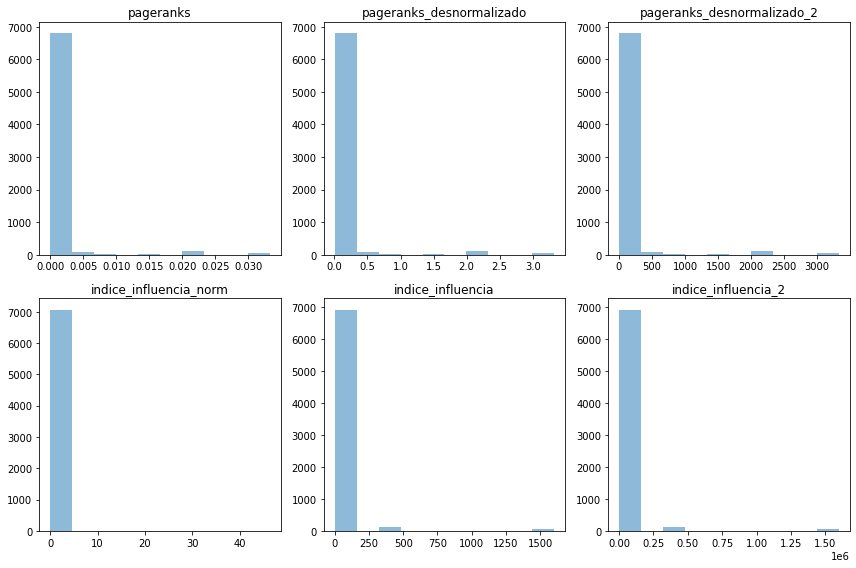

In [131]:
import matplotlib.pyplot as plt

# Variables
variables = ['pageranks', 'pageranks_desnormalizado', 'pageranks_desnormalizado_2',
             'indice_influencia_norm', 'indice_influencia', 'indice_influencia_2']

# Crear una figura y ejes con 2 filas y 3 columnas de subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Iterar sobre las variables y los subplots
for i, variable in enumerate(variables):
    # Obtener las coordenadas del subplot correspondiente
    row = i // 3
    col = i % 3
    
    # Graficar el histograma en el subplot correspondiente
    axs[row, col].hist(df_4_bow[variable], bins=10, alpha=0.5)
    axs[row, col].set_title(variable)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



## 7.1 Modelado experimental (Data 2) - vEscalada 100%: pageranks_desnormalizado / indice_influencia y vEscalada 100.000% pageranks_desnormalizado_2 / indice_influencia_2
Variables: 
Se incluyo el mensaje limpio aplicando la tecnica Bag Of Words
+ Predictoras:
    -  Columnas de Bow 
    - 'followers' 
    - 'followings' 
    - 'listed_count' 
    - 'favourites_count' 
    - 'likes_count' 
    - 'retweet_count' 
    - 'quote_count'
    - 'comments_count' 
    - 'reactions_count' 
    - 'statuses_count'
    - 'indegree' 
    - 'outdegree' 
    - 'Degree'
    - 'modularity_class'
    - 'Eccentricity' 
    - 'closnesscentrality',
    - 'harmonicclosnesscentrality'
    - 'betweenesscentrality'
    - 'eigencentrality'
    - 'Authority' 
    - 'Hub'
    - 'X'
    - 'Y'
    - 'Size'
    - 'pageranks_desnormalizado'
+ Objetivo:
   -  'indice_influencia' / 'indice_influencia_2'

In [257]:
# df_5_bow = df_4_bow[['message_clean','followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks', 'indice_influencia']]
df_5_bow = df_4_bow[['message_clean','followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'count_user', 'statuses_count', 'Degree', 'pageranks_desnormalizado', 'indice_influencia']]
# df_5_bow = df_4_bow[['message_clean','followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks_desnormalizado_2', 'indice_influencia_2']]
df_5_bow.shape

(7074, 15)

In [258]:
df_5_bow[['indice_influencia']].value_counts()

indice_influencia
0.004400             1312
0.002200              957
0.006600              660
0.008800              327
0.000000              212
                     ... 
0.349333                1
0.345233                1
0.337383                1
0.335527                1
1603.852213             1
Length: 770, dtype: int64

In [259]:
df_5_bow['indice_influencia'].max()

1603.8522127659576

In [260]:
df_5_bow['indice_influencia'].mean()

17.930138762879125

In [261]:
df_5_bow['indice_influencia'].min()

0.0

In [145]:
df_5_bow[['indice_influencia_2']].value_counts()

indice_influencia_2
4.400000e+00           1312
2.200000e+00            957
6.600000e+00            660
8.800000e+00            327
0.000000e+00            212
                       ... 
1.955833e+02              1
1.107143e+01              1
1.922333e+02              1
1.920667e+02              1
1.597189e+06              1
Length: 765, dtype: int64

In [146]:
df_5_bow['indice_influencia_2'].max()

1597188.670212766

In [147]:
df_5_bow['indice_influencia_2'].mean()

17849.17034830537

In [148]:
df_5_bow['indice_influencia_2'].min()

0.0

## 7.2 Bolsa de palabras (Bag of Words)

Esta técnica implica representar cada texto como un vector que cuenta la frecuencia de aparición de cada palabra. Puedes utilizar la clase CountVectorizer de la librería Scikit-learn para realizar esta transformación.

In [262]:
from sklearn.feature_extraction.text import CountVectorizer
# Columnas del texto
text_columns = ['message_clean']

# Columnas numéricas
# numeric_columns = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
#                    'retweet_count', 'quote_count', 'comments_count', 'reactions_count',
#                    'statuses_count', 'pageranks']
# Version escalada al 100%
numeric_columns = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
                   'retweet_count', 'quote_count', 'comments_count', 'reactions_count', 'count_user',
                   'statuses_count', 'Degree', 'pageranks_desnormalizado']
# Version escalada al 100.000%
# numeric_columns = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
#                    'retweet_count', 'quote_count', 'comments_count', 'reactions_count',
#                    'statuses_count', 'pageranks_desnormalizado_2']

# Aplicar CountVectorizer a las columnas de texto
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(df_5_bow['message_clean']).toarray()
text_feature_names = vectorizer.get_feature_names()

# Crear un dataframe con las características de texto
text_df = pd.DataFrame(text_features, columns=text_feature_names)

# Obtener las columnas numéricas
numeric_df = df_5_bow[numeric_columns]

### 7.2.1 Separacion de variables predictoras y objetivo

In [263]:
# Concatenar las características de texto y las columnas numéricas
X = pd.concat([text_df, numeric_df], axis=1)
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
# Version escalada al 100%
y = df_5_bow['indice_influencia']
# Version escalada al 100.000%
# y = df_5_bow['indice_influencia_2']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    00  000001  01  0102  0105  02  0200  02043  0300  04  ...  \
0   0       0   0     0     0   0     0      0     0   0  ...   
1   0       0   0     0     0   0     0      0     0   0  ...   
2   0       0   0     0     0   0     0      0     0   0  ...   
3   0       0   0     0     0   0     0      0     0   0  ...   
4   0       0   0     0     0   0     0      0     0   0  ...   

   favourites_count  likes_count  retweet_count  quote_count  comments_count  \
0               494           36             12            4               8   
1              8738            0              0            0               0   
2             21815            0              0            0               0   
3              1865            0              0            0               0   
4             34413            0              0            0               0   

   reactions_count  count_user  statuses_count  Degree  \
0               60          64 

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

In [265]:
X_train

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,Degree,pageranks_desnormalizado
4754,0,0,0,0,0,0,0,0,0,0,...,25,1377,0,0,0,0,0,206856,4.0,0.0063
6725,0,0,0,0,0,0,0,0,0,0,...,1,7708,0,0,0,0,0,2367,7.0,0.0123
2423,0,0,0,0,0,0,0,0,0,0,...,3,154579,0,0,0,0,0,193851,3.0,0.0044
3146,0,0,0,0,0,0,0,0,0,0,...,9007,129,0,5,0,2,7,933309,26.0,0.0770
4797,0,0,0,0,0,0,0,0,0,0,...,0,5814,0,0,0,0,0,8691,2.0,0.0044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,0,0,0,0,0,0,0,0,0,0,...,0,19422,0,0,0,0,0,63581,2.0,0.0044
6687,0,0,0,0,0,0,0,0,0,0,...,0,4574,0,0,0,0,0,8673,8.0,0.0044
3912,0,0,0,0,0,0,0,0,0,0,...,1,306,0,0,0,0,0,16249,2.0,0.0044
3768,0,0,0,0,0,0,0,0,0,0,...,15,1924,4,2,0,0,6,36725,5.0,0.0187


In [266]:
X_train.columns

Index(['00', '000001', '01', '0102', '0105', '02', '0200', '02043', '0300',
       '04',
       ...
       'listed_count', 'favourites_count', 'likes_count', 'retweet_count',
       'quote_count', 'comments_count', 'reactions_count', 'statuses_count',
       'Degree', 'pageranks_desnormalizado'],
      dtype='object', length=8321)

In [267]:
y_train

4754    0.012600
6725    0.043050
2423    0.006600
3146    1.193308
4797    0.004400
          ...   
4848    0.004400
6687    0.017600
3912    0.004400
3768    0.546750
5139    0.008800
Name: indice_influencia, Length: 4951, dtype: float64

### 7.2.2 Version escala a 100% el valor original del pageranks -> pageranks * 100

#### 7.2.2.1 Modelo Linear Regressor - vEscalada 100%

In [268]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': False, 'positive': True}
La mejor precisión con estos parametros fue:  -43.53943847196974
El RMSE para la data de entrenamiento: 34.92743466068163
El RMSE para la data de prueba: 42.9013528647015
CPU times: user 17.6 s, sys: 7.58 s, total: 25.2 s
Wall time: 5min 1s


In [269]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': False, 'positive': True}
La mejor precisión con estos parametros fue:  -63.92649219259941
El RMSE para la data de entrenamiento: 32.68101466542387
El RMSE para la data de prueba: 53.70403572638517
CPU times: user 4min 28s, sys: 5.44 s, total: 4min 34s
Wall time: 8min 42s


In [270]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 32.68101466542387
El RMSE para la data de prueba: 53.70403572638517


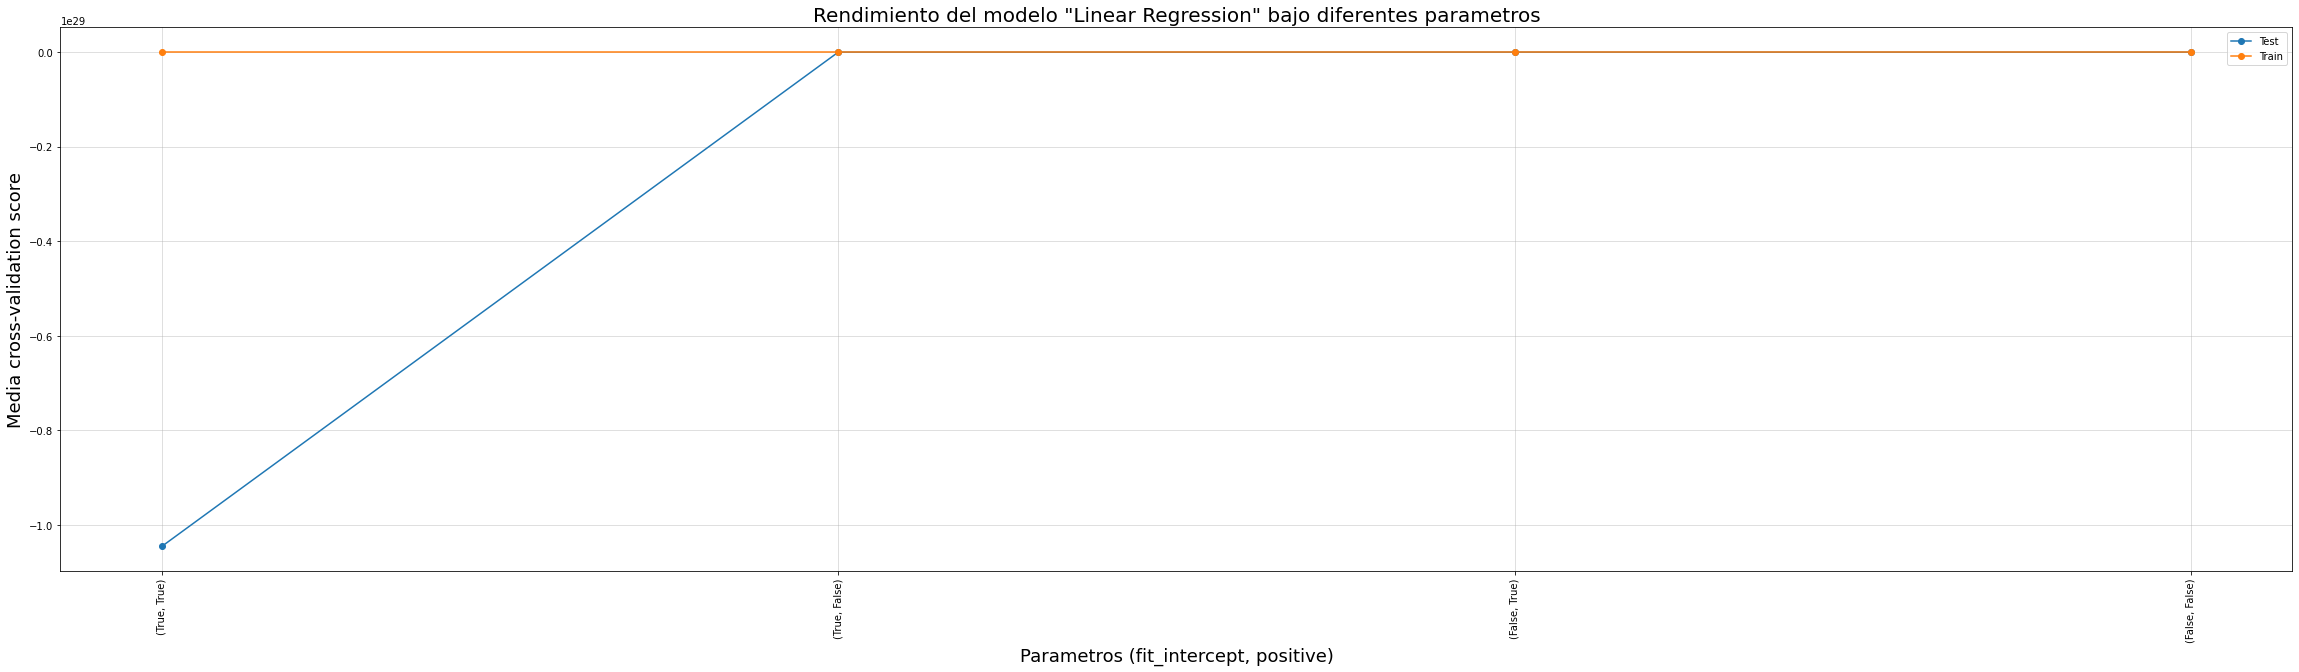

In [271]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [272]:
X_test_scaled

array([[-0.01421338,  0.        , -0.02462327, ..., -0.31866712,
        -0.18221437, -0.0605921 ],
       [-0.01421338,  0.        , -0.02462327, ...,  0.10172616,
        -0.19354072, -0.20331017],
       [-0.01421338,  0.        , -0.02462327, ..., -0.30299621,
        -0.22751975, -0.20331017],
       ...,
       [-0.01421338,  0.        , -0.02462327, ..., -0.17922393,
        -0.19354072, -0.20331017],
       [-0.01421338,  0.        , -0.02462327, ..., -0.20082215,
        -0.19354072, -0.20331017],
       [-0.01421338,  0.        , -0.02462327, ..., -0.14485347,
        -0.21619341, -0.20331017]])

In [273]:
X.columns

Index(['00', '000001', '01', '0102', '0105', '02', '0200', '02043', '0300',
       '04',
       ...
       'favourites_count', 'likes_count', 'retweet_count', 'quote_count',
       'comments_count', 'reactions_count', 'count_user', 'statuses_count',
       'Degree', 'pageranks_desnormalizado'],
      dtype='object', length=8322)

In [274]:
#predicciones
y_pred = lr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=X.columns)
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
                   'retweet_count', 'quote_count', 'comments_count', 'reactions_count','count_user',
                   'statuses_count', 'Degree', 'pageranks_desnormalizado', 'y_test', 'y_pred']].head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,count_user,statuses_count,Degree,pageranks_desnormalizado,y_test,y_pred
0,-0.110964,-0.303191,-0.138889,-0.373124,-0.032270,-0.075176,-0.069893,-0.07243,-0.051517,-0.484400,-0.318667,-0.182214,-0.060592,0.114000,-49.742439
1,-0.091552,-0.148472,-0.091666,0.113732,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.238733,0.101726,-0.193541,-0.203310,0.006600,-28.447243
2,-0.109646,-0.080100,-0.137366,-0.331118,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.545817,-0.302996,-0.227520,-0.203310,0.000000,0.827294
3,-0.110333,-0.107942,-0.135842,-0.089270,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.545817,-0.306474,-0.204867,-0.203310,0.004400,-94.308430
4,-0.092861,0.302997,-0.097759,0.243894,1.981740,1.887878,1.402625,1.59548,2.032897,0.068351,-0.176483,0.418082,0.233255,5.544383,62.521976


In [275]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 346.82304012913846
Minima diferencia: 0.001641554263309697


In [276]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,retweet_count,quote_count,comments_count,reactions_count,count_user,statuses_count,Degree,pageranks_desnormalizado,y_test,y_pred
1668,-0.014213,0.0,-0.024623,-0.014213,-0.014213,0.0,-0.020103,-0.014213,-0.014213,0.0,...,-0.075176,-0.069893,0.094361,-0.074678,2.217941,-0.107773,10.657097,8.803665,1597.182,1250.35896


In [279]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,retweet_count,quote_count,comments_count,reactions_count,count_user,statuses_count,Degree,pageranks_desnormalizado,y_test,y_pred
1680,-0.014213,0.0,-0.024623,-0.014213,-0.014213,0.0,-0.020103,-0.014213,-0.014213,0.0,...,-0.075176,-0.069893,0.094361,0.041123,0.559686,-0.298006,0.14625,0.053365,1.6335,1.635142


In [286]:
# 1. Mean Absolute Error (MAE):
from sklearn.metrics import mean_absolute_error

# Calcular el MAE para los datos de entrenamiento
mae_train = mean_absolute_error(y_train, clf_.predict(X_train_scaled))

# Calcular el MAE para los datos de prueba
mae_test = mean_absolute_error(y_test, clf_.predict(X_test_scaled))


In [287]:
# 2. R-squared (R²):
from sklearn.metrics import r2_score

# Calcular el R² para los datos de entrenamiento
r2_train = r2_score(y_train, clf_.predict(X_train_scaled))

# Calcular el R² para los datos de prueba
r2_test = r2_score(y_test, clf_.predict(X_test_scaled))


In [290]:
# # 3. Mean Squared Logarithmic Error (MSLE): ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
# from sklearn.metrics import mean_squared_log_error

# # Calcular el MSLE para los datos de entrenamiento
# msle_train = mean_squared_log_error(y_train, clf_.predict(X_train_scaled))

# # Calcular el MSLE para los datos de prueba
# msle_test = mean_squared_log_error(y_test, clf_.predict(X_test_scaled))

In [292]:
# 4. Median Absolute Error (MedAE):
from sklearn.metrics import median_absolute_error

# Calcular el MedAE para los datos de entrenamiento
medae_train = median_absolute_error(y_train, clf_.predict(X_train_scaled))

# Calcular el MedAE para los datos de prueba
medae_test = median_absolute_error(y_test, clf_.predict(X_test_scaled))

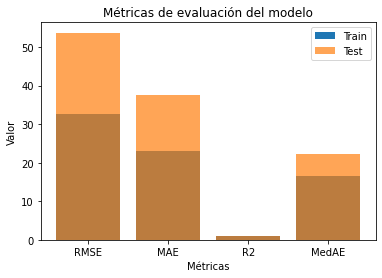

In [295]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Calcular las predicciones del modelo
y_pred_train = clf_.predict(X_train_scaled)
y_pred_test = clf_.predict(X_test_scaled)

# Calcular las métricas
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

medae_train = median_absolute_error(y_train, y_pred_train)
medae_test = median_absolute_error(y_test, y_pred_test)

# Crear el gráfico de barras
labels = ['RMSE', 'MAE', 'R2', 'MedAE']
metrics_train = [rmse_train, mae_train, r2_train, medae_train]
metrics_test = [rmse_test, mae_test, r2_test, medae_test]

plt.bar(labels, metrics_train, label='Train')
plt.bar(labels, metrics_test, label='Test', alpha=0.7)
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de evaluación del modelo')
plt.legend()
plt.show()



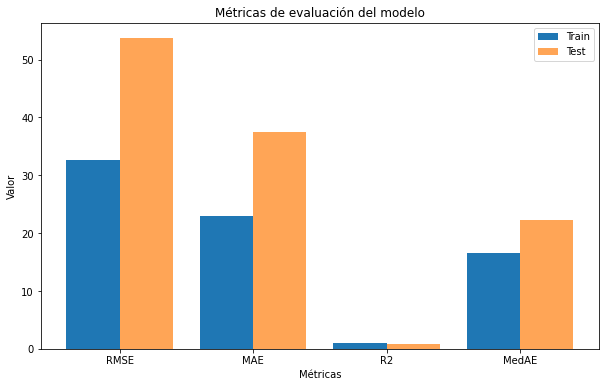

In [298]:
# Definir la posición de las barras para entrenamiento y prueba
x_train = np.arange(len(labels))
x_test = x_train + 0.4  # Ajustar el espaciado entre las barras

# Definir el ancho de las barras
width = 0.4

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras para entrenamiento y prueba
ax.bar(x_train, metrics_train, width, label='Train')
ax.bar(x_test, metrics_test, width, label='Test', alpha=0.7)

# Configurar los ejes y las etiquetas
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Métricas de evaluación del modelo')
ax.set_xticks(x_train + width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

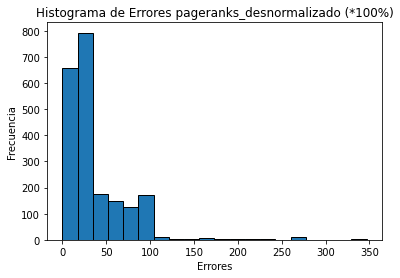

In [280]:
# Calcular los errores (diferencia entre los valores reales y los valores predichos)
errores = df_predict['diferencia']

# Graficar el histograma de los errores
plt.hist(errores, bins=20, edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Errores pageranks_desnormalizado (*100%)')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

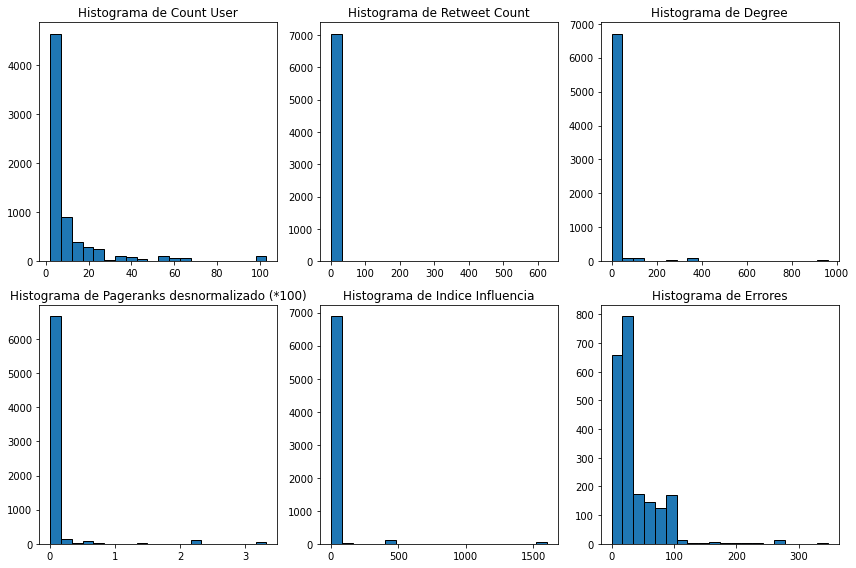

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura y los subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Histograma para count_user
axs[0, 0].hist(df_5_bow['count_user'], bins=20, edgecolor='black')
axs[0, 0].set_title('Histograma de Count User')

# Histograma para retweet_count
axs[0, 1].hist(df_5_bow['retweet_count'], bins=20, edgecolor='black')
axs[0, 1].set_title('Histograma de Retweet Count')

# Histograma para Degree
axs[0, 2].hist(df_5_bow['Degree'], bins=20, edgecolor='black')
axs[0, 2].set_title('Histograma de Degree')

# Histograma para pageranks
axs[1, 0].hist(df_5_bow['pageranks_desnormalizado'], bins=20, edgecolor='black')
axs[1, 0].set_title('Histograma de Pageranks desnormalizado (*100)')

# Histograma para indice_influencia
axs[1, 1].hist(df_5_bow['indice_influencia'], bins=20, edgecolor='black')
axs[1, 1].set_title('Histograma de Indice Influencia')

# Histograma para diferencia
axs[1, 2].hist(df_predict['diferencia'], bins=20, edgecolor='black')
axs[1, 2].set_title('Histograma de Errores')

# Ajustar la distancia entre los subplots
plt.tight_layout()

# Mostrar el plot
plt.show()

In [283]:
import joblib
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train, y_train)
# Guardar el modelo en un archivo
# joblib.dump(lr, 'modelo_lr_tf_idf_19052023.pkl') #19052023
joblib.dump(lr, 'modelo_lr_tf_idf_23052023.pkl') #22052023

['modelo_lr_tf_idf_23052023.pkl']

In [284]:
# Definicion de parametros de carga / insercion
collection_name = 't_fvf_progephi_nlp_bow_pageranks_desnormalizado' # Data desnormalida al 100% 
insert_mongo (client, database, collection_name, df_5_bow)

Los datos fueron insertados correctamente en la coleccion t_fvf_progephi_nlp_bow_pageranks_desnormalizado, de la base de datos GNN.


### 7.2.3 Version escala a 100.000% el valor original del pageranks -> pageranks * 100.000

#### 7.2.3.1 Modelo Linear Regressor - vEscalada 100.000%

In [168]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))

Los mejores parametros fueron:  {'fit_intercept': False, 'positive': True}
La mejor precisión con estos parametros fue:  -71202.7624081271
El RMSE para la data de entrenamiento: 49641.106479094284
El RMSE para la data de prueba: 72293.5886824524
CPU times: user 14.4 s, sys: 5.68 s, total: 20.1 s
Wall time: 4min 56s


In [169]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': False, 'positive': True}
La mejor precisión con estos parametros fue:  -93465.19996327395
El RMSE para la data de entrenamiento: 45563.76929720309
El RMSE para la data de prueba: 87528.36218609735
CPU times: user 4min 27s, sys: 4.78 s, total: 4min 31s
Wall time: 8min 22s


In [170]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train_scaled, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test_scaled),squared=False))

El RMSE para la data de entrenamiento: 45563.76929720309
El RMSE para la data de prueba: 87528.36218609735


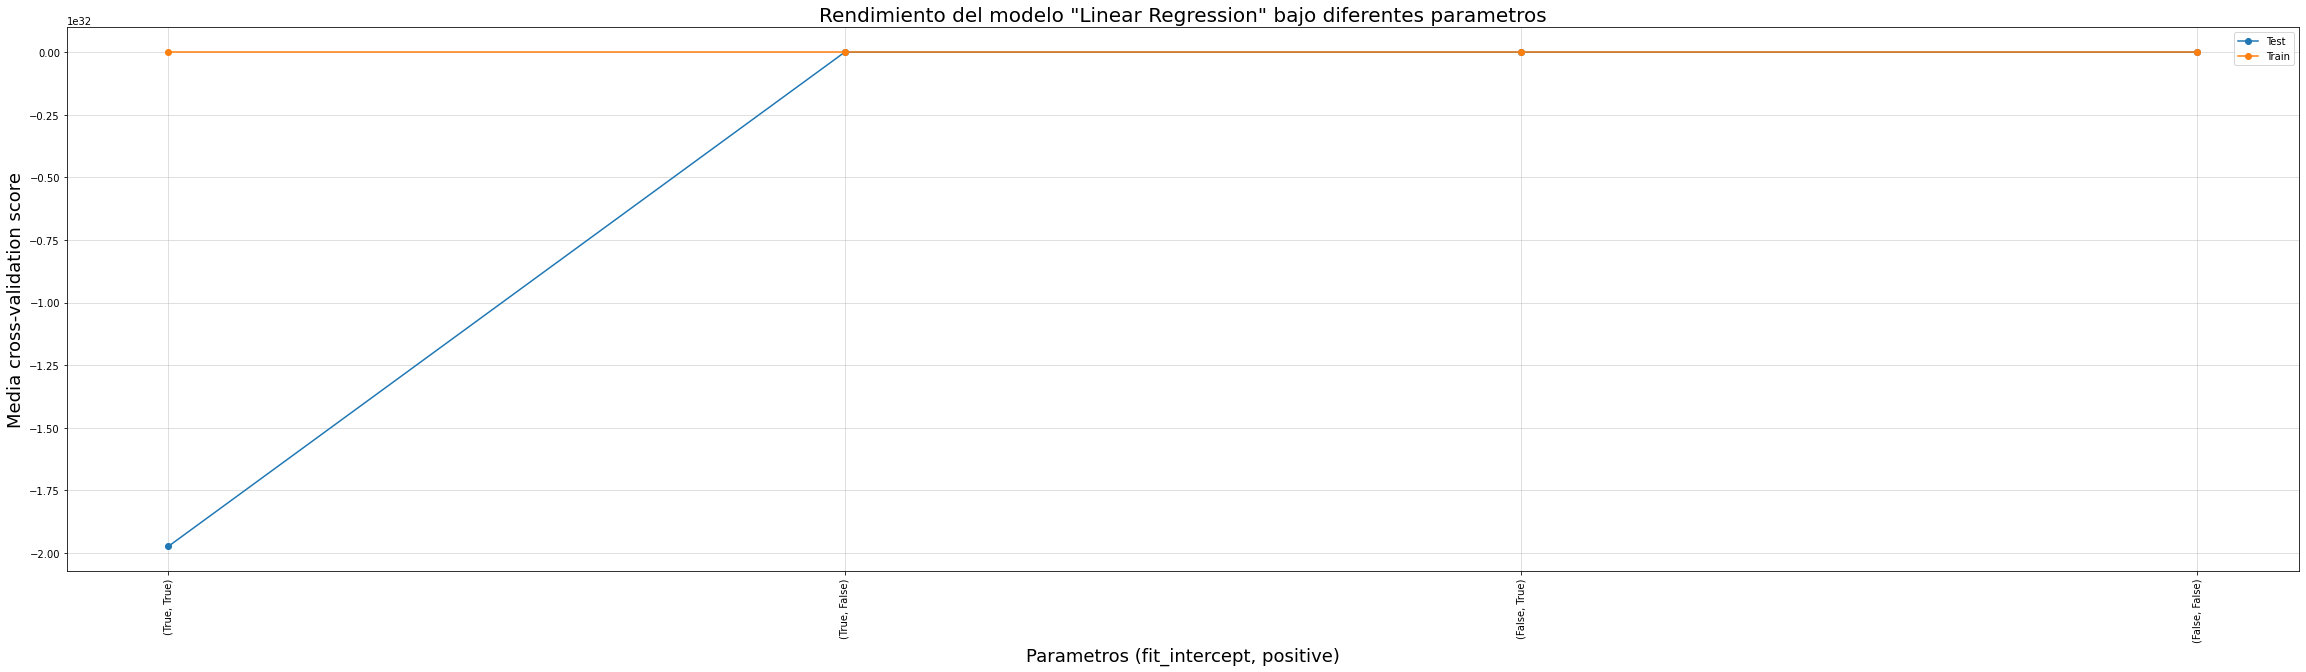

In [171]:
params = [(p['fit_intercept'], p['positive']) for p in clf_.cv_results_['params']]
x_vector = [i for i in range(len(params))]

# Creamos la figura en la que se va a mostrar como cambia el rendimiento del modelo segun los parametros y el kfold
fig, ax = plt.subplots(figsize=(40,10))
ax.plot(x_vector, clf_.cv_results_['mean_test_score'], '-o', label='Test')
ax.plot(x_vector, clf_.cv_results_['mean_train_score'], '-o', label='Train')
ax.set_xlabel('Parametros (fit_intercept, positive)', fontsize=18)
ax.set_ylabel('Media cross-validation score', fontsize=18)
plt.xticks(x_vector, params)
plt.xticks(rotation=90)
ax.set_title('Rendimiento del modelo "Linear Regression" bajo diferentes parametros', fontsize=20)
ax.grid(alpha=0.5)
plt.legend()
plt.show()

In [173]:
#predicciones
y_pred = lr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=X.columns)
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
                   'retweet_count', 'quote_count', 'comments_count', 'reactions_count',
                   'statuses_count', 'pageranks_desnormalizado_2', 'y_test', 'y_pred']].head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks_desnormalizado_2,y_test,y_pred
0,-0.110964,-0.303191,-0.138889,-0.373124,-0.032270,-0.075176,-0.069893,-0.07243,-0.051517,-0.318667,-0.060592,114.000000,-6196.232832
1,-0.091552,-0.148472,-0.091666,0.113732,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,0.101726,-0.203310,6.600000,-28629.384219
2,-0.109646,-0.080100,-0.137366,-0.331118,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.302996,-0.203310,0.000000,27253.976224
3,-0.110333,-0.107942,-0.135842,-0.089270,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.306474,-0.203310,4.400000,-129065.635354
4,-0.092861,0.302997,-0.097759,0.243894,1.981740,1.887878,1.402625,1.59548,2.032897,-0.176483,0.233255,4711.883333,57612.085616


In [177]:
df_predict.columns

Index(['00', '000001', '01', '0102', '0105', '02', '0200', '02043', '0300',
       '04',
       ...
       'favourites_count', 'likes_count', 'retweet_count', 'quote_count',
       'comments_count', 'reactions_count', 'statuses_count',
       'pageranks_desnormalizado_2', 'y_test', 'y_pred'],
      dtype='object', length=8322)

In [174]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 747187.9276509531
Minima diferencia: 202.98154774847643


In [175]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks_desnormalizado_2,y_test,y_pred
2033,-0.014213,0.0,-0.024623,-0.014213,-0.014213,0.0,-0.020103,-0.014213,-0.014213,0.0,...,1.238218,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.058075,-0.20331,4.4,747192.327651


In [176]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks_desnormalizado_2,y_test,y_pred
1994,-0.014213,0.0,-0.024623,-0.014213,-0.014213,0.0,-0.020103,-0.014213,-0.014213,0.0,...,-0.459737,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.32411,-0.20331,2.2,-200.781548


- **Nota: Mejor resultado con la version escalada al 100% es decir pageranks * 100**

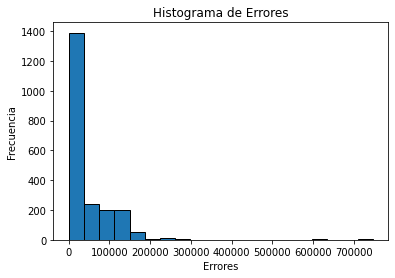

In [206]:
# Calcular los errores (diferencia entre los valores reales y los valores predichos)
errores = df_predict['diferencia']

# Graficar el histograma de los errores
plt.hist(errores, bins=20, edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

---
---

In [248]:
# Convertir datos almacenados en MongoDB en un dataframe
# df_30days = extract_mongo(client, database, collection_name)
df_4_tfidf = extract_mongo(client, database, 't_fvf_progephi_nlp_tf_idf')
df_4_tfidf.shape

Los datos de la coleccion t_fvf_progephi_nlp_tf_idf de la base de datos GNN fueron extraidos satisfactoriamente!


(7074, 8410)

In [249]:
df_4_tfidf[['Degree','pageranks']].sort_values(['pageranks'], ascending=False)

,Degree,pageranks
391,961.0,0.033240
6664,961.0,0.033240
646,961.0,0.033240
528,961.0,0.033240
4729,961.0,0.033240
...,...,...
3259,0.0,0.000044
3256,5.0,0.000044
362,1.0,0.000044
3254,11.0,0.000044


In [251]:
# Escala al 100% (* 100)
df_4_tfidf[['pageranks_desnormalizado']] = df_4_tfidf[['pageranks']]*100
df_4_tfidf[['pageranks_desnormalizado']] 

,pageranks_desnormalizado
0,0.5057
1,0.0044
2,0.0044
3,0.0044
4,0.0049
...,...
7069,0.0044
7070,0.0044
7071,0.0044
7072,0.0044


In [259]:
# # Indice de influencia normalizado
df_4_tfidf['indice_influencia_norm'] = ((df_4_tfidf['retweet_count_norm'] / df_4_tfidf['count_user_norm']) * 0.50) + ((df_4_tfidf['Degree_norm'] * df_4_tfidf['pageranks']) * 0.50)
df_4_tfidf.shape

In [185]:
df_4_tfidf['indice_influencia_norm'].max()

46.35305994144268

In [186]:
df_4_tfidf['indice_influencia_norm'].mean()

0.021629282957536296

In [187]:
df_4_tfidf['indice_influencia_norm'].min()

0.0

In [253]:
# Indice de influencia desnormalizado
df_4_tfidf['indice_influencia'] = ((df_4_tfidf['retweet_count'] / df_4_tfidf['count_user']) * 0.50) + ((df_4_tfidf['Degree'] * df_4_tfidf['pageranks_desnormalizado']) * 0.50)
df_4_tfidf.shape

(7074, 8412)

In [254]:
df_4_tfidf['indice_influencia'].max()

1603.8522127659576

In [255]:
df_4_tfidf['indice_influencia'].mean()

17.930138762879125

In [256]:
df_4_tfidf['indice_influencia'].min()

0.0

In [257]:
df_5_tfidf = df_4_tfidf[['message_clean','followers', 'followings', 'listed_count', 'favourites_count', 'likes_count', 'retweet_count', 'quote_count','comments_count', 'reactions_count', 'statuses_count', 'pageranks_desnormalizado', 'indice_influencia']]
df_5_tfidf.shape

(7074, 13)

In [258]:
df_5_tfidf[['pageranks_desnormalizado']].mean()

pageranks_desnormalizado    0.084542
dtype: float64

## 7.3 TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica similar a la Bolsa de palabras, pero también tiene en cuenta la importancia relativa de las palabras en el conjunto de datos. Puedes utilizar la clase TfidfVectorizer de Scikit-learn para realizar esta transformación.

Se incluyo el mensaje limpio aplicando la tecnica TF-IDF
+ Predictoras
    -  Columnas de tf_idf
    - 'followers' 
    - 'followings' 
    - 'listed_count' 
    - 'favourites_count' 
    - 'likes_count' 
    - 'retweet_count' 
    - 'quote_count'
    - 'comments_count' 
    - 'reactions_count' 
    - 'statuses_count'
    - 'indegree' 
    - 'outdegree' 
    - 'Degree'
    - 'modularity_class'
    - 'Eccentricity' 
    - 'closnesscentrality',
    - 'harmonicclosnesscentrality'
    - 'betweenesscentrality'
    - 'eigencentrality'
    - 'Authority' 
    - 'Hub'
    - 'X'
    - 'Y'
    - 'Size'
    - 'pageranks_desnormalizado'
+ Objetivo:
   -  'indice_influencia'

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Crear una instancia del TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador y transformar los datos de texto en una matriz de características TF-IDF
X_text = vectorizer.fit_transform(df_5_tfidf['message_clean'])

# Obtener la lista de nombres de columnas correspondientes a las palabras
feature_names = vectorizer.get_feature_names()

# Convertir la matriz TF-IDF a un array de Numpy
X_text = X_text.toarray()

# Crear un dataframe con la matriz TF-IDF y los nombres de columnas
X_text = pd.DataFrame(X_text, columns=feature_names)


# Variables numéricas
numeric_columns = ['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
                   'retweet_count', 'quote_count', 'comments_count', 'reactions_count',
                   'statuses_count', 'pageranks_desnormalizado']

# Obtener las columnas numéricas
X_numeric = df_5_tfidf[numeric_columns]

### 7.3.1 Separacion de variables predictoras y objetivo

In [195]:
# Combinar las matrices de características
X_1 = pd.concat([X_text, X_numeric], axis=1)
print('Features (primeras 5 observaciones): \n', X.head())

## Para la variable objetivo seleccionamos la siguiente
print()
# Variable objetivo (Y)
Y_1 = df_5_tfidf['indice_influencia']
print('Variable Objetivo (primeras 5 observaciones): \n', y[:5]) 

Features (primeras 5 observaciones): 
    00  000001  01  0102  0105  02  0200  02043  0300  04  ...  followings  \
0   0       0   0     0     0   0     0      0     0   0  ...        4132   
1   0       0   0     0     0   0     0      0     0   0  ...        1773   
2   0       0   0     0     0   0     0      0     0   0  ...        2418   
3   0       0   0     0     0   0     0      0     0   0  ...         100   
4   0       0   0     0     0   0     0      0     0   0  ...        4957   

   listed_count  favourites_count  likes_count  retweet_count  quote_count  \
0           214               494           36             12            4   
1            10              8738            0              0            0   
2             6             21815            0              0            0   
3             1              1865            0              0            0   
4             9             34413            0              0            0   

   comments_count  reactions_

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb

### 7.3.2 Modelo Linear Regressor

In [201]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Instanciamos el modelo LinearRegression sin escalamiento
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test),squared=False))


 NNLS quitting on iteration count.

 NNLS quitting on iteration count.

 NNLS quitting on iteration count.

 NNLS quitting on iteration count.
Los mejores parametros fueron:  {'fit_intercept': True, 'positive': True}
La mejor precisión con estos parametros fue:  nan
El RMSE para la data de entrenamiento: 34.44292239437983
El RMSE para la data de prueba: 160.46022501907257
CPU times: user 17min 47s, sys: 12.8 s, total: 18min
Wall time: 34min 44s


- **Nota: no confiaria en este modelo por las siguientes razones:**
    - NNLS quitting on iteration count.
    - La mejor precisión con estos parametros fue:  nan
    
**El mensaje "NNLS quitting on iteration count" se refiere a la finalización del algoritmo de mínimos cuadrados no negativos (NNLS) después de alcanzar el número máximo de iteraciones permitidas. El algoritmo NNLS se utiliza para resolver problemas de optimización en los que se busca encontrar una solución que minimice la suma de los cuadrados de los errores, sujeta a la restricción de que los coeficientes sean no negativos. Cuando se alcanza el número máximo de iteraciones, significa que el algoritmo no pudo converger a una solución óptima dentro de las iteraciones permitidas. Esto puede suceder por varias razones, como una configuración incorrecta de los parámetros, una función objetivo compleja o datos que no cumplen con ciertas suposiciones del algoritmo. Si te encuentras con este mensaje, puedes intentar ajustar los parámetros del algoritmo, como el número máximo de iteraciones o la tolerancia de convergencia, para permitir más tiempo de cálculo o una convergencia más precisa. También es posible que debas revisar tus datos o el problema que estás intentando resolver para identificar posibles problemas que puedan estar impidiendo la convergencia del algoritmo. En resumen, el mensaje indica que el algoritmo NNLS no pudo converger a una solución óptima dentro del número máximo de iteraciones permitidas.**

In [205]:
%%time
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.3, random_state=27)
# Establecer parametros para iterar
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
# Normalizar las variables de entrada
scaler = StandardScaler()  
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  
# Instanciamos el modelo LinearRegression 
lr = LinearRegression()
# Realizar la validación cruzada y la búsqueda de los mejores parámetros
clf_ = GridSearchCV(lr, param_grid, return_train_score=True, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf_.fit(X_train_scaled, y_train)

print('Los mejores parametros fueron: ', clf_.best_params_)
print('La mejor precisión con estos parametros fue: ', clf_.best_score_)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, clf_.predict(X_train_scaled),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, clf_.predict(X_test_scaled),squared=False))

Los mejores parametros fueron:  {'fit_intercept': False, 'positive': True}
La mejor precisión con estos parametros fue:  -185.55801327444607
El RMSE para la data de entrenamiento: 38.13942350999594
El RMSE para la data de prueba: 170.29484238054965
CPU times: user 6min 42s, sys: 9.63 s, total: 6min 51s
Wall time: 23min 58s


In [209]:
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train, y_train)
print('El RMSE para la data de entrenamiento:', metrics.mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('El RMSE para la data de prueba:', metrics.mean_squared_error(y_test, lr.predict(X_test),squared=False))

El RMSE para la data de entrenamiento: 47.91116972645587
El RMSE para la data de prueba: 73.19948232772954


In [210]:
#predicciones
y_pred = lr.predict(X_test_scaled)
# Dataframe con las diferencias
df_predict = pd.DataFrame({'y_test': y_test.values, 'y_pred':y_pred})
df_test = pd.DataFrame(X_test_scaled, columns=X.columns)
df_predict = pd.concat([df_test, df_predict], axis=1)
df_predict['diferencia'] = abs(df_predict['y_test'] - df_predict['y_pred'])
df_predict[['followers', 'followings', 'listed_count', 'favourites_count', 'likes_count',
                   'retweet_count', 'quote_count', 'comments_count', 'reactions_count',
                   'statuses_count', 'pageranks_desnormalizado_2', 'y_test', 'y_pred']].head()

,followers,followings,listed_count,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks_desnormalizado_2,y_test,y_pred
0,-0.110964,-0.303191,-0.138889,-0.373124,-0.032270,-0.075176,-0.069893,-0.07243,-0.051517,-0.318667,-0.060592,0.114000,-556.581678
1,-0.091552,-0.148472,-0.091666,0.113732,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,0.101726,-0.203310,0.006600,-592.509647
2,-0.109646,-0.080100,-0.137366,-0.331118,-0.066994,-0.075176,-0.069893,-0.07243,-0.074678,-0.302996,-0.203310,0.000000,-592.509647
3,-0.110333,-0.107942,-0.135842,-0.089270,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.306474,-0.203310,0.004400,-592.509647
4,-0.092861,0.302997,-0.097759,0.243894,1.981740,1.887878,1.402625,1.59548,2.032897,-0.176483,0.233255,5.544383,-477.551298


In [211]:
print('Máxima diferencia: '+ str(df_predict['diferencia'].max()))
print('Minima diferencia: '+ str(df_predict['diferencia'].min()))

Máxima diferencia: 222579.4059755421
Minima diferencia: 16.28923740850189


In [212]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].max()]

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks_desnormalizado_2,y_test,y_pred
545,-0.014213,0.0,-0.024078,-0.014213,-0.014213,0.0,-0.020103,-0.014213,-0.014213,0.0,...,-0.446373,-0.101718,-0.075176,-0.069893,-0.07243,-0.097838,-0.322728,-0.20331,0.0066,222579.412576


In [213]:
df_predict[df_predict['diferencia'] == df_predict['diferencia'].min()]

,00,000001,01,0102,0105,02,0200,02043,0300,04,...,favourites_count,likes_count,retweet_count,quote_count,comments_count,reactions_count,statuses_count,pageranks_desnormalizado_2,y_test,y_pred
550,-0.014213,0.0,-0.024078,-0.014213,-0.014213,0.0,-0.020103,-0.014213,-0.014213,0.0,...,1.59456,14.03107,56.65708,8.765215,2.929808,23.409728,0.728397,4.054084,529.22075,512.931513


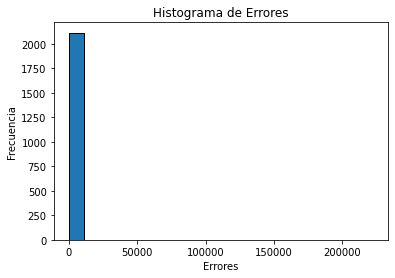

In [214]:
# Calcular los errores (diferencia entre los valores reales y los valores predichos)
errores = df_predict['diferencia']

# Graficar el histograma de los errores
plt.hist(errores, bins=20, edgecolor='black')

# Configurar el título y las etiquetas de los ejes
plt.title('Histograma de Errores')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

### 7.3.3 Exportar modelo entrenado

In [216]:
import joblib
lr = LinearRegression(**clf_.best_params_)
lr.fit(X_train, y_train)
# Guardar el modelo en un archivo
# joblib.dump(lr, 'modelo_lr_tf_idf_19052023.pkl') #19052023
joblib.dump(lr, 'modelo_lr_tf_idf_22052023.pkl') #22052023

['modelo_lr_tf_idf_22052023.pkl']

In [ ]:
# Cargar el modelo desde el archivo
# # lr_loaded = joblib.load('modelo_lr_tf_idf_19052023.pkl')
# lr_loaded = joblib.load('modelo_lr_tf_idf_22052023.pkl')

In [ ]:
# # Cargar el modelo desde el archivo
# # lr_loaded = joblib.load('modelo_lr_tf_idf_19052023.pkl')
# lr_loaded = joblib.load('modelo_lr_tf_idf_22052023.pkl')